In [1]:
import preprocessing
from config import TRENDS_DIR
%load_ext autoreload
%autoreload 2
import pandas as pd
import tqdm
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, date, timedelta


In [2]:
campaigns = preprocessing.load_campaign()

# Classify Campaigns initiated by IT cell and piggyback campagins

In [3]:
ht = 'jharkhandwithmodi'
x = sorted(campaigns[ht].values(), key=lambda x: x['date'])[:1]

In [4]:
def print_tweet(tweet):
    print(tweet['text'], '-', tweet['username'], ' on ', tweet['date'])

In [5]:
def summarize_campaign(hashtag, tweet_dict):
    sorted_tweets = sorted(tweet_dict.values(), key=lambda x: x['date'])
    entry = {}
    print('Hashtag: ', hashtag)
    entry['hashtag'] = hashtag
    print('Total # of collected tweets: ', len(sorted_tweets))
    entry['n_tweets'] = len(sorted_tweets)
    
    print('First tweet: ')
    print_tweet(sorted_tweets[0])
    #entry['first_tweet'] = sorted_tweets[0].
    
    ind, first_templated_tweet = next((i,x) for i,x in enumerate(sorted_tweets) if x['template'] != '')
    entry['tweets_before_first_template'] = ind
    entry['time_of_first_template'] = first_templated_tweet['date']
    
    entry['n_template_tweets'] = len([x for x in sorted_tweets if x['template'] != ''])
    
    print('Number of tweets before first template tweet:', ind)
    print('First template tweet: ')
    print_tweet(first_templated_tweet)
    entry['trending_start'], entry['trending_end'] = None, None 
    try:
        trending_data = pd.read_csv(os.path.join(TRENDS_DIR, hashtag+'.csv'))
        trending_data = trending_data.query('place == "India"')
        begin, end = trending_data.datetime.min(), trending_data.datetime.max()
        entry['trending_start'], entry['trending_end'] = begin, end 
        print('hashtag trended from', begin, 'to', end)
    except:
        print('hashtag never trended')
    return entry

In [6]:
res = {ht: summarize_campaign(ht, camp) for ht, camp in campaigns.items()}
campaign_info_dict = pd.DataFrame(res).T

Hashtag:  jharkhandwithmodi
Total # of collected tweets:  13908
First tweet: 
टाइगर आज झारखंड के दौरे पर पहुँच चुके हैं। #modiinjharkhand @narendramodi #jharkhandwithmodi #namoagain https://t.co/2mdjsyz7ks - manojgoelbjp  on  2019-01-05 05:51:48
Number of tweets before first template tweet: 23
First template tweet: 
हर पल झारखण्ड का ख्याल रखने, झारखण्ड की जरुरतों को समझने, सेवा करने और राज्य को विकास के पथ पर आगे बढ़ाने के लिए सवा तीन करोड़वासियों की ओर से प्रधानमंत्री नरेंद्र मोदी का कोटि कोटि धन्यवाद। #jharkhandwithmodi - sunilsingh_bjp  on  2019-02-17 06:18:10
hashtag trended from 2019-02-17 10:00:00 to 2019-02-17 16:00:00
Hashtag:  surgingsilk
Total # of collected tweets:  871
First tweet: 
#surgingsilk new delhi https://t.co/esdi3ca2di - amitnsonu  on  2019-02-09 11:31:19
Number of tweets before first template tweet: 1
First template tweet: 
with help of central silk board & an entrepreneur in champa , modigovt introduced buniyaad reeling machine to achieve better productivity , q

hashtag trended from 2018-12-01 06:00:00 to 2018-12-02 23:00:00
Hashtag:  bogibeelbridge
Total # of collected tweets:  34026
First tweet: 
#bogibeelbridge in assam http://t.co/mz5te8csxd - net_marketting  on  2014-01-24 06:00:01
Number of tweets before first template tweet: 4196
First template tweet: 
today is a historic day for the north-east, as pm @narendramodi is set to inaugurate the iconic bogibeel bridge over the brahmaputra river. #bogibeelbridge @bjp4haryana @subhashbrala https://t.co/stji8jqcvz - gurugram4bjp  on  2018-12-25 04:49:07
hashtag never trended
Hashtag:  newindia4narishakti
Total # of collected tweets:  45609
First tweet: 
आंतरराष्ट्रीय महिला दिवस के उपलक्ष्य में महिला मोर्चा की तरफ से हो रहा प्रबुद्ध सम्मेलन अभियान का प्रारम्भ मैनें आज श्याम को महाराष्ट्र के मुम्ब्रा मे किया।मुस्लिम बहनों की बडी उपस्थिति में हुई कार्यक्रम मे सिर्फ 'सब का साथ,सब का विकास' का नारा गूंज रहा था। #newindia4narishakti https://t.co/3zcc81oqsw - vijayarahatkar  on  2019-03-07 15:35:24
Num

Hashtag:  mainbhichowkidar
Total # of collected tweets:  887272
First tweet: 
@thesharad @bhavsarhardiik #mainbhichowkidar - suresh18695890  on  2019-02-09 09:43:02
Number of tweets before first template tweet: 11875
First template tweet: 
हाँ, मैं भी चौकीदार हूँ... #mainbhichowkidar @narendramodi https://t.co/32votf2wzz - jatbarad  on  2019-03-16 04:43:50
hashtag trended from 2019-03-16 04:00:00 to 2019-04-01 02:00:00
Hashtag:  iafbacksrafale
Total # of collected tweets:  870
First tweet: 
#iafbacksrafale | rafale a beautiful aircraft: sb deo, air vice-chief, on rafale controversy watch live here - https://www. republicworld.com/livetv - republic  on  2018-09-05 05:43:00
Number of tweets before first template tweet: 89
First template tweet: 
the indian rafale comes with about 15 modifications which even the french air force doesn't have. the biggest strength of the aircraft is that it can be used for delivery of strategic weapons too. https://t.co/zuyfkaekko #iafbacksrafale - rajveers

hashtag trended from 2018-11-15 05:00:00 to 2018-11-16 06:00:00
Hashtag:  bjpvijaysankalpbikerally
Total # of collected tweets:  143497
First tweet: 
आज सेक्टर-29 में जिला संख्या-4 की बैठक के दौरान सभी सदस्यों से आगामी लोकसभा चुनावों में एकजुट होकर #भाजपा की जीत के लिए संकल्पित होने को अपील की। #meraparivarbhajpaparivar #bjpkamaljyoti #भाजपा_कमल_ज्योति #bjpvijaysankalpbikerally #loksabhaelection2019 @bjp4india #namoagain https://t.co/3ic89arl7z - sanjaytandonbjp  on  2019-02-09 16:39:35
Number of tweets before first template tweet: 10500
First template tweet: 
भाजपा सरकार के अंतर्गत 1 करोड़ युवा स्टार्टअप शुरू कर चुके हैं  #bjpvijaysankalpbikerally #modioncemore - jigarpera  on  2019-03-02 04:45:15
hashtag trended from 2019-03-02 05:00:00 to 2019-03-04 03:00:00
Hashtag:  successofmakeinindia
Total # of collected tweets:  6367
First tweet: 
railways despatched the 'sri lanka-13' train, manufactured domestically under the make in india initiative at chennai's integral coach factory for e

Hashtag:  armedforcesflagday
Total # of collected tweets:  79908
First tweet: 
will we ever see #armedforcesflagday trending or is it just gonna be the idiots of the day? - adidesai  on  2011-12-07 06:34:29
Number of tweets before first template tweet: 39968
First template tweet: 
armed forces flag day #armedforcesflagday - rish_209  on  2017-12-07 02:00:25
hashtag trended from 2018-12-01 10:00:00 to 2018-12-08 23:00:00
Hashtag:  nris4modi
Total # of collected tweets:  4318
First tweet: 
#nris4modi l spreading modi mania all over the world with billions of nris supportl gnntv: https://t.co/btahy6rij3 via @youtube - gnnwtv  on  2019-01-29 17:22:14
Number of tweets before first template tweet: 388
First template tweet: 
every village electrified under deen dayal upadhyaya gram jyothi yojana #nris4modi - ravivyom  on  2019-03-27 01:30:00
hashtag never trended
Hashtag:  modifiedtextiles
Total # of collected tweets:  1166
First tweet: 
banaras garmenting unit procured handloom fabrics of rs

In [7]:
campaign_info_dict.sort_values('n_template_tweets', ascending=False).head(20)

hashtag n_tweets  \
modimeinhaidum                        modimeinhaidum    68242   
meraparivarbhajapaparivar  meraparivarbhajapaparivar   309183   
mainbhichowkidar                    mainbhichowkidar   887272   
maikamalkhilaneayahu            maikamalkhilaneayahu    24883   
म्हारा_वोट_भाजपा_को              म्हारा_वोट_भाजपा_को    29131   
jaihobc                                      jaihobc    12018   
newindia4narishakti              newindia4narishakti    45609   
merapmmeraabhimaan                merapmmeraabhimaan    45942   
लक्ष्य_हमारा_मोदी_दोबारा    लक्ष्य_हमारा_मोदी_दोबारा    79234   
shahforgandhinagar                shahforgandhinagar     4499   
pmkisan                                      pmkisan    37803   
andhrawithmodi                        andhrawithmodi     7148   
jharkhandwithmodi                  jharkhandwithmodi    13908   
bjpvijaysankalpbikerally    bjpvijaysankalpbikerally   143497   
kiamadeinap                              kiamadeinap     4039   
badalrahihaikashi                  badalrahihaikashi    16947   
corruptcongressfearsdemo    corruptcongressfearsdemo    13352   
namothon                                    namothon     6965   
pminraebareli                          pminraebareli    11901   
bjpkamaljyoti                          bjpkamaljyoti    67513   

                          tweets_before_first_template time_of_first_template  \
modimeinhaidum                                       2    2019-03-19 02:17:46   
meraparivarbhajapaparivar                          239    2019-02-11 07:39:27   
mainbhichowkidar                                 11875    2019-03-16 04:43:50   
maikamalkhilaneayahu                               211    2019-03-30 03:41:33   
म्हारा_वोट_भाजपा_को                                  0    2018-12-05 04:48:32   
jaihobc                                            153    2019-01-26 14:22:35   
newindia4narishakti                                 65    2019-03-08 01:36:36   
merapmmeraabhimaan                                  66    2018-11-11 04:53:09   
लक्ष्य_हमारा_मोदी_दोबारा                           226    2019-01-22 03:23:59   
shahforgandhinagar                                  51    2019-04-14 13:11:39   
pmkisan                                           1863    2019-02-24 05:31:00   
andhrawithmodi                                      35    2019-01-06 05:12:00   
jharkhandwithmodi                                   23    2019-02-17 06:18:10   
bjpvijaysankalpbikerally                         10500    2019-03-02 04:45:15   
kiamadeinap                                          3    2019-01-28 17:40:14   
badalrahihaikashi                                   75    2019-02-19 03:39:01   
corruptcongressfearsdemo                             0    2018-11-08 03:57:00   
namothon                                            47    2019-01-03 18:10:00   
pminraebareli                                        1    2018-12-16 02:24:31   
bjpkamaljyoti                                    18455    2019-02-26 12:20:19   

                          n_template_tweets       trending_start  \
modimeinhaidum                        14252  2019-03-19 04:00:00   
meraparivarbhajapaparivar              8531  2019-02-11 09:00:00   
mainbhichowkidar                       8240  2019-03-16 04:00:00   
maikamalkhilaneayahu                   5762  2019-03-30 04:00:00   
म्हारा_वोट_भाजपा_को                    5751  2018-12-05 06:00:00   
jaihobc                                5070  2019-01-27 06:00:00   
newindia4narishakti                    3681  2019-03-08 02:00:00   
merapmmeraabhimaan                     3478  2018-11-11 06:00:00   
लक्ष्य_हमारा_मोदी_दोबारा               3060  2019-01-22 04:00:00   
shahforgandhinagar                     3002  2019-04-14 14:00:00   
pmkisan                                2947  2019-02-01 07:00:00   
andhrawithmodi                         2895  2019-01-06 08:00:00   
jharkhandwithmodi                      2865  2019-02-17 10:00:00   
bjpvijaysankalpbikerally 

In [7]:
def plot_campaign_activity(hashtag, tweet_dict, quantiles=(.1,.99), include_trend=True):
    # plot tweets by type as a histogram
    # shows trending period, and a little bit before and after,
    for t_id, tweet in tweet_dict.items():
        tweet['adj_date'] = tweet['date'] + timedelta(hours=5, minutes=30)
        if tweet['retweet_from'] == '':
            if tweet['template'] != '':
                tweet['type'] = 'template'
            else:
                tweet['type'] = 'regular'
        else:
            if tweet['template'] != '':
                tweet['type'] = 'template-retweet'
            else:
                tweet['type'] = 'regular-retweet'
    df = pd.DataFrame.from_dict(tweet_dict).transpose()

    min_date = df['adj_date'].quantile(quantiles[0])
    max_date = df['adj_date'].quantile(quantiles[1])

    fig, ax = plt.subplots(1, 1, figsize=(14,4.5))

    (n, bins, patches) = plt.hist([df[df.type=='template'].adj_date, 
              df[df.type=='template-retweet'].adj_date,
              df[df.type=='regular'].adj_date,
              df[df.type=='regular-retweet'].adj_date,
             ],
            label=["Template tweets", "Template retweets", 
                    "Non-Template tweets", "Non-Template retweets",
                  ],
             color=["red","orange",'black','grey'], 
             stacked=True, alpha=0.6, bins=100, range=(min_date,max_date), cumulative=False, rwidth=0.9)

    #if os.path.exists(os.path.join(TRENDS_DIR, hashtag+'.csv')):
    try:
        # jerry rig the trending period on the plot
        if include_trend:
            trending_data = pd.read_csv(os.path.join(TRENDS_DIR, hashtag+'.csv'),
                                       parse_dates=['datetime'])
            trending_data = trending_data.query('place == "India"')
            start = trending_data.datetime.min() + timedelta(hours=5, minutes=30)
            end = trending_data.datetime.max() + timedelta(hours=5, minutes=30)
            max_hist_level = 1.1*max(sum(x) for x in zip(*n))

            plt.plot([start, end], [max_hist_level]*2, '-', color='black', alpha=1) 
            plt.plot([start, end], [max_hist_level]*2, '|', color='black') 

            plt.text(start + (end-start)/2, max_hist_level/1.1, f'#{hashtag} trending', fontsize=12, horizontalalignment='center')

    except:
        print('failed to plot trending data')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.legend()
    plt.xlabel('Time', fontsize=18)
    plt.ylabel('Tweet volume', fontsize=16)
    plt.title(f'#{hashtag} Tweets Over Time')
    plt.tight_layout()
    plt.show()

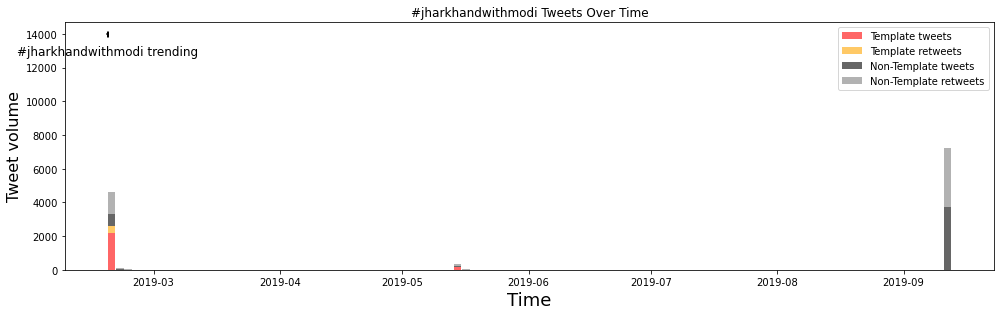

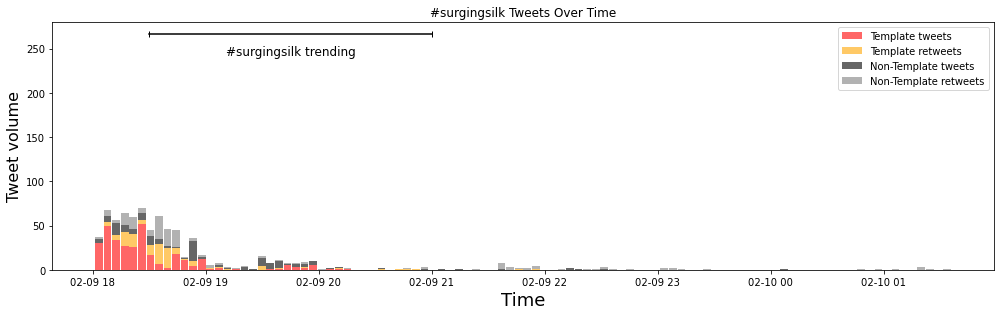

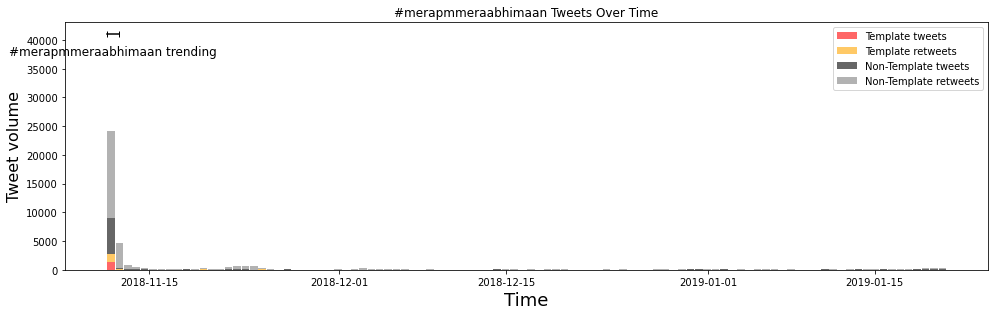

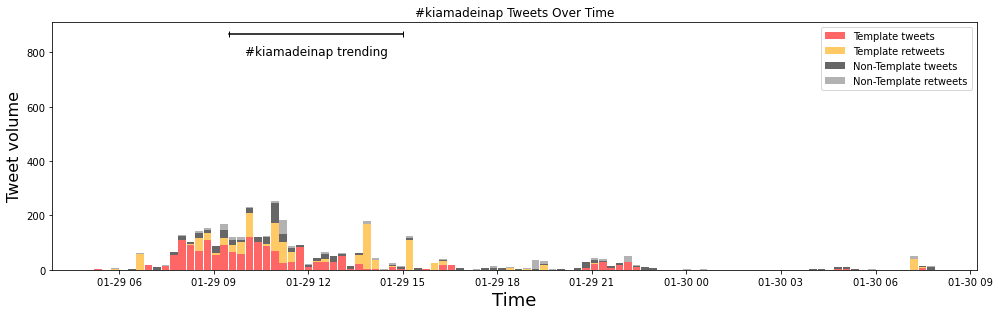

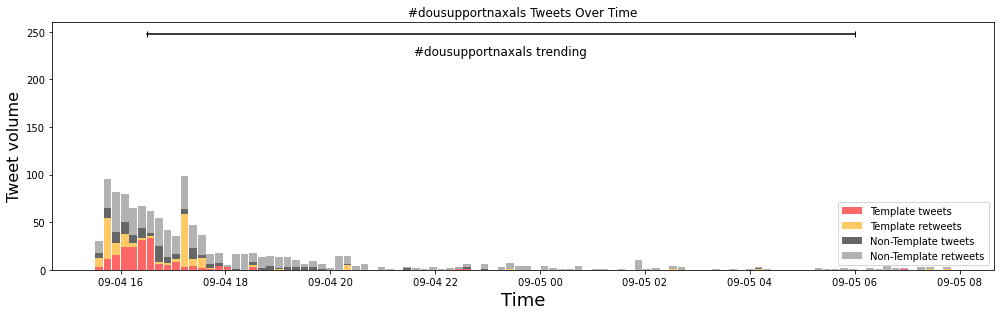

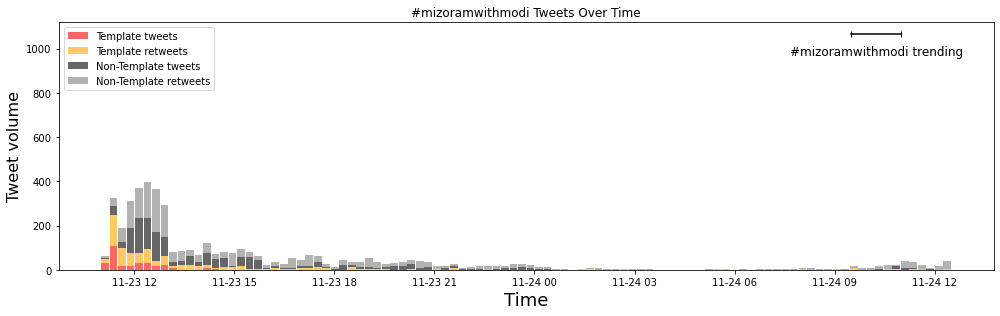

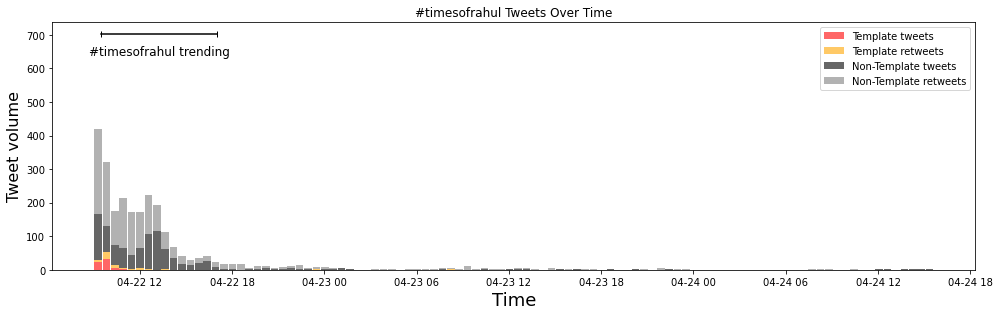

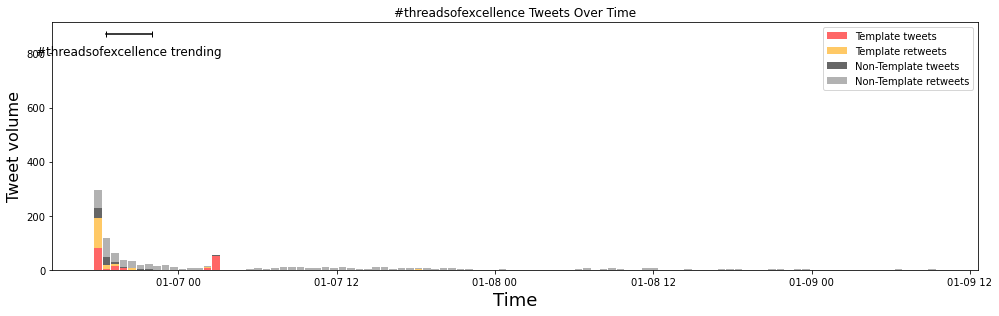

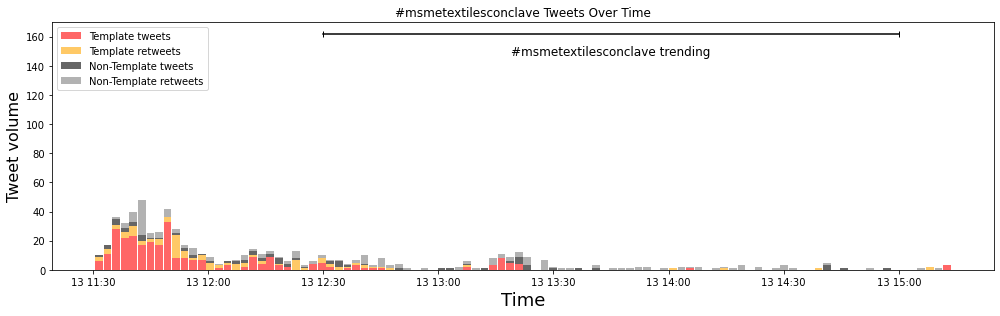

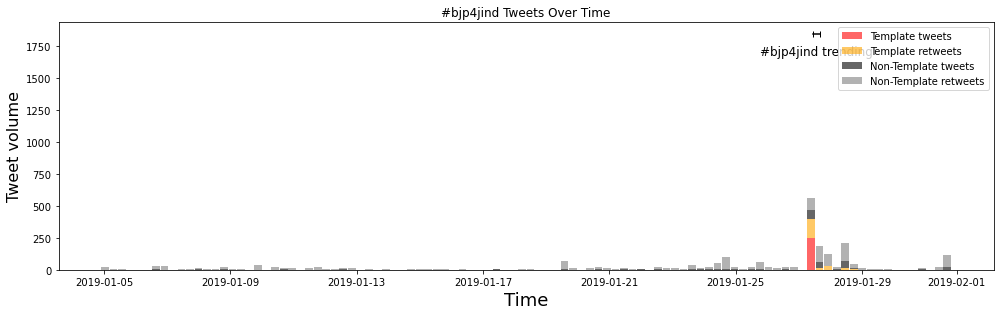

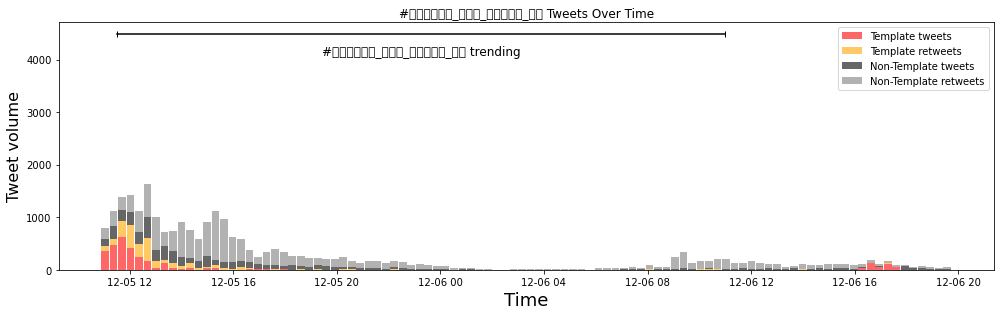

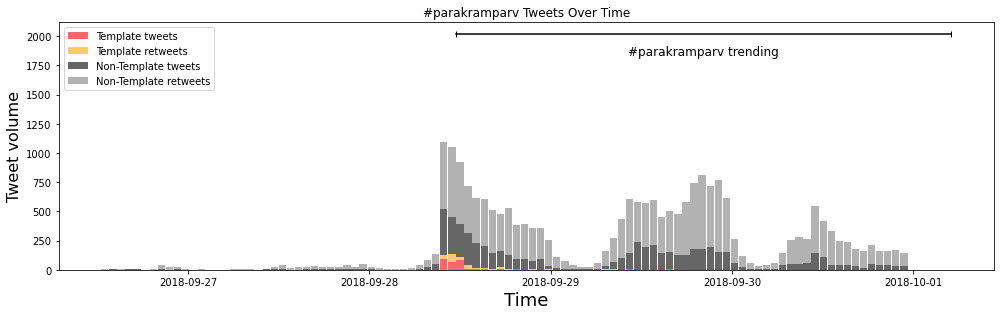

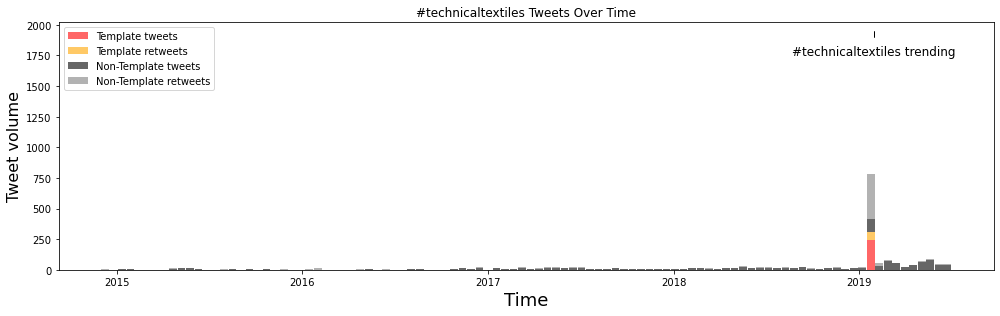

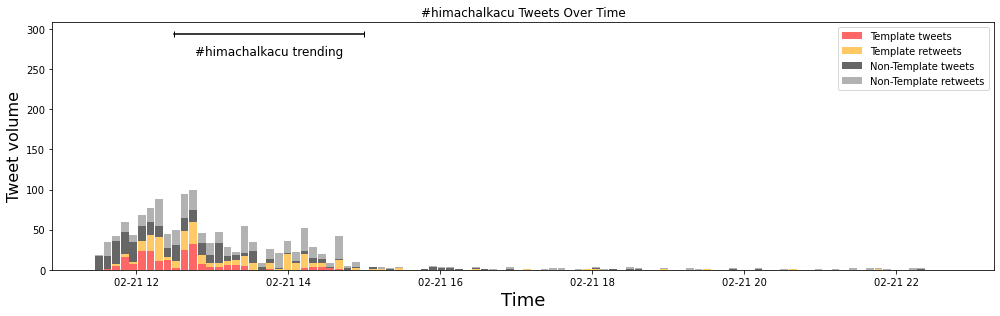

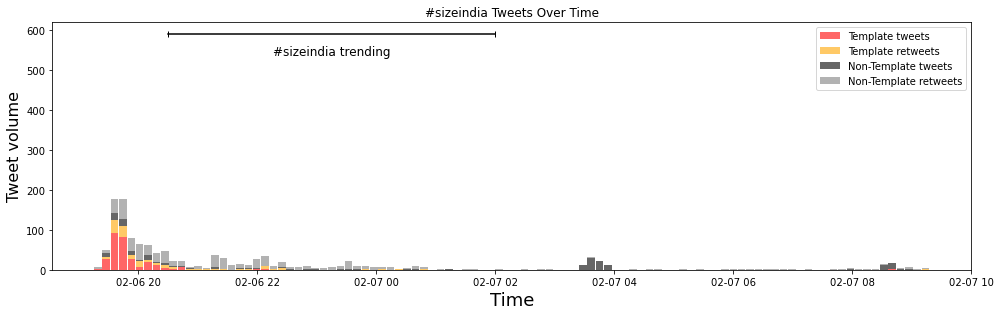

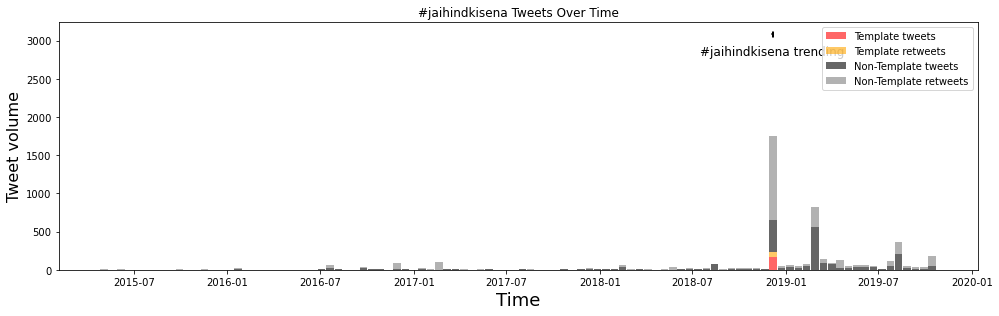

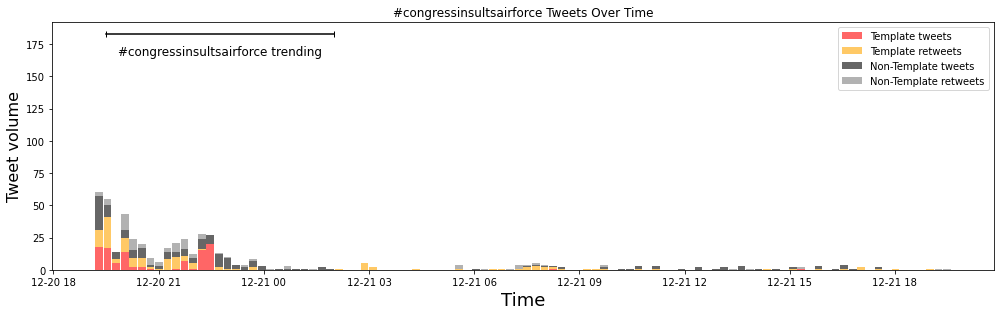

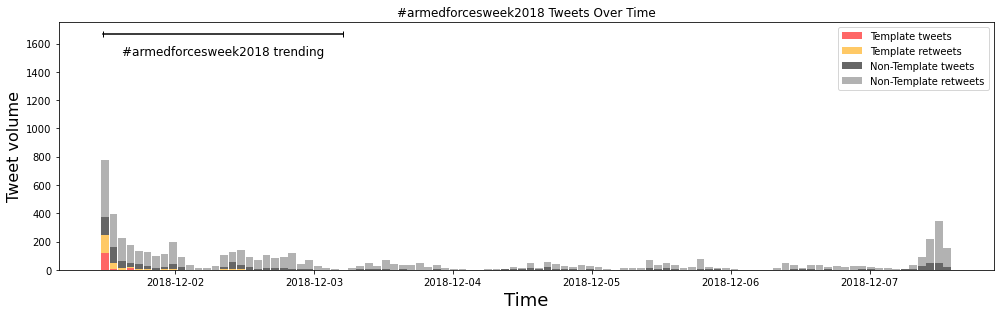

failed to plot trending data


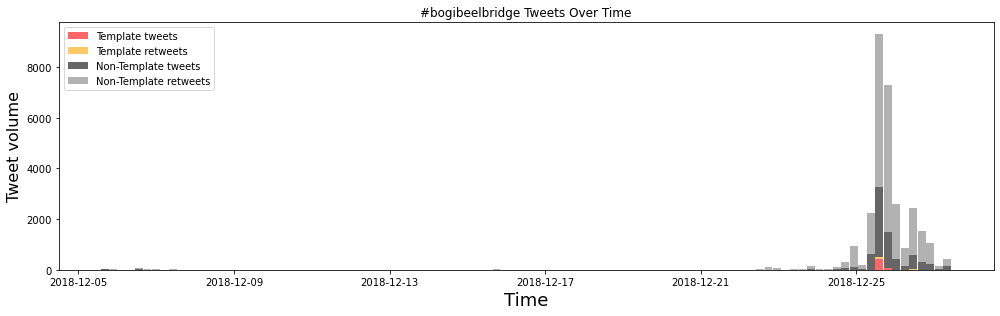

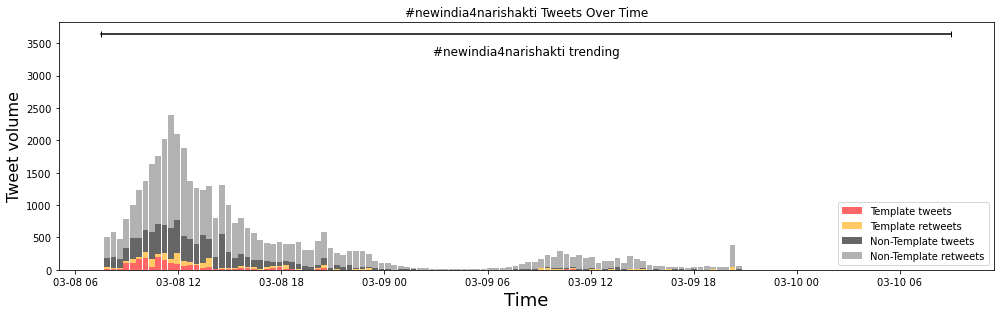

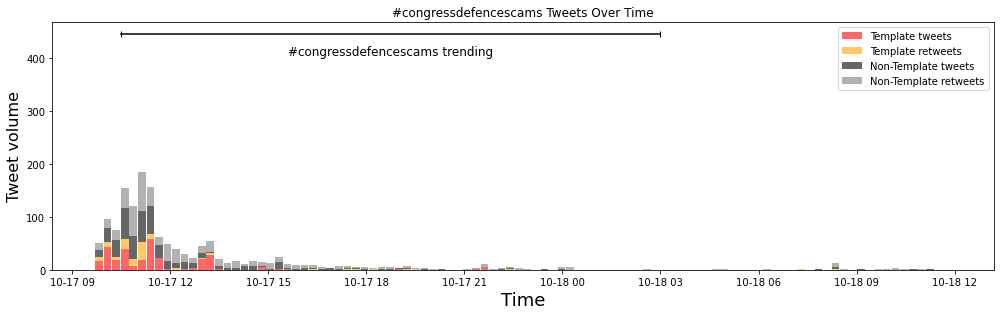

failed to plot trending data


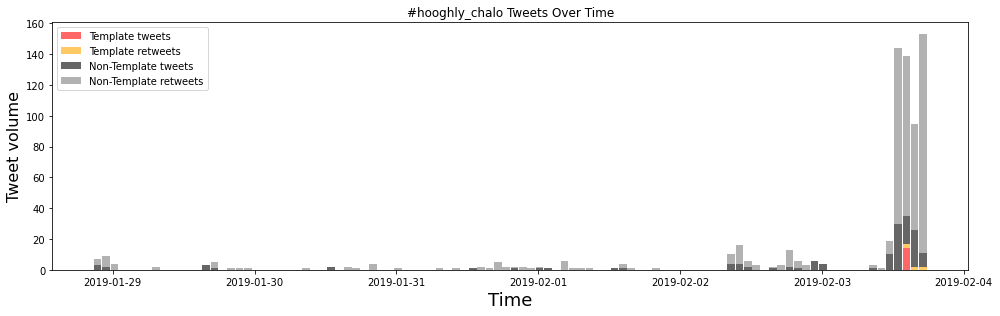

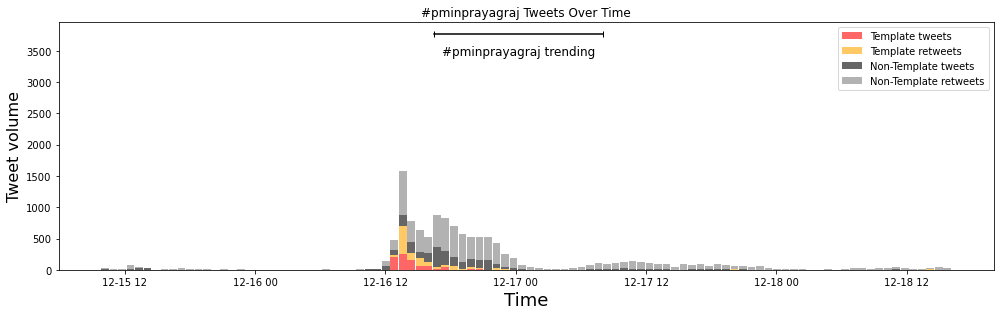

failed to plot trending data


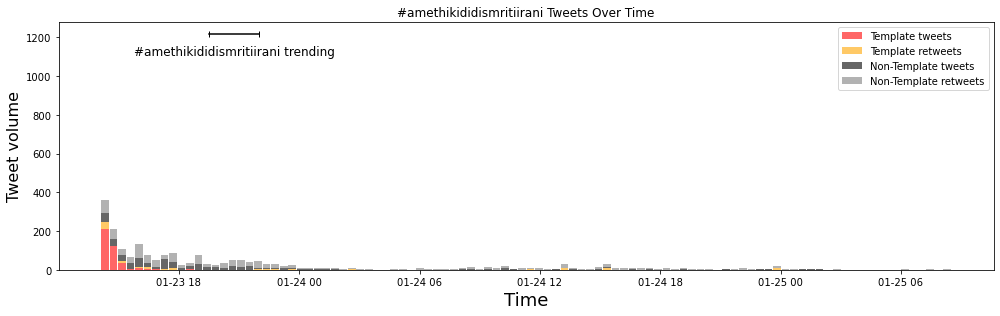

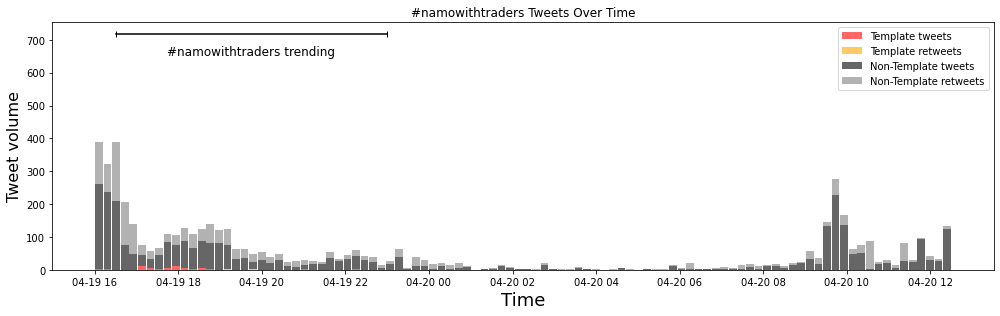

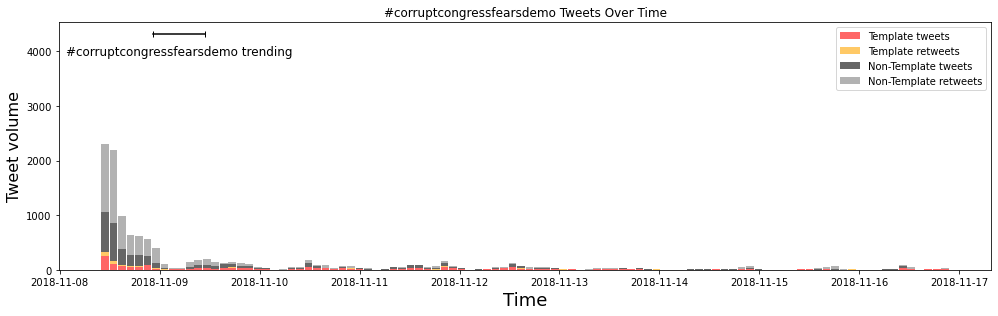

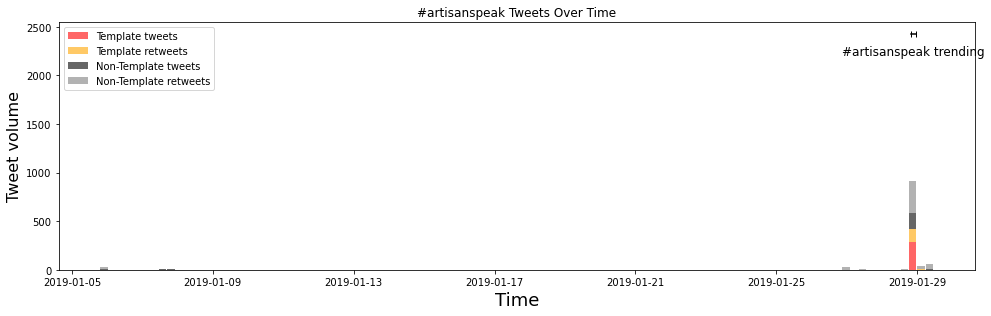

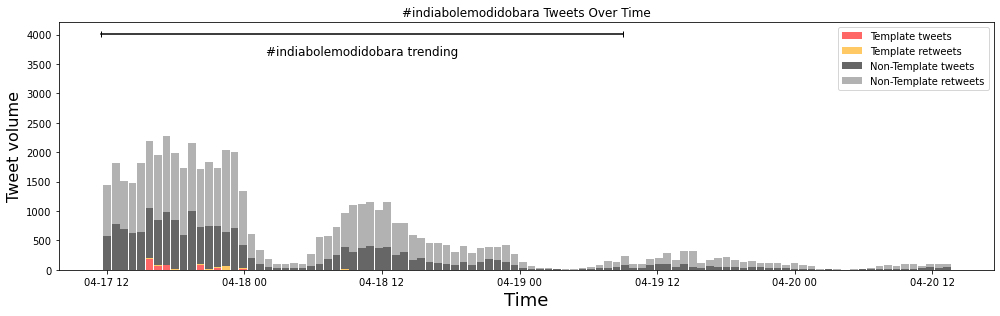

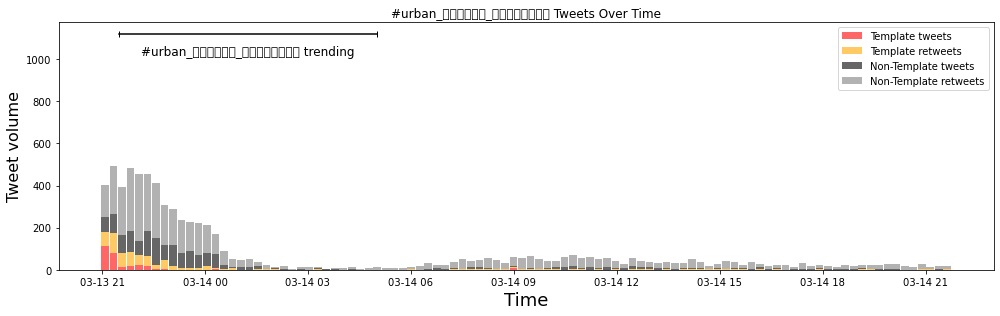

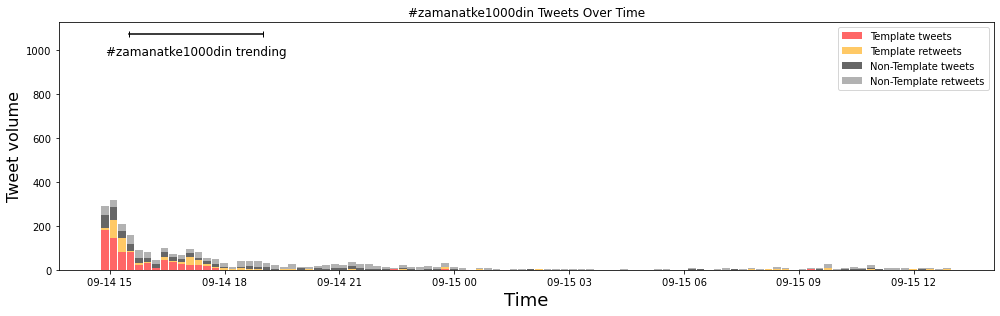

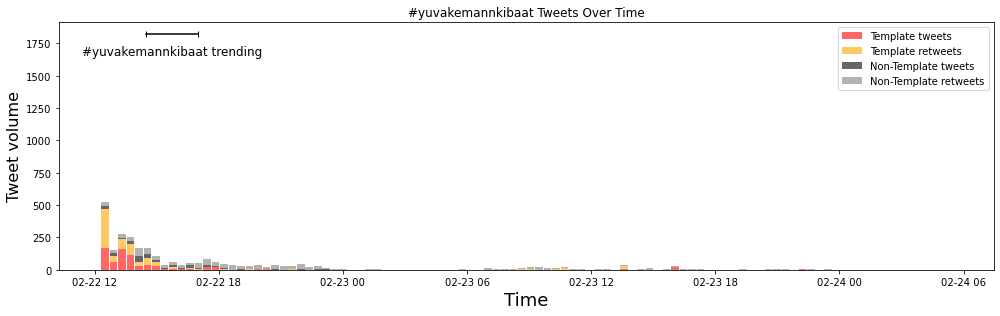

failed to plot trending data


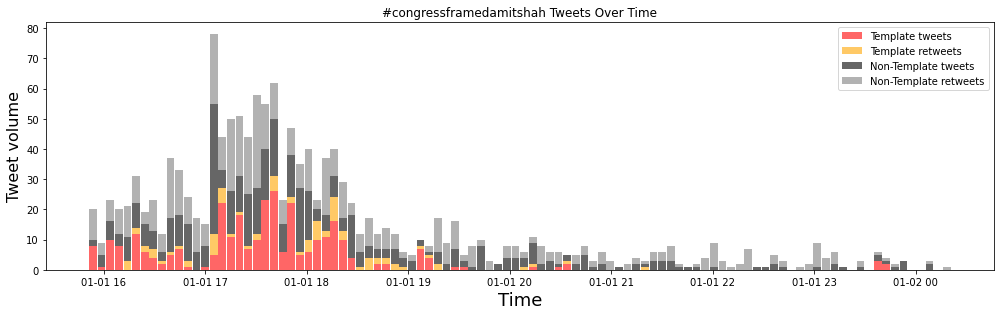

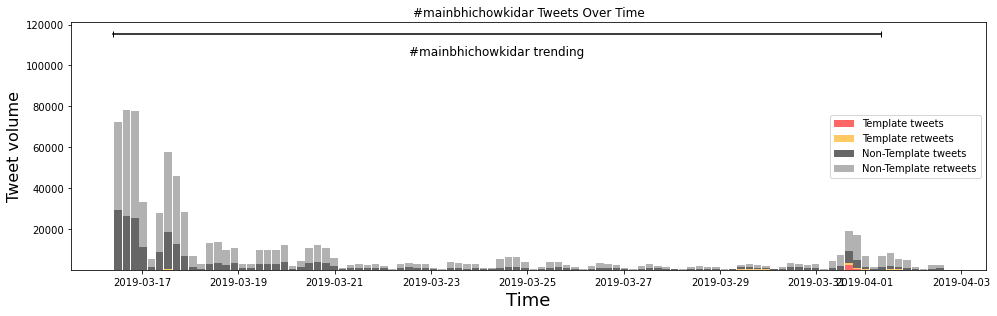

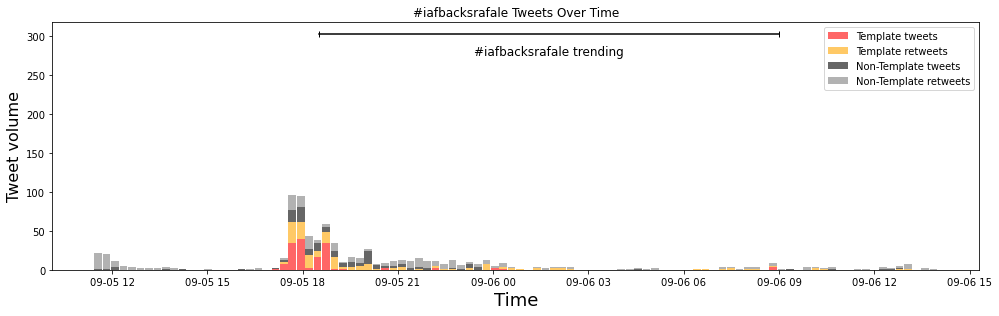

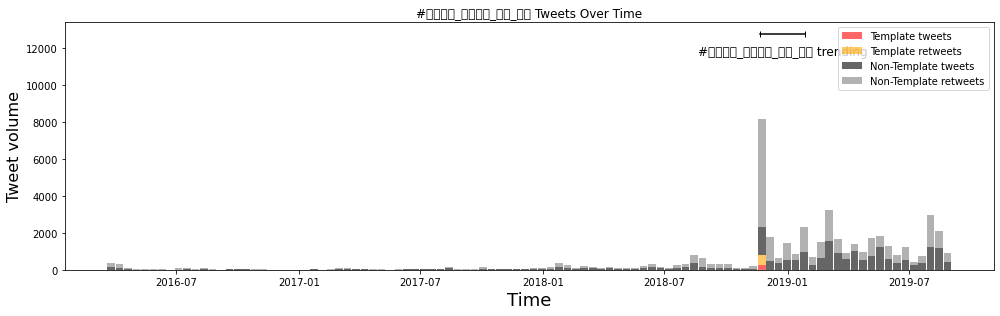

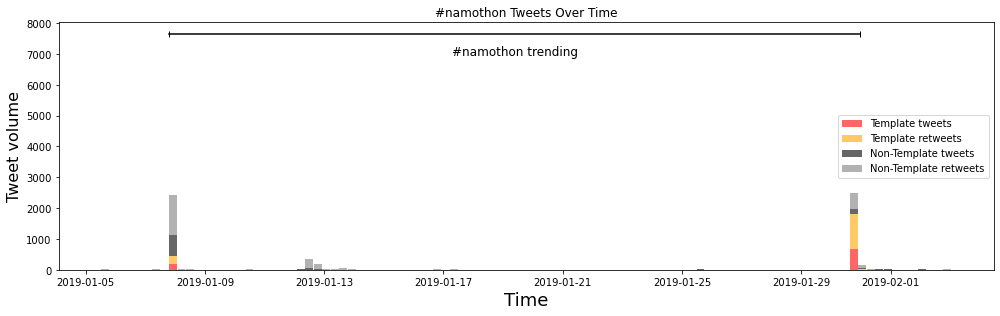

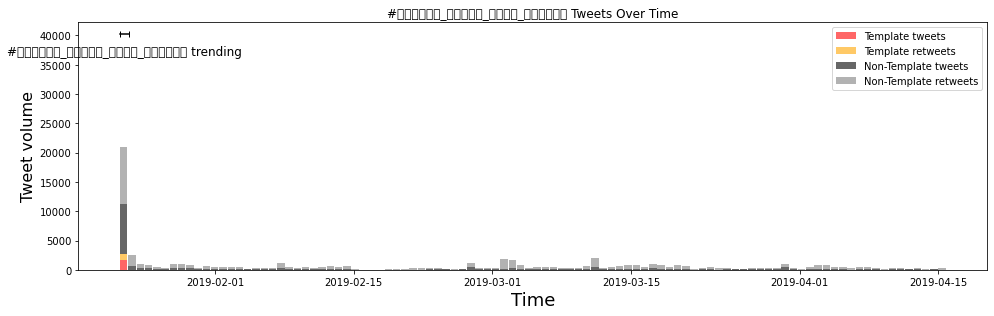

failed to plot trending data


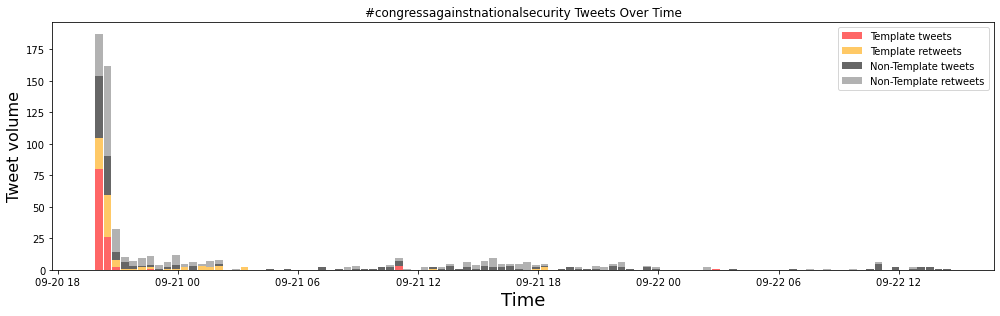

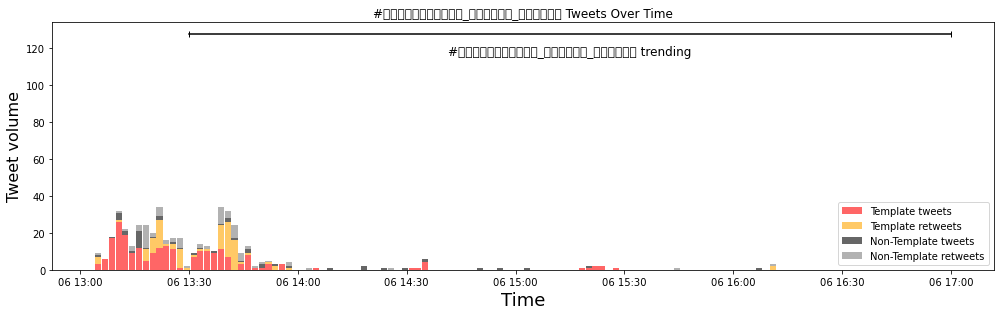

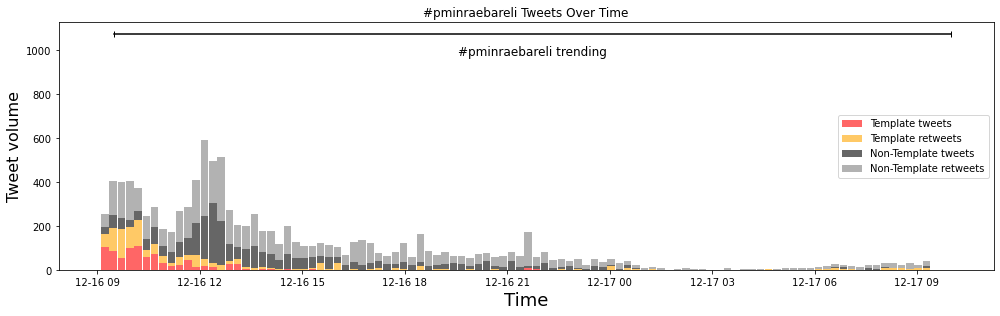

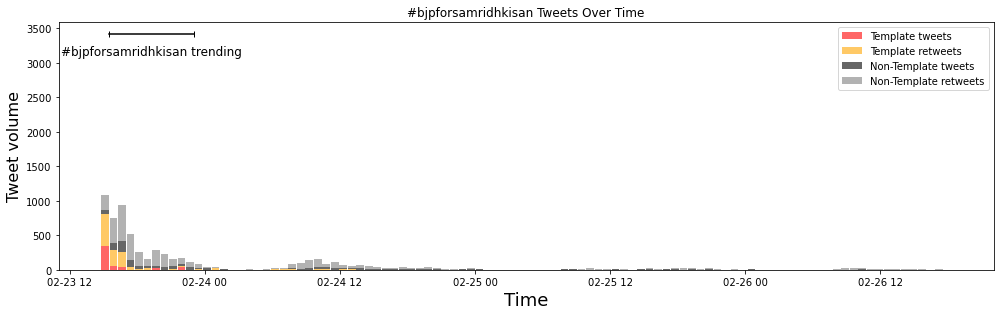

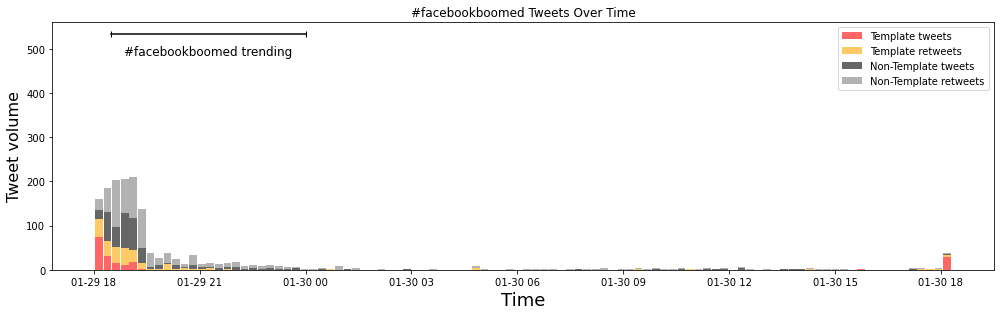

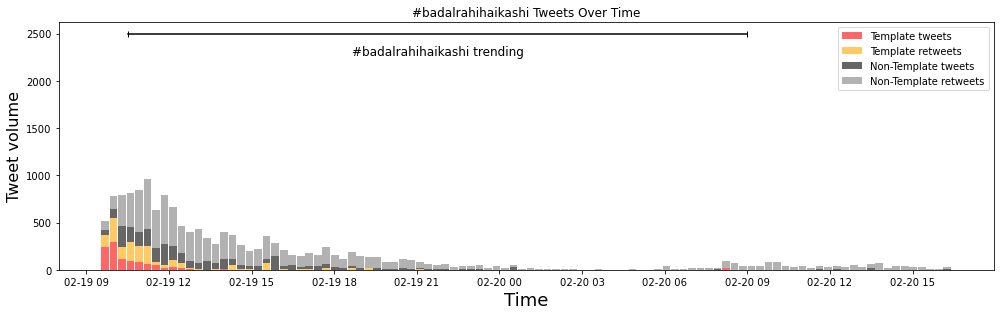

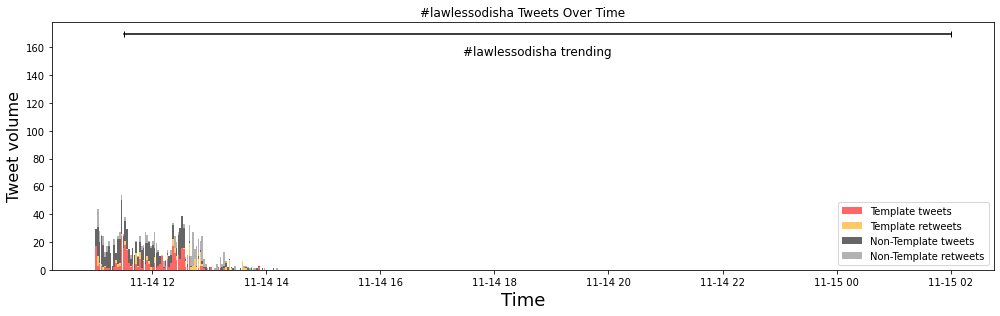

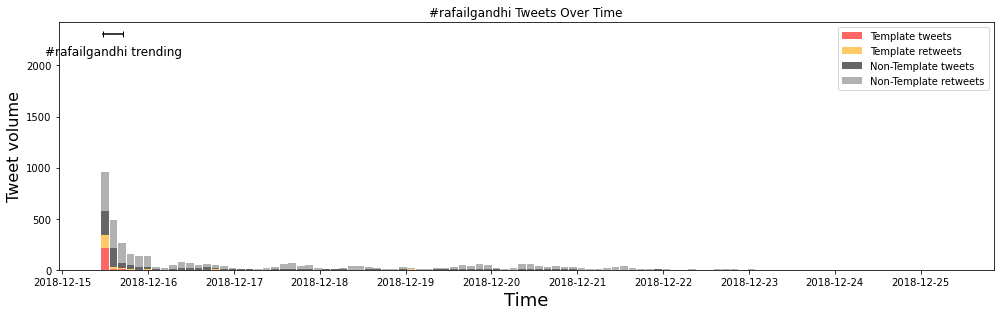

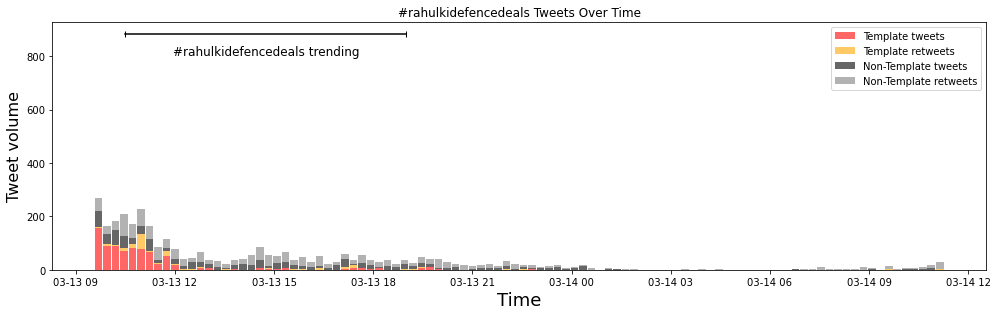

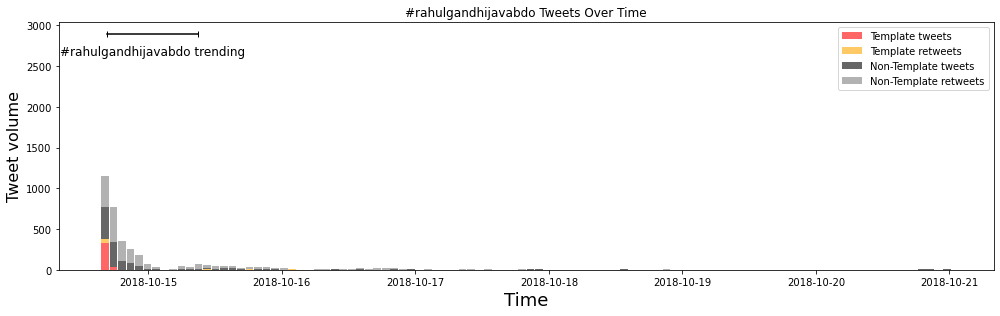

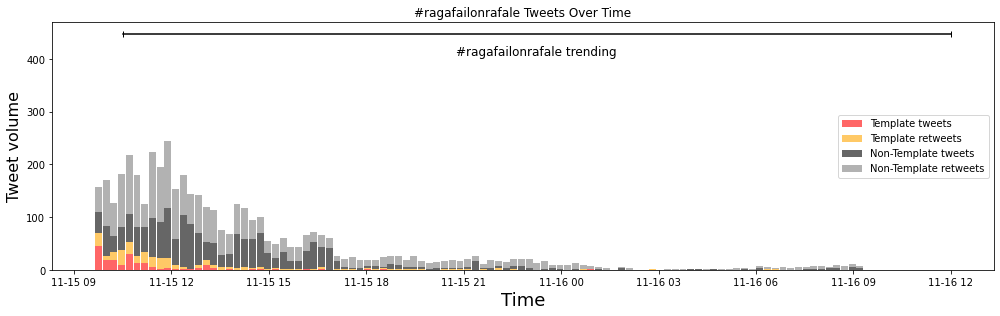

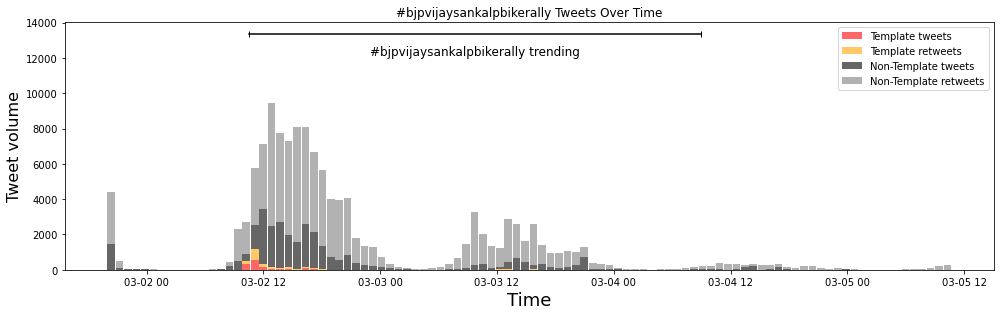

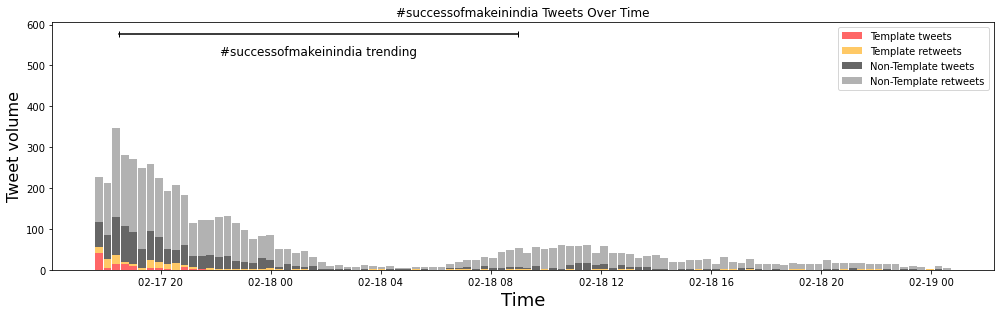

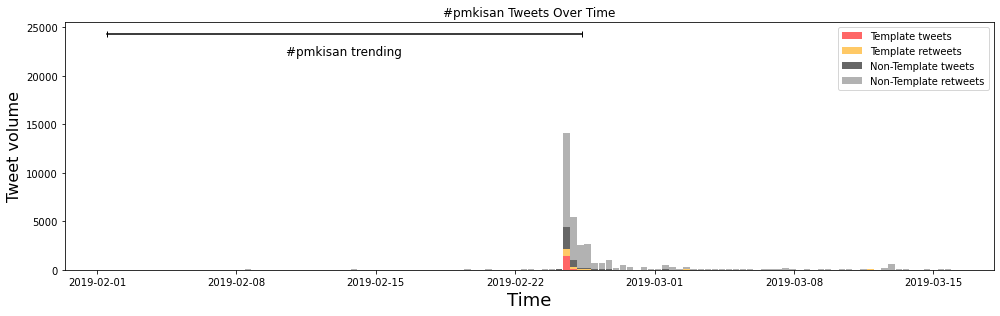

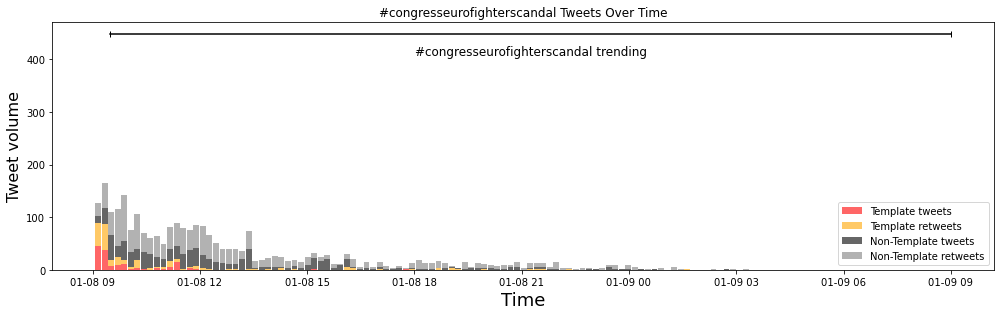

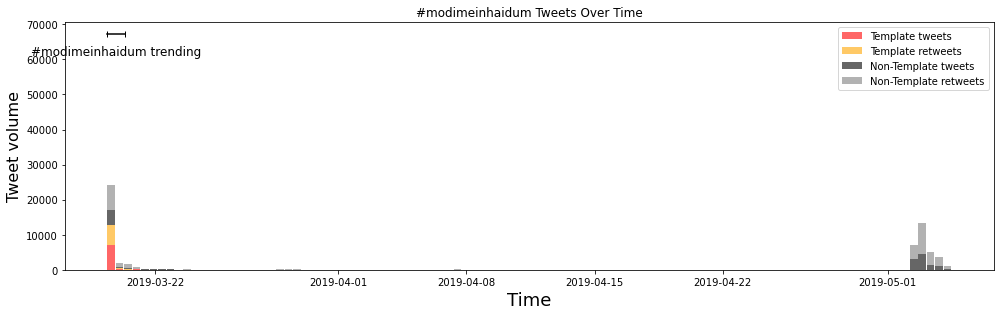

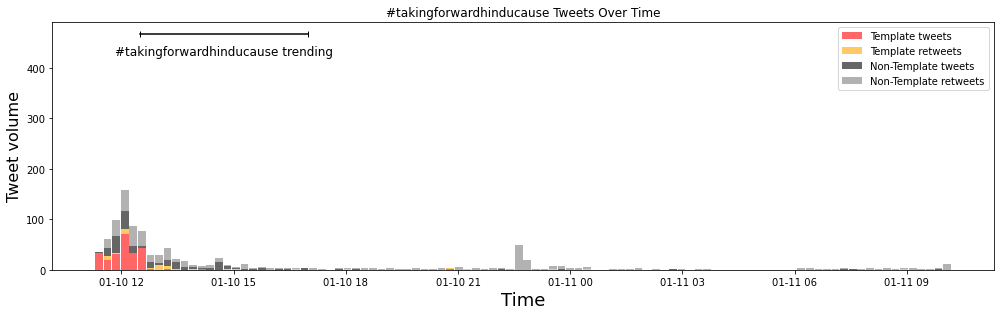

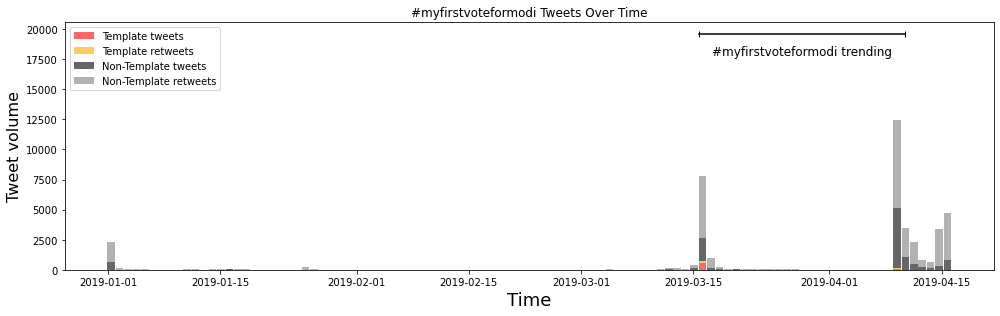

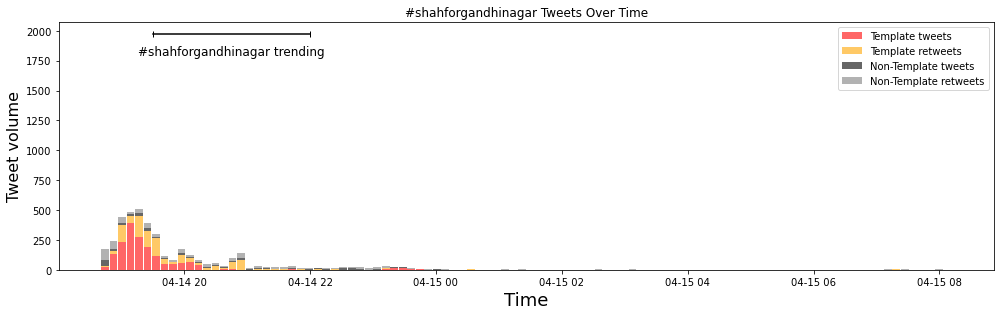

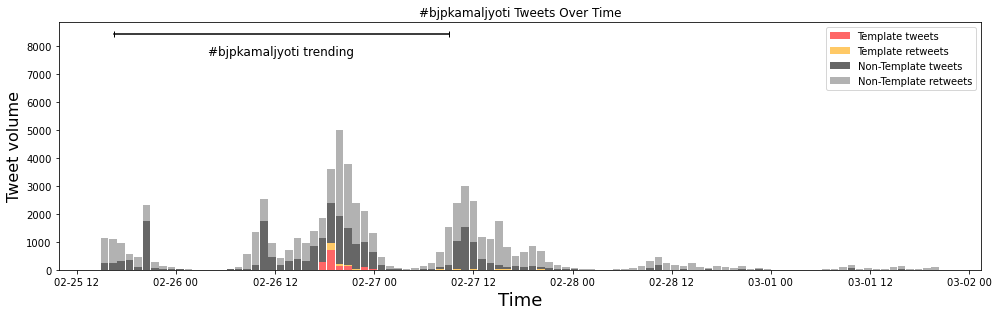

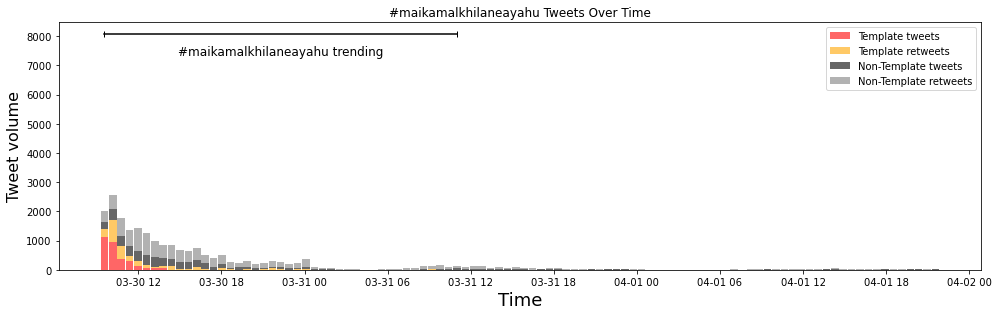

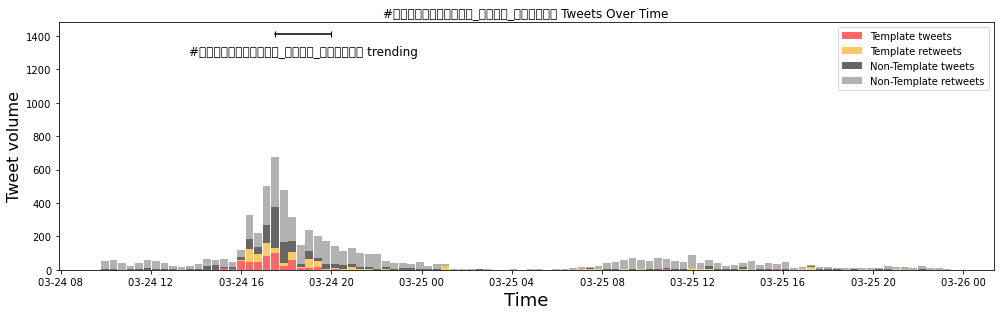

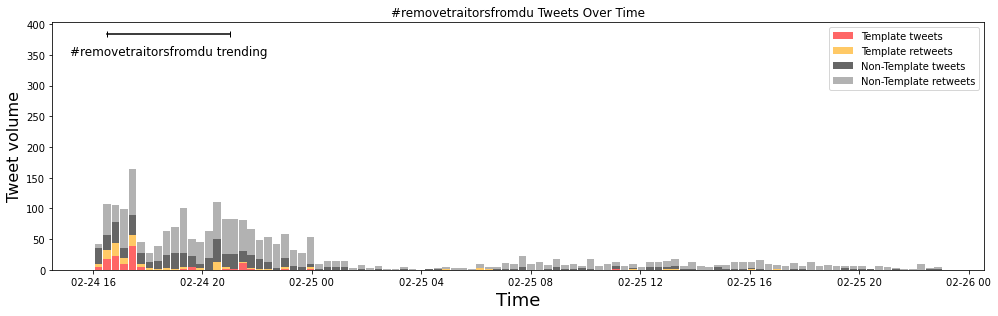

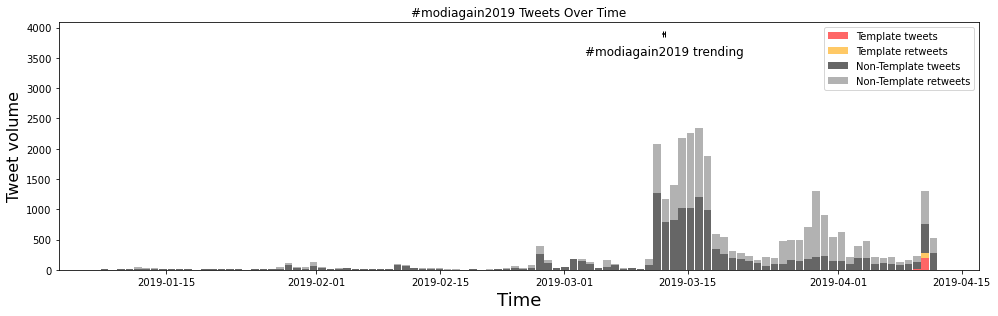

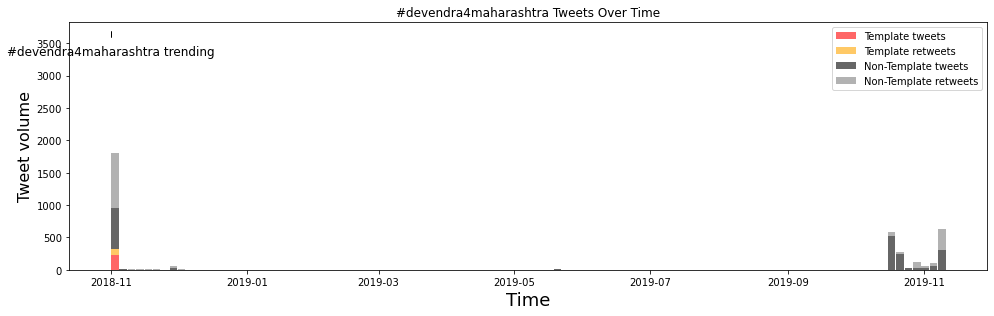

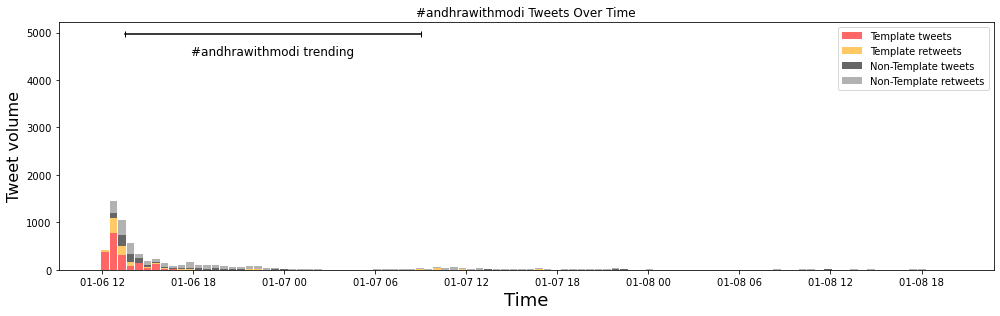

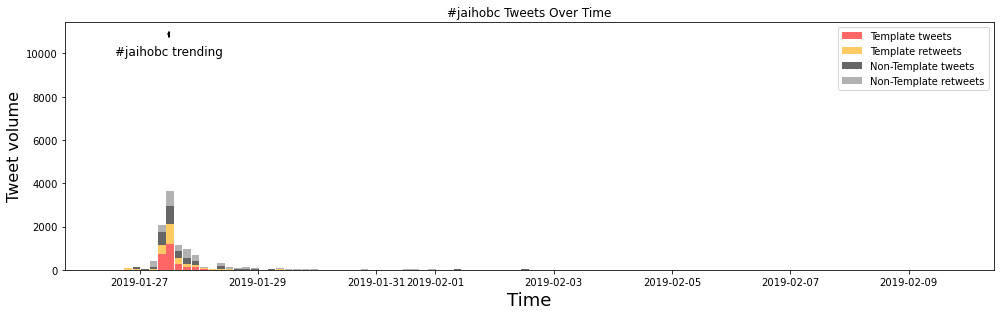

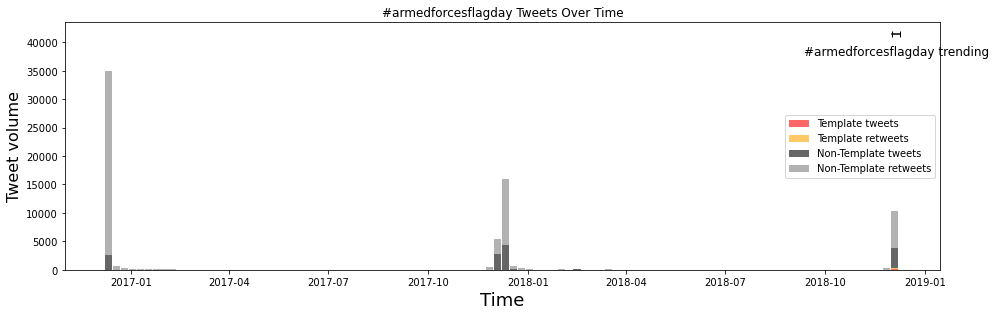

failed to plot trending data


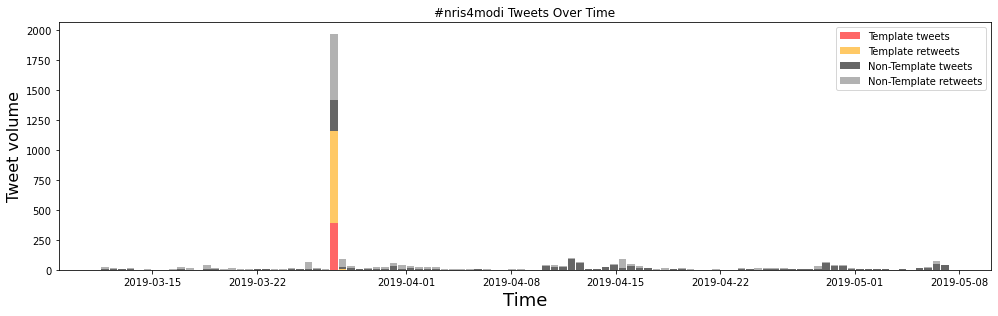

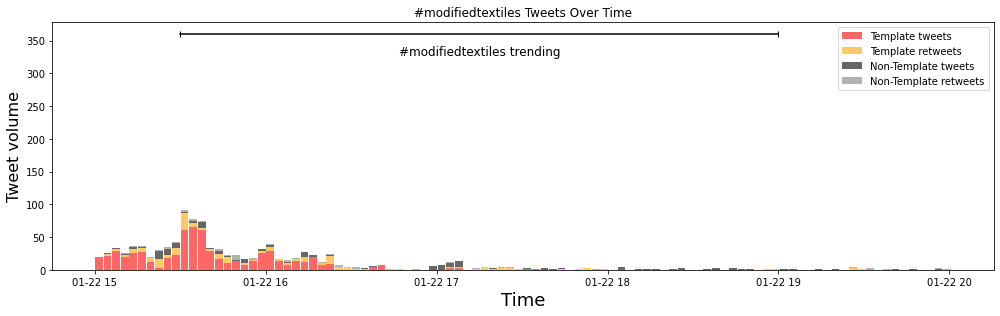

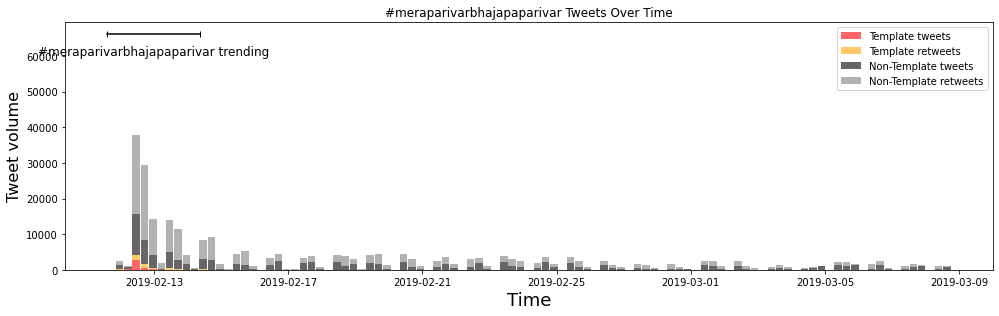

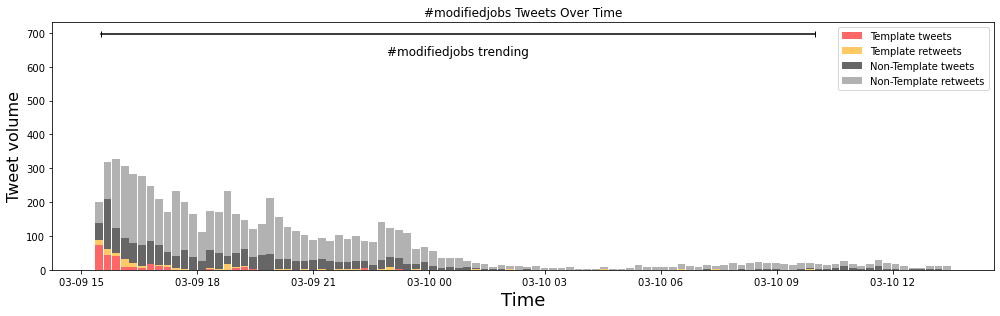

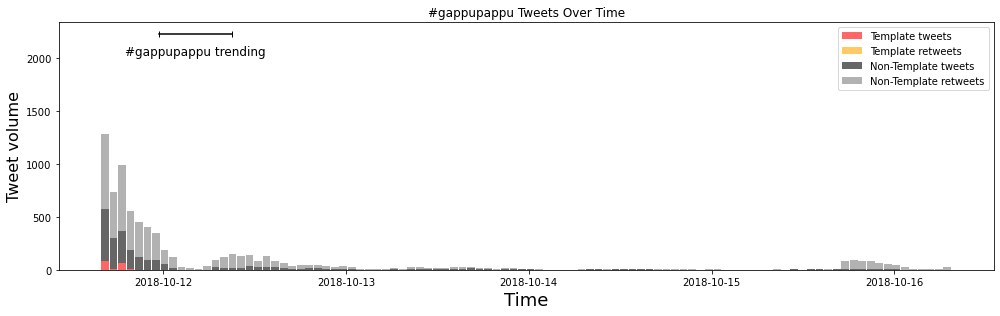

In [220]:
for ht, camp in campaigns.items():
    plot_campaign_activity(ht, camp, quantiles=(.01,.5))

# Inspecting the Campaigns and Classifying Them
### Hashtags that were not started by templates:
Denoted by a lot of grey in the beginning.
- #bjp4jind - kind of... there were 1024 uses of the HT before, but it wasn't that popular immediately preceding
- #parakramparv - again, ambiguous, this hashtag appeared to be picking up steam before the templated tweets, but who knows
- #technical textiles - tweet had existed for a long time, 870/2360 tweets occured before first template
- #himachalkacu - kind of, seemed to be brewing before hand


In [238]:
(campaign_info_dict['tweets_before_first_template']/campaign_info_dict.n_tweets).sort_values(ascending=False)

modiagain2019              0.842107
goodgovernanceday          0.832881
hooghly_chalo              0.506918
armedforcesflagday         0.500175
bjp4jind                   0.392337
                             ...   
takingforwardhinducause           0
lawlessodisha                     0
copypastencp                      0
rahulgandhijavabdo                0
congressdefencescams              0
Length: 75, dtype: object

In [4]:
bandwagon_hashtags = ['armedforcesflagday',
                     'goodgovernanceday',
                     'modiagain2019',
                     'bjpkamaljyoti',
                     'mainbhichowkidar',
                     'bjpvijaysankalpbikerally',
                     'bogibeelbridge'
                     ]

ambiguous = ['भारत_माता_की_जय',
            'myfirstvoteformodi',
            'pmkisan']

In [244]:
plot_campaign_activity

<function __main__.plot_campaign_activity(hashtag, tweet_dict, quantiles=(0.1, 0.99))>

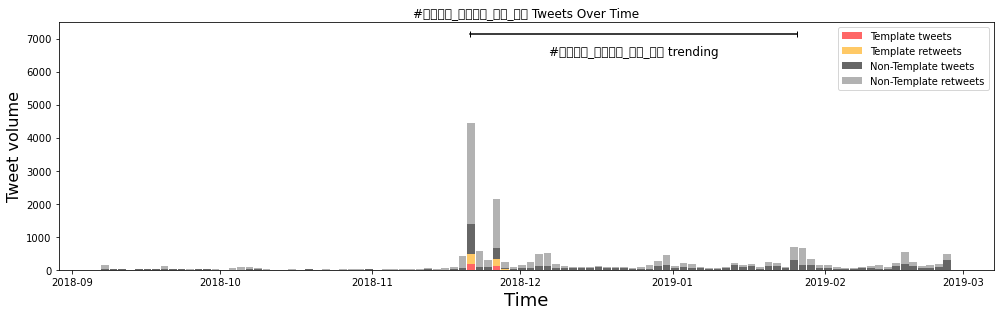

In [254]:
ht = ambiguous[0]
plot_campaign_activity(ht, campaigns[ht], quantiles=(.15, .5))

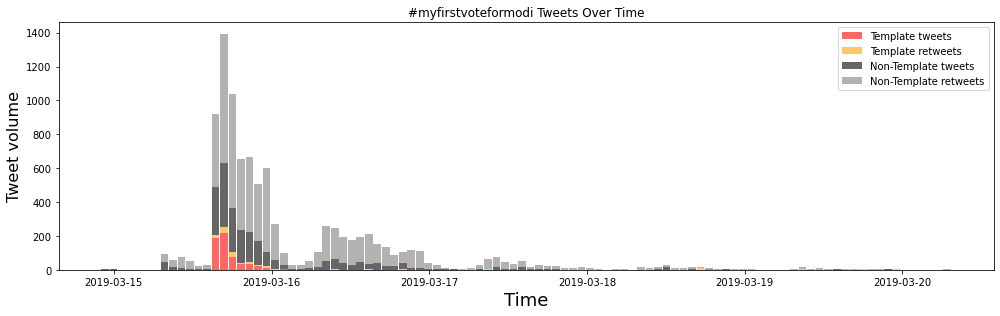

In [9]:
ht = ambiguous[1]
plot_campaign_activity(ht, campaigns[ht], quantiles=(.1, .3), include_trend=False)

failed to plot trending data


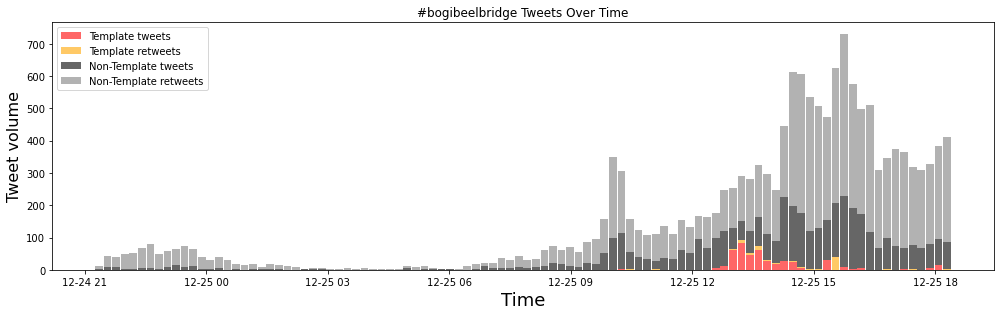

In [248]:
ht = ambiguous[2]
plot_campaign_activity(ht, campaigns[ht], quantiles=(.05, .5))

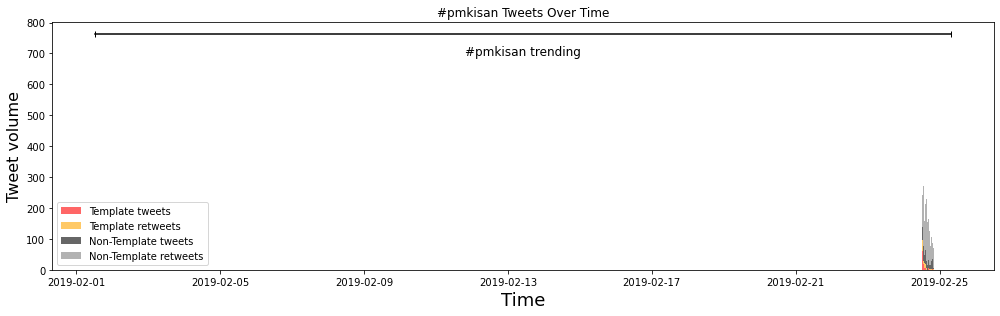

In [258]:
ht = ambiguous[3]
plot_campaign_activity(ht, campaigns[ht], quantiles=(.1, .5))

In [239]:
campaign_info_dict.sort_values('tweets_before_first_template', ascending=False).head(20)

hashtag n_tweets  \
armedforcesflagday              armedforcesflagday    79908   
goodgovernanceday                goodgovernanceday    38278   
modiagain2019                        modiagain2019    31971   
bjpkamaljyoti                        bjpkamaljyoti    67513   
mainbhichowkidar                  mainbhichowkidar   887272   
bjpvijaysankalpbikerally  bjpvijaysankalpbikerally   143497   
भारत_माता_की_जय                    भारत_माता_की_जय    54361   
myfirstvoteformodi              myfirstvoteformodi    47242   
bogibeelbridge                      bogibeelbridge    34026   
pmkisan                                    pmkisan    37803   
parakramparv                          parakramparv    25667   
jaihindkisena                        jaihindkisena     5792   
bjp4jind                                  bjp4jind     2610   
technicaltextiles                technicaltextiles     2360   
indiabolemodidobara            indiabolemodidobara    60123   
उत्तरप्रदेश_विजय_संकल्प    उत्तरप्रदेश_विजय_संकल्प     7314   
pminprayagraj                        pminprayagraj    13927   
gappupappu                              gappupappu     8450   
hooghly_chalo                        hooghly_chalo      795   
nris4modi                                nris4modi     4318   

                         tweets_before_first_template time_of_first_template  \
armedforcesflagday                              39968    2017-12-07 02:00:25   
goodgovernanceday                               31881    2018-12-25 07:54:00   
modiagain2019                                   26923    2019-04-10 02:59:19   
bjpkamaljyoti                                   18455    2019-02-26 12:20:19   
mainbhichowkidar                                11875    2019-03-16 04:43:50   
bjpvijaysankalpbikerally                        10500    2019-03-02 04:45:15   
भारत_माता_की_जय                                 10102    2018-11-20 13:27:38   
myfirstvoteformodi                               5061    2019-03-15 09:37:20   
bogibeelbridge                                   4196    2018-12-25 04:49:07   
pmkisan                                          1863    2019-02-24 05:31:00   
parakramparv                                     1062    2018-09-28 03:43:00   
jaihindkisena                                    1051    2018-12-05 03:43:03   
bjp4jind                                         1024    2019-01-27 04:20:00   
technicaltextiles                                 868    2019-01-29 04:55:00   
indiabolemodidobara                               709    2019-04-17 06:12:00   
उत्तरप्रदेश_विजय_संकल्प                           681    2019-03-24 09:41:00   
pminprayagraj                                     678    2018-12-16 07:05:00   
gappupappu                                        520    2018-10-11 10:43:11   
hooghly_chalo                                     403    2019-02-03 08:22:17   
nris4modi                                         388    2019-03-27 01:30:00   

                               trending_start         trending_end  
armedforcesflagday        2018-12-01 10:00:00  2018-12-08 23:00:00  
goodgovernanceday                        None                 None  
modiagain2019             2019-03-12 00:00:00  2019-03-12 03:00:00  
bjpkamaljyoti             2019-02-25 11:00:00  2019-02-27 03:00:00  
mainbhichowkidar          2019-03-16 04:00:00  2019-04-01 02:00:00  
bjpvijaysankalpbikerally  2019-03-02 05:00:00  2019-03-04 03:00:00  
भारत_माता_की_जय           2018-11-20 15:00:00  2019-01-26 03:00:00  
myfirstvoteformodi        2019-03-15 11:00:00  2019-04-10 04:00:00  
bogibeelbridge                           None                 None  
pmkisan                   2019-02-01 07:00:00  2019-02-25 02:00:00  
parakramparv              2018-09-28 06:00:00  2018-09-30 23:00:00  
jaihindkisena             2018-12-05 05:00:00  2018-12-06 03:00:00  
bjp4jind                  2019-01-27 05:00:00  2019-01-27 10:00:00  
technicaltextiles         2019-01-29 06:00:00  2019-01-29 08:00:00  
ind

In [235]:
campaign_info_dict.sort_values('n_tweets', ascending=False)

hashtag n_tweets  \
mainbhichowkidar                                mainbhichowkidar   887272   
meraparivarbhajapaparivar              meraparivarbhajapaparivar   309183   
bjpvijaysankalpbikerally                bjpvijaysankalpbikerally   143497   
armedforcesflagday                            armedforcesflagday    79908   
लक्ष्य_हमारा_मोदी_दोबारा                लक्ष्य_हमारा_मोदी_दोबारा    79234   
...                                                          ...      ...   
hooghly_chalo                                      hooghly_chalo      795   
msmetextilesconclave                        msmetextilesconclave      725   
congressagainstnationalsecurity  congressagainstnationalsecurity      702   
congressinsultsairforce                  congressinsultsairforce      565   
आदर्शघोटाला_संघर्ष_यात्रा              आदर्शघोटाला_संघर्ष_यात्रा      524   

                                tweets_before_first_template  \
mainbhichowkidar                                       11875   
meraparivarbhajapaparivar                                239   
bjpvijaysankalpbikerally                               10500   
armedforcesflagday                                     39968   
लक्ष्य_हमारा_मोदी_दोबारा                                 226   
...                                                      ...   
hooghly_chalo                                            403   
msmetextilesconclave                                       0   
congressagainstnationalsecurity                            0   
congressinsultsairforce                                    3   
आदर्शघोटाला_संघर्ष_यात्रा                                  0   

                                time_of_first_template       trending_start  \
mainbhichowkidar                   2019-03-16 04:43:50  2019-03-16 04:00:00   
meraparivarbhajapaparivar          2019-02-11 07:39:27  2019-02-11 09:00:00   
bjpvijaysankalpbikerally           2019-03-02 04:45:15  2019-03-02 05:00:00   
armedforcesflagday                 2017-12-07 02:00:25  2018-12-01 10:00:00   
लक्ष्य_हमारा_मोदी_दोबारा           2019-01-22 03:23:59  2019-01-22 04:00:00   
...                                                ...                  ...   
hooghly_chalo                      2019-02-03 08:22:17                 None   
msmetextilesconclave               2019-02-13 05:58:00  2019-02-13 07:00:00   
congressagainstnationalsecurity    2018-09-20 14:20:00                 None   
congressinsultsairforce            2018-12-20 13:40:00  2018-12-20 14:00:00   
आदर्शघोटाला_संघर्ष_यात्रा          2018-09-06 07:28:00  2018-09-06 08:00:00   

                                        trending_end  
mainbhichowkidar                 2019-04-01 02:00:00  
meraparivarbhajapaparivar        2019-02-14 03:00:00  
bjpvijaysankalpbikerally         2019-03-04 03:00:00  
armedforcesflagday               2018-12-08 23:00:00  
लक्ष्य_हमारा_मोदी_दोबारा         2019-01-23 03:00:00  
...                                              ...  
hooghly_chalo                                   None  
msmetextilesconclave             2019-02-13 09:00:00  
congressagainstnationalsecurity                 None  
congressinsultsairforce          2018-12-20 20:00:00  
आदर्शघोटाला_संघर्ष_यात्रा        2018-09-06 11:00:00  

[75 rows x 6 columns]

Hashtag:  jharkhandwithmodi
Total # of collected tweets:  13908
First tweet: 
टाइगर आज झारखंड के दौरे पर पहुँच चुके हैं। #modiinjharkhand @narendramodi #jharkhandwithmodi #namoagain https://t.co/2mdjsyz7ks - manojgoelbjp  on  2019-01-05 05:51:48
Number of tweets before first template tweet: 23
First template tweet: 
हर पल झारखण्ड का ख्याल रखने, झारखण्ड की जरुरतों को समझने, सेवा करने और राज्य को विकास के पथ पर आगे बढ़ाने के लिए सवा तीन करोड़वासियों की ओर से प्रधानमंत्री नरेंद्र मोदी का कोटि कोटि धन्यवाद। #jharkhandwithmodi - sunilsingh_bjp  on  2019-02-17 06:18:10
hashtag trended from 2019-02-17 10:00:00 to 2019-02-17 16:00:00


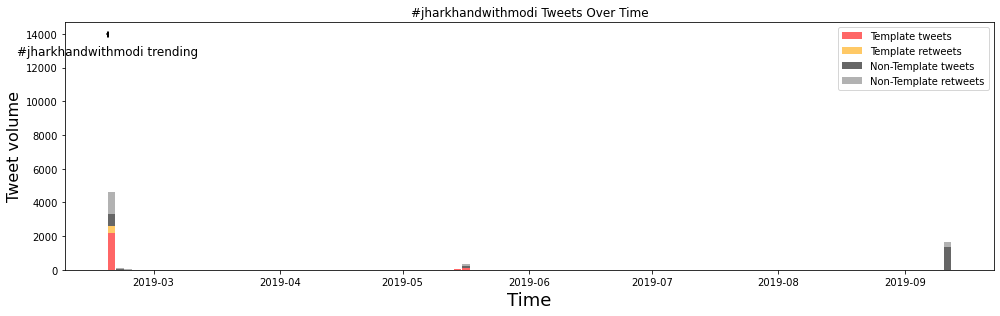

Hashtag:  surgingsilk
Total # of collected tweets:  871
First tweet: 
#surgingsilk new delhi https://t.co/esdi3ca2di - amitnsonu  on  2019-02-09 11:31:19
Number of tweets before first template tweet: 1
First template tweet: 
with help of central silk board & an entrepreneur in champa , modigovt introduced buniyaad reeling machine to achieve better productivity , quality & eliminate drudgery in tasar reeling . #surgingsilk - ani30oct  on  2019-02-09 12:28:00
hashtag trended from 2019-02-09 13:00:00 to 2019-02-09 15:00:00


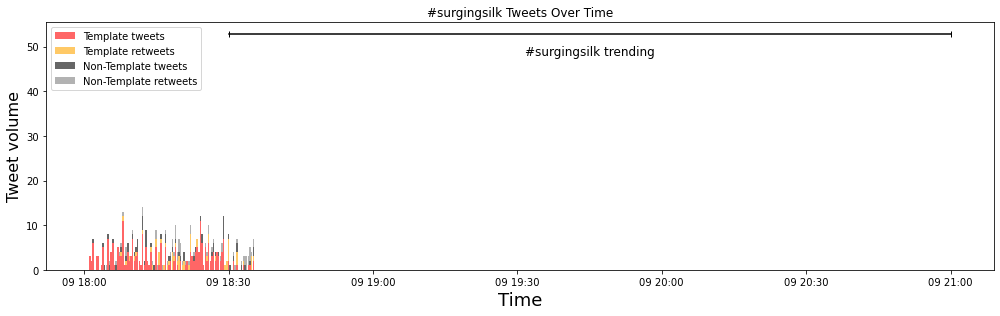

Hashtag:  merapmmeraabhimaan
Total # of collected tweets:  45942
First tweet: 
#merapmmeraabhimaan https://t.co/ngkho64ym7 - modifiergoel  on  2016-06-08 08:26:45
Number of tweets before first template tweet: 66
First template tweet: 
construction of 76,813 community and public toilet seats completed. #merapmmeraabhimaan @bjp4india - yash1m  on  2018-11-11 04:53:09
hashtag trended from 2018-11-11 06:00:00 to 2018-11-12 05:00:00


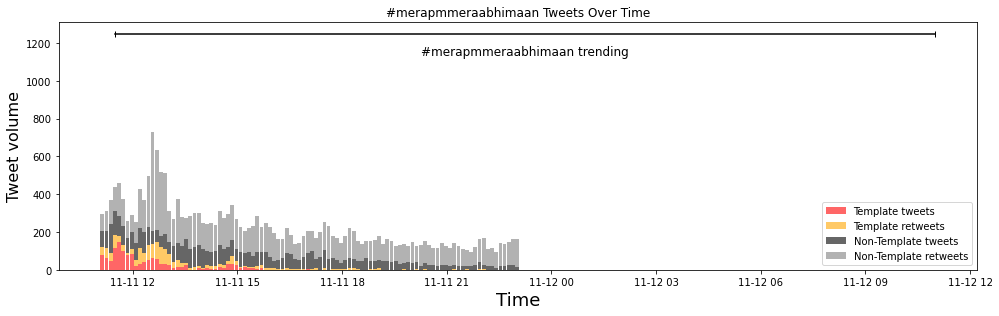

Hashtag:  kiamadeinap
Total # of collected tweets:  4039
First tweet: 
rt @aryavj_: india's first kia car 'made in ap' to have trail run tomorrow in the presence of @ncbn 👌🏻 this manufacturing unit will have the installed capital of 3 lakh vehicles per annum. biggest fd investment in india grounded as of now. #kiamadeinap #andhrapradesh https://t.co/zd8x3zerck - tagoremallineni  on  2019-01-28 16:12:39
Number of tweets before first template tweet: 3
First template tweet: 
36 ఎకరాల్లో ఉద్యోగుల కోసం టౌన్షిప్ #kiamadeinap @kiamotorsin279 #cbnarmytenali https://t.co/zwxugwdlsw - venkatagowtham5  on  2019-01-28 17:40:14
hashtag trended from 2019-01-29 04:00:00 to 2019-01-29 09:00:00


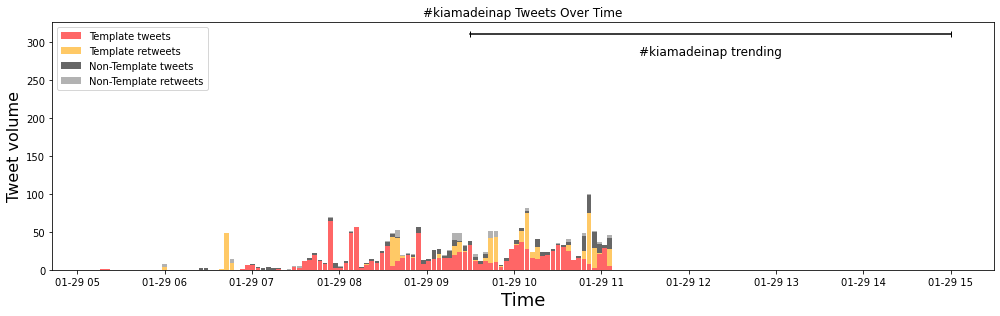

Hashtag:  dousupportnaxals
Total # of collected tweets:  1271
First tweet: 
#dousupportnaxals शहरी नक्सलियों पर जरा सा ख़तरा दिखाई देता है तो देश के सारे जयचंद अपनी छाती पीटना शुरू कर देते हैं।#knowyoururbannaxals @advmonikaarora @lalitanijhawan @rajivtuli69 @upma23 @kaushkrahul @tajinderbagga @abhijitmajumder @naidu_rachana @hiteshshankar https://t.co/lsged9duap - drshrutimishra  on  2018-09-04 05:30:38
Number of tweets before first template tweet: 7
First template tweet: 
the recent arrests of five activists from various cities for their alleged links with the naxal movement in india has been followed by a well-orchestrated outpouring of concerns about stifling of dissent by the state. #dousupportnaxals - rakeshdas27  on  2018-09-04 09:24:48
hashtag trended from 2018-09-04 11:00:00 to 2018-09-05 00:00:00


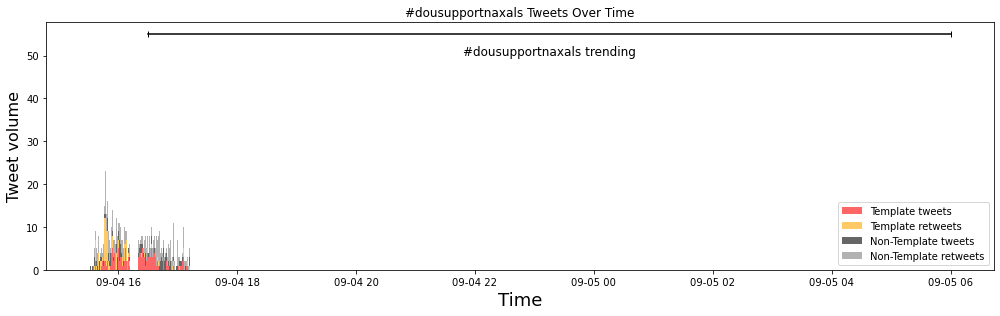

Hashtag:  mizoramwithmodi
Total # of collected tweets:  5173
First tweet: 
pm shri @narendramodi will address a public rally in lunglei, mizoram at 12 pm today. watch live at http:// facebook.com/bjp4india . listen live by dialing 9345014501. #mizoramwithmodi pic.twitter.com/1yub2srmin - bjp4india  on  2018-11-23 04:42:00
Number of tweets before first template tweet: 39
First template tweet: 
#mizoramwithmodi the long standing demand for the sixth schedule amendment for the adc's in mizoram will be one of… https://t.co/7uatupnkkk - isinghapurva  on  2018-11-23 05:24:36
hashtag trended from 2018-11-24 04:00:00 to 2018-11-24 05:00:00


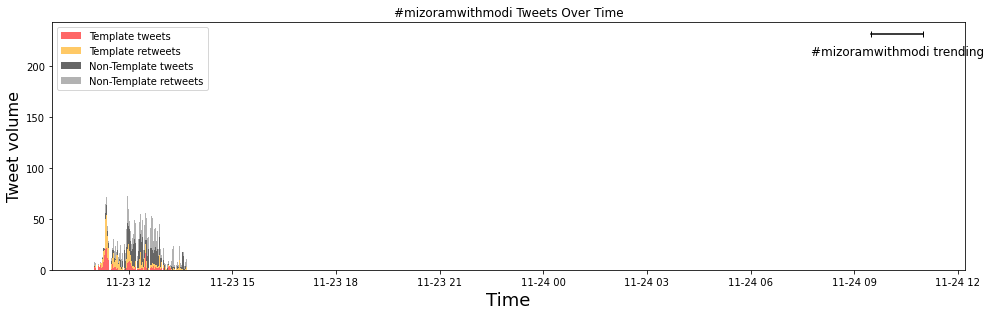

Hashtag:  timesofrahul
Total # of collected tweets:  2801
First tweet: 
rahul gandhi is truly fulfilling mahatma’s dream who wanted to disband the congress party after india won independence. #timesofrahul know more of his hilarious stories at https://www. timesofrahul.com / - ashishmerkhed  on  2019-04-22 03:09:00
Number of tweets before first template tweet: 0
First template tweet: 
rahul gandhi is truly fulfilling mahatma’s dream who wanted to disband the congress party after india won independence. #timesofrahul know more of his hilarious stories at https://www. timesofrahul.com / - ashishmerkhed  on  2019-04-22 03:09:00
hashtag trended from 2019-04-22 04:00:00 to 2019-04-22 11:00:00


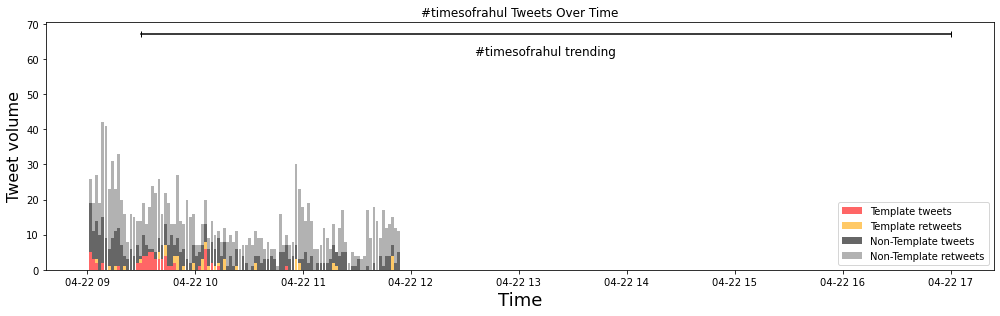

Hashtag:  threadsofexcellence
Total # of collected tweets:  1070
First tweet: 
for the first time since independence , a special package of rs . 6000 crores each for 3 years for garmenting and made-ups sector . #threadsofexcellence - iam_manojgoenka  on  2019-01-06 11:57:00
Number of tweets before first template tweet: 0
First template tweet: 
for the first time since independence , a special package of rs . 6000 crores each for 3 years for garmenting and made-ups sector . #threadsofexcellence - iam_manojgoenka  on  2019-01-06 11:57:00
hashtag trended from 2019-01-06 13:00:00 to 2019-01-06 16:00:00


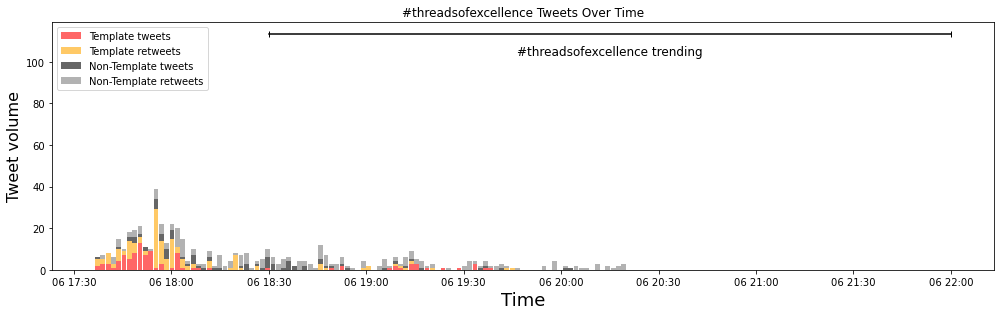

Hashtag:  msmetextilesconclave
Total # of collected tweets:  725
First tweet: 
to provide economic support , sustainability and timely assistance to artisans , mudra loans are being disbursed at interest subvention of 6 % for a period of 3 years to meet their credit requirements . #msmetextilesconclave - ani30oct  on  2019-02-13 05:58:00
Number of tweets before first template tweet: 0
First template tweet: 
to provide economic support , sustainability and timely assistance to artisans , mudra loans are being disbursed at interest subvention of 6 % for a period of 3 years to meet their credit requirements . #msmetextilesconclave - ani30oct  on  2019-02-13 05:58:00
hashtag trended from 2019-02-13 07:00:00 to 2019-02-13 09:00:00


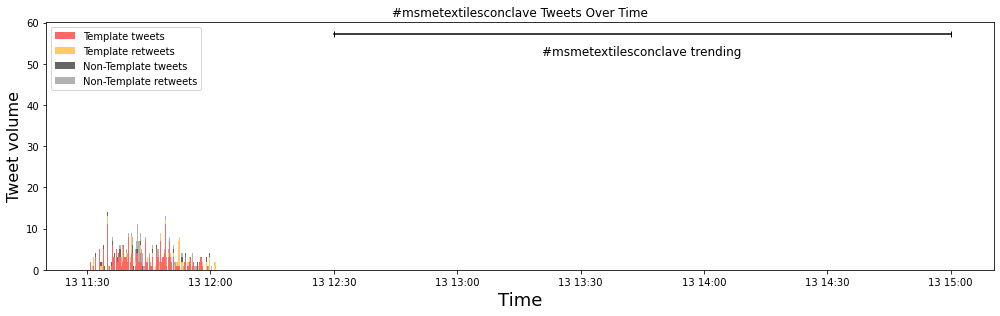

Hashtag:  bjp4jind
Total # of collected tweets:  2610
First tweet: 
जींद की ज़िद भाजपा इब" #bjp4jind @mlkhattar @subhashbrala pic.twitter.com/acjmqfpviq" - bjp4haryana  on  2019-01-04 12:55:00
Number of tweets before first template tweet: 1024
First template tweet: 
#अमृतस्कीम के 20 करोड़ रुपये की लागत से #jind की पानी की निकासी की समस्या का समाधान , @mlkhattar सरकार का #jind की जनता को उपहार है | सरकारें तो आयी घणी गयी घणी , पर जींद की बात तो मनोहर सरकार में ही बणी | #bjp4jind @subhashbrala @sureshbhattbjp @drkrishanmiddha #bjp4haryana pic.twitter.com/trlew4jqm2 - isinghvikash  on  2019-01-27 04:20:00
hashtag trended from 2019-01-27 05:00:00 to 2019-01-27 10:00:00


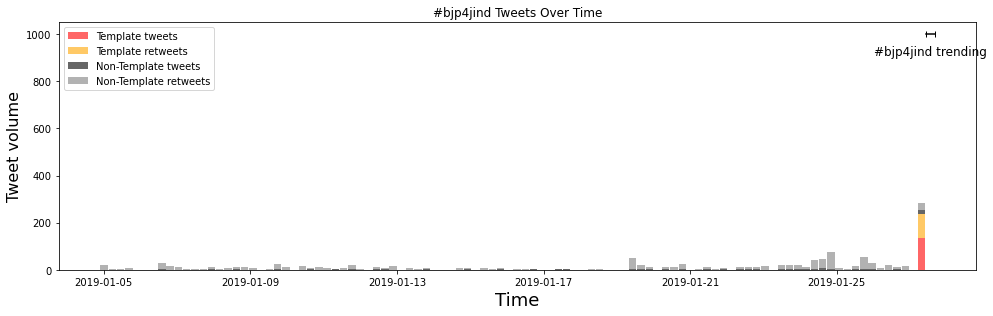

Hashtag:  म्हारा_वोट_भाजपा_को
Total # of collected tweets:  29131
First tweet: 
याद है कि भूल गए जब गहलोत सरकार में राजस्थान की जनता पानी के लिए तरसती थी। लेकिन अब तरसना नहीं पड़ता है क्योंकि भाजपा सरकार ने घर-घर पानी पहुंचाया। #म्हारा_वोट_भाजपा_को - sharmakhemchand  on  2018-12-05 04:48:32
Number of tweets before first template tweet: 0
First template tweet: 
याद है कि भूल गए जब गहलोत सरकार में राजस्थान की जनता पानी के लिए तरसती थी। लेकिन अब तरसना नहीं पड़ता है क्योंकि भाजपा सरकार ने घर-घर पानी पहुंचाया। #म्हारा_वोट_भाजपा_को - sharmakhemchand  on  2018-12-05 04:48:32
hashtag trended from 2018-12-05 06:00:00 to 2018-12-06 05:00:00


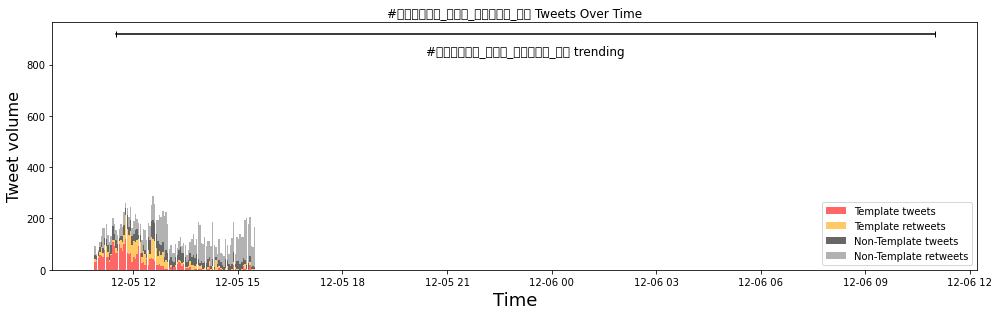

Hashtag:  parakramparv
Total # of collected tweets:  25667
First tweet: 
kshama shobti us bhujang ko, jiske pass garal ho. usko kya jo dant-heen vishrahit, vineet, saral ho. 28-30 september 2018 poore desh ke vibhinn sthano par aayen aur bhartiya sena ke sahas, veerta aur balidaan ki gaatha ko yaad karen #parakramparv https://t.co/pfqtvwff2x - adgpi  on  2018-09-22 14:19:14
Number of tweets before first template tweet: 1062
First template tweet: 
we are grateful to the prime minister for reposing faith and confidence in the indian army! #parakramparv - adiviratian_  on  2018-09-28 03:43:00
hashtag trended from 2018-09-28 06:00:00 to 2018-09-30 23:00:00


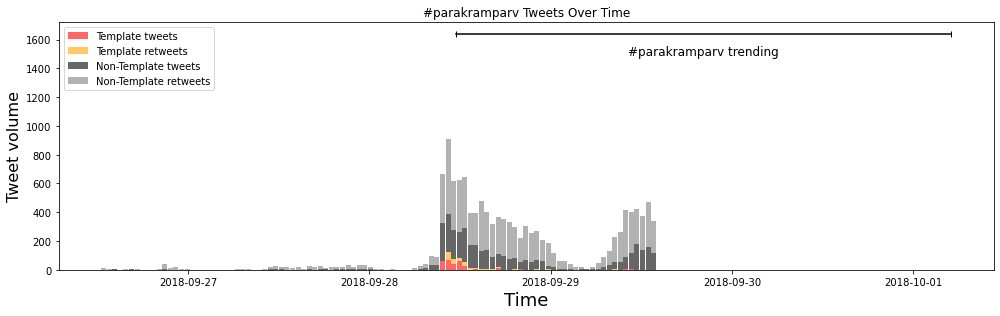

Hashtag:  technicaltextiles
Total # of collected tweets:  2360
First tweet: 
rt @vinituict: three day conference on textile from dec 15, ibn live news http://t.co/0okggkvz #nonwovens #technicaltextiles - nonwovensmag  on  2011-12-05 21:17:14
Number of tweets before first template tweet: 868
First template tweet: 
textile ministry is focusing on manufacturing of material and products that are used primarily for technical performance and functional properties rather than aesthetic properties and decorative characteristics . #technicaltextiles - iajaysharma_bjp  on  2019-01-29 04:55:00
hashtag trended from 2019-01-29 06:00:00 to 2019-01-29 08:00:00


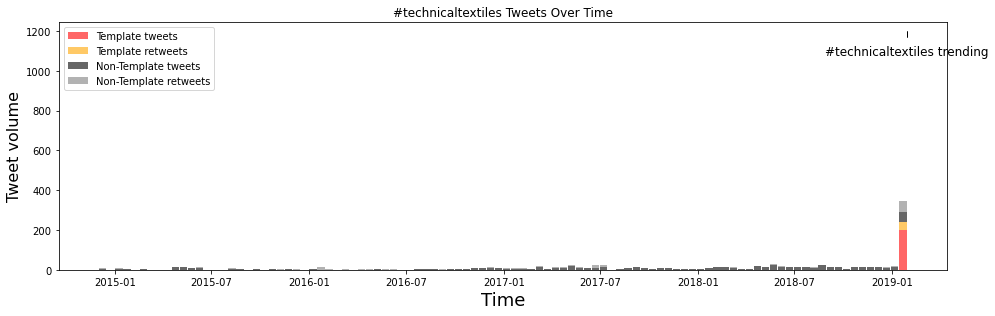

Hashtag:  himachalkacu
Total # of collected tweets:  1515
First tweet: 
केंद्रीय विश्वविद्यालय से मिलेगी युवाओं के सपनों को उड़ान उच्च शिक्षा हिमाचल प्रदेश मिलाकर श्री अनुराग ठाकुर जी ने बढ़ाई हमारी शान। पूरा हुआ सपना , सी.यू . हुआ अपना । श्री अनुराग ठाकुर जी हिमाचल प्रदेश आपका हमेशा आभारी रहेगा। #himachalkacu pic.twitter.com/pgtqylfzlv - irahulharoli  on  2019-02-21 04:16:00
Number of tweets before first template tweet: 53
First template tweet: 
how will india become a global power? by educating its 650 million young population. thats why initiatives like #himachalkacu are transformative. thanks @narendramodi ji @ianuragthakur ji educate to empower ! #himachalkacu - advocatebhavna  on  2019-02-21 06:07:31
hashtag trended from 2019-02-21 07:00:00 to 2019-02-21 09:00:00


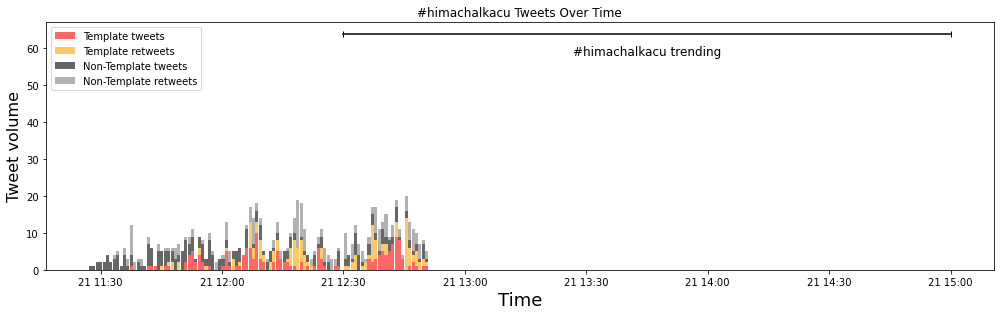

Hashtag:  congaapbhaibhai
Total # of collected tweets:  2950
First tweet: 
@jitengajaria yeh sab kaam to congress karti hai to kya we can safely say #congaapbhaibhai - kushal_mehra  on  2013-07-10 10:05:00
Number of tweets before first template tweet: 277
First template tweet: 
दिल्ली के मुख्यमंत्री अरविन्द केजरीवाल ने लोगों का भरोसा तोड़कर दिल्ली को बर्बाद कर दिया है। #congaapbhaibhai - irajpootshubham  on  2019-02-22 12:22:59
hashtag trended from 2019-02-22 13:00:00 to 2019-02-22 20:00:00


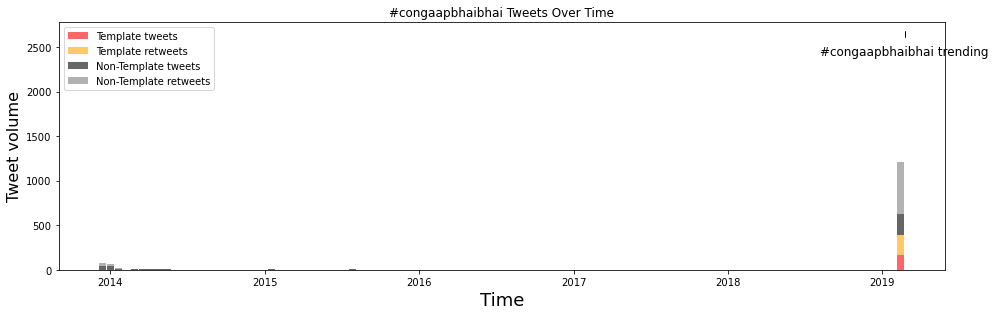

Hashtag:  sizeindia
Total # of collected tweets:  1434
First tweet: 
after us, uk and europe, india will have its own standard of apparel size, with the government set to introduce #sizeindia project https://www. thestatesman.com/india/size-ind ia-new-project-give-india-standard-apparel-size-1502726247.html … - thestatesmanltd  on  2019-01-20 18:28:00
Number of tweets before first template tweet: 20
First template tweet: 
now india will no more have to struggle to find the right size or confuse between uk/us charts, soon we'll be having our own size chart. thank you @narendramodi and @smritiirani ji for taking this initiative. #sizeindia - g_ruchika  on  2019-02-06 13:53:17
hashtag trended from 2019-02-06 15:00:00 to 2019-02-06 20:00:00


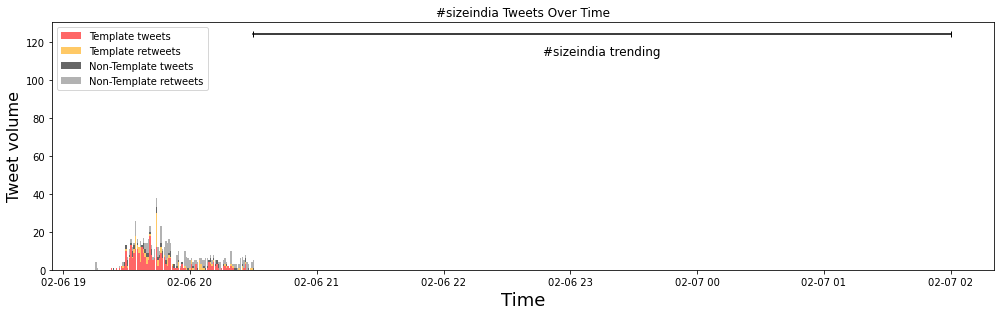

Hashtag:  savekeralafromcommunists
Total # of collected tweets:  5286
First tweet: 
@cpimspeak lady cadres getting continuously molested and raped by male comrades in kerala. but denied rights to speak up to police or court. #savekeralafromcommunists #savegirlsfromcommunists https://t.co/c9dunudjkc - arunkgindian  on  2018-12-07 05:11:12
Number of tweets before first template tweet: 3
First template tweet: 
bomb bursts in hand while trying to hurl at a bjp workers house in pallichal. #sfi state committee member akash krishna lost his palm in the process. #savekeralafromcommunists #savesabarimala - purusmpr  on  2019-01-07 03:50:05
hashtag trended from 2019-01-07 06:00:00 to 2019-01-08 03:00:00


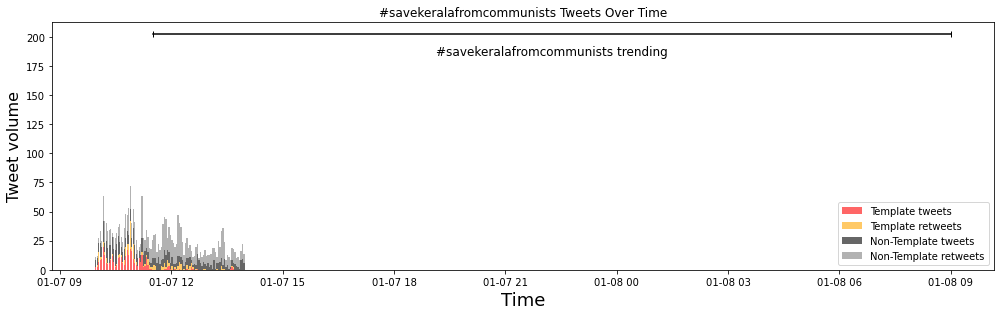

Hashtag:  copypastencp
Total # of collected tweets:  848
First tweet: 
scam is the only thing ncp excels at may it be irrigation scam or maharashtra sadan scam. #copypastencp - trustnamo  on  2018-09-07 11:13:43
Number of tweets before first template tweet: 0
First template tweet: 
scam is the only thing ncp excels at may it be irrigation scam or maharashtra sadan scam. #copypastencp - trustnamo  on  2018-09-07 11:13:43
hashtag trended from 2018-09-07 13:00:00 to 2018-09-07 14:00:00


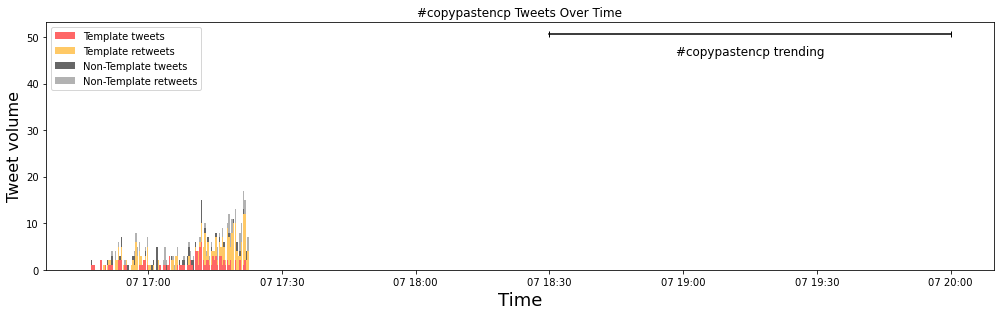

Hashtag:  bjp4betterandhra
Total # of collected tweets:  7000
First tweet: 
@amitshah ji coming to andhra tomorrow. @narendramodi govt has done lot of work for andhra. bjp is committed to further develop andhra #bjp4betterandhra https://t.co/xxdankfajo - yoursdharm  on  2019-02-03 18:48:52
Number of tweets before first template tweet: 20
First template tweet: 
under faster adoption manufacturing of hybrid &amp; electric vehicle, modi govt is offering incentives on electric &amp; hybrid vehicles of up to rs 29,000 for bikes &amp; rs 1.38 lakh for cars #bjp4betterandhra - mancikati  on  2019-02-04 04:58:28
hashtag trended from 2019-02-04 06:00:00 to 2019-02-05 02:00:00


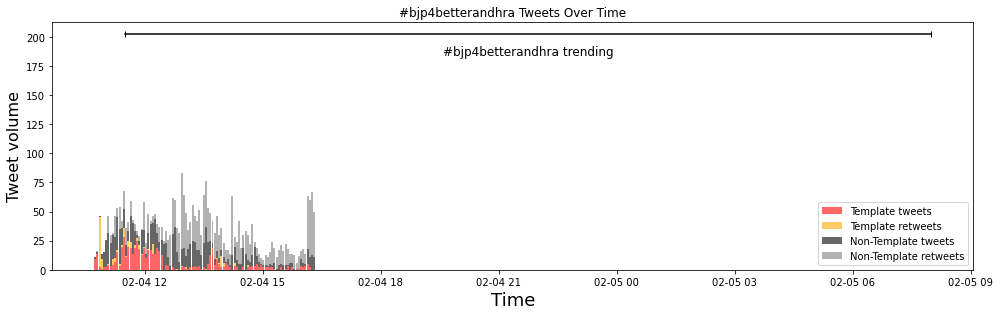

Hashtag:  jaihindkisena
Total # of collected tweets:  5792
First tweet: 
rt @hindurashtrvadi: jab hum baithe the gharo mein, woh jhel rahe the goli #jaihindkisena @aswanidatt @patriot_hindu @chetan_bhagat @iamahumanist2 - _prateekbajpai  on  2013-08-24 14:39:01
Number of tweets before first template tweet: 1051
First template tweet: 
army, navy, and air forces, each of the three indian armed forces have several tales of bravery and victory associated with them which makes us so very proud. salute to them. #jaihindkisena - mpdrbholasingh  on  2018-12-05 03:43:03
hashtag trended from 2018-12-05 05:00:00 to 2018-12-06 03:00:00


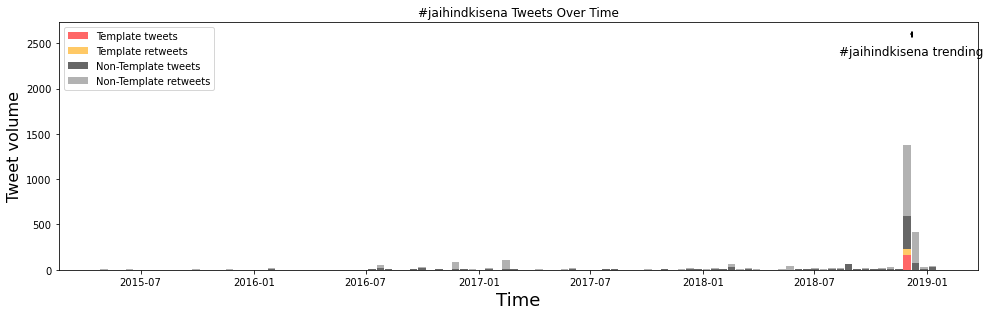

Hashtag:  congressinsultsairforce
Total # of collected tweets:  565
First tweet: 
congress leader veerappa moily calls iaf chief bs dhanoa a 'liar' over rafale deal #congressinsultsairforce https://t.co/tqlzyzozzz - isharmapuneet  on  2018-12-20 13:36:13
Number of tweets before first template tweet: 3
First template tweet: 
do all the politics you want , @rahulgandhi , but at least spare our armed forces . you have no respect for them , that is why you keep on insulting them . have some shame . apologise . #congressinsultsairforce - iam_manojgoenka  on  2018-12-20 13:40:00
hashtag trended from 2018-12-20 14:00:00 to 2018-12-20 20:00:00


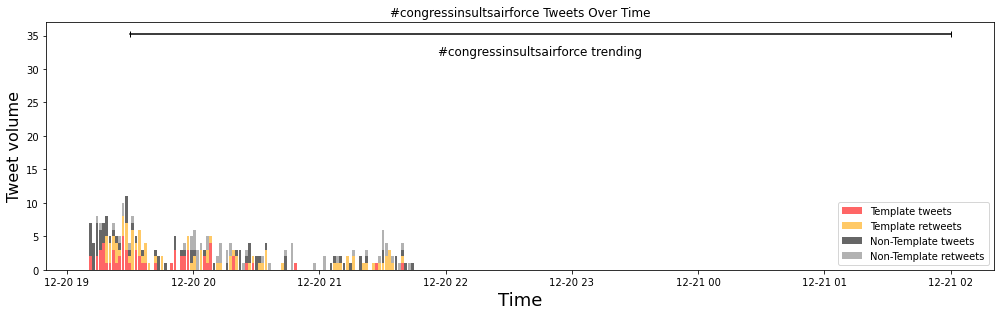

Hashtag:  armedforcesweek2018
Total # of collected tweets:  6531
First tweet: 
stay up to date on all things #armedforcesweek2018 at apgmwr! check out the indemand e-newsletter: https://t.co/7sww94usrl https://t.co/jaef18gwza - apgmwr  on  2018-05-14 16:36:35
Number of tweets before first template tweet: 18
First template tweet: 
many brave heroes from the armed forces have laid down their lives in the service of the country, ongoing counter-insurgency operations have also left many broken homes without a breadwinner. it's our responsibility to show our gratitude to those families #armedforcesweek2018 https://t.co/pqf6cillgj - prashantmakanur  on  2018-12-01 05:14:52
hashtag trended from 2018-12-01 06:00:00 to 2018-12-02 23:00:00


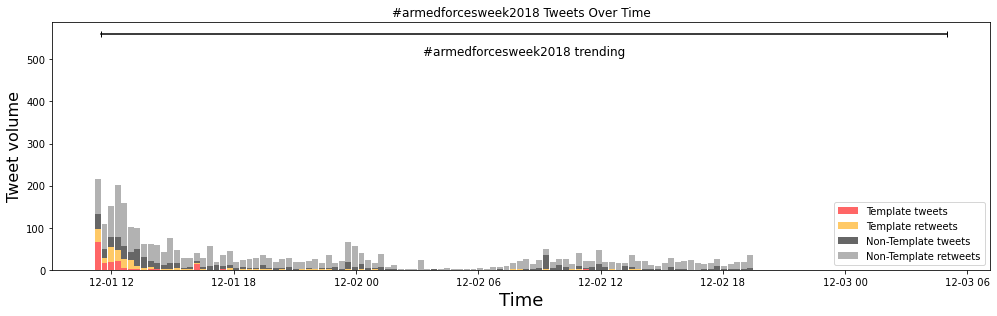

Hashtag:  bogibeelbridge
Total # of collected tweets:  34026
First tweet: 
#bogibeelbridge in assam http://t.co/mz5te8csxd - net_marketting  on  2014-01-24 06:00:01
Number of tweets before first template tweet: 4196
First template tweet: 
today is a historic day for the north-east, as pm @narendramodi is set to inaugurate the iconic bogibeel bridge over the brahmaputra river. #bogibeelbridge @bjp4haryana @subhashbrala https://t.co/stji8jqcvz - gurugram4bjp  on  2018-12-25 04:49:07
hashtag never trended
failed to plot trending data


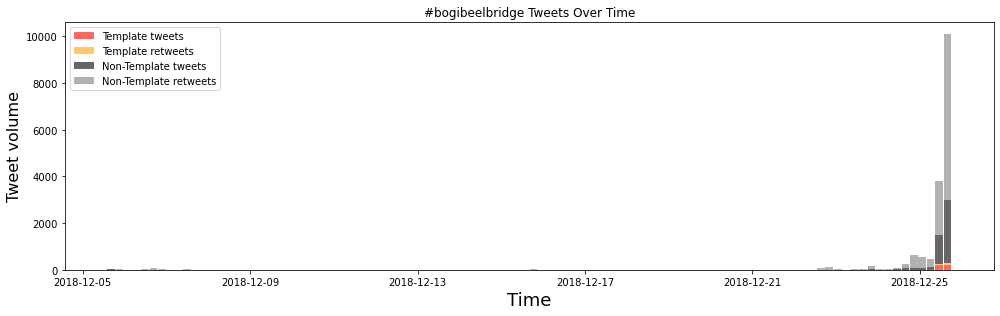

Hashtag:  newindia4narishakti
Total # of collected tweets:  45609
First tweet: 
आंतरराष्ट्रीय महिला दिवस के उपलक्ष्य में महिला मोर्चा की तरफ से हो रहा प्रबुद्ध सम्मेलन अभियान का प्रारम्भ मैनें आज श्याम को महाराष्ट्र के मुम्ब्रा मे किया।मुस्लिम बहनों की बडी उपस्थिति में हुई कार्यक्रम मे सिर्फ 'सब का साथ,सब का विकास' का नारा गूंज रहा था। #newindia4narishakti https://t.co/3zcc81oqsw - vijayarahatkar  on  2019-03-07 15:35:24
Number of tweets before first template tweet: 65
First template tweet: 
#newindia4narishakti :: women led development https://t.co/kjvrhfq8ij - buzzindelhi  on  2019-03-08 01:36:36
hashtag trended from 2019-03-08 02:00:00 to 2019-03-10 03:00:00


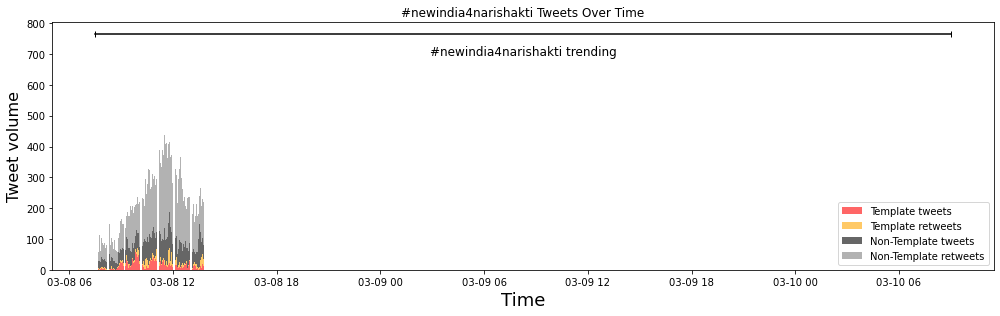

Hashtag:  congressdefencescams
Total # of collected tweets:  1633
First tweet: 
submarines , guns , jeeps , helicopters and more – the scope of congress’s corruption in defence procurement encapsulates the sky , earth and water ! #congressdefencescams - ani30oct  on  2018-10-17 04:03:00
Number of tweets before first template tweet: 0
First template tweet: 
submarines , guns , jeeps , helicopters and more – the scope of congress’s corruption in defence procurement encapsulates the sky , earth and water ! #congressdefencescams - ani30oct  on  2018-10-17 04:03:00
hashtag trended from 2018-10-17 05:00:00 to 2018-10-17 21:00:00


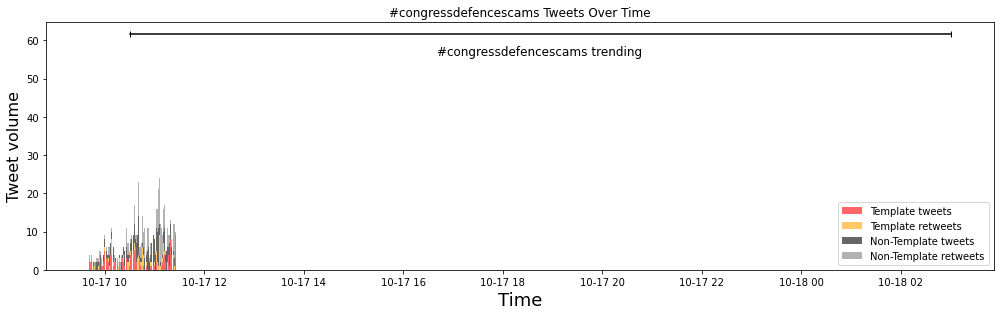

Hashtag:  hooghly_chalo
Total # of collected tweets:  795
First tweet: 
গনতন্ত্র হত্যার প্রতিবাদে, দুর্নীতিমুক্ত স্বচ্ছ পশ্চিমবঙ্গ গড়ার লক্ষে বিজেপি হুগলী জেলার ডাকে হুগলী চলো।প্রধান বক্তা - মাননীয় স্বরাষ্ট্র মন্ত্রী @rajnathsingh #hooghly_chalo https://t.co/wtojl1021i - bjphooghly  on  2019-01-28 13:27:42
Number of tweets before first template tweet: 403
First template tweet: 
“we do not need acts, but actions.” pm narendra modi has shown over the past 5 years that he stands by his words. more work has been done in india under his guidance than 60 years of upa rule. #hooghly_chalo https://t.co/dhmdpeuvqg - niharmondal16  on  2019-02-03 08:22:17
hashtag never trended
failed to plot trending data


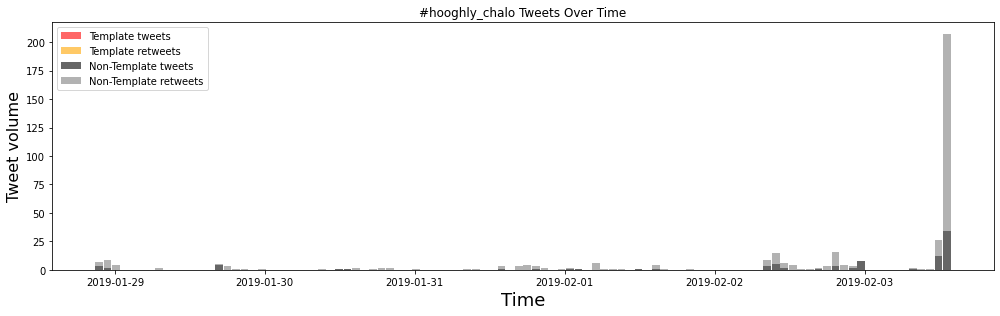

Hashtag:  pminprayagraj
Total # of collected tweets:  13927
First tweet: 
प्रयागराज की पावन धरती से प्रधानमंत्री जी देंगे प्रयागराजवासियों को करोड़ों की सौगात । #pminprayagraj - alok555bjp  on  2018-12-14 13:54:20
Number of tweets before first template tweet: 678
First template tweet: 
कुंभ के दौरान भाजपा सरकार बनाएगी प्री-फैब्रीकेटेड हॉस्पिटल, पहली बार 100 बेड के हॉस्पिटल का होगा निर्माण, ओपीडी में एक साथ दो हजार मरीजों को देख सकेंगे डॉक्टर #pminprayagraj @sidharthnsingh @kpmaurya1 @amitmalviya @piyushgoyal https:// twitter.com/nandiguptabjp/ status/1074196731238252544 … - pandeymanishmzp  on  2018-12-16 07:05:00
hashtag trended from 2018-12-16 11:00:00 to 2018-12-17 02:00:00


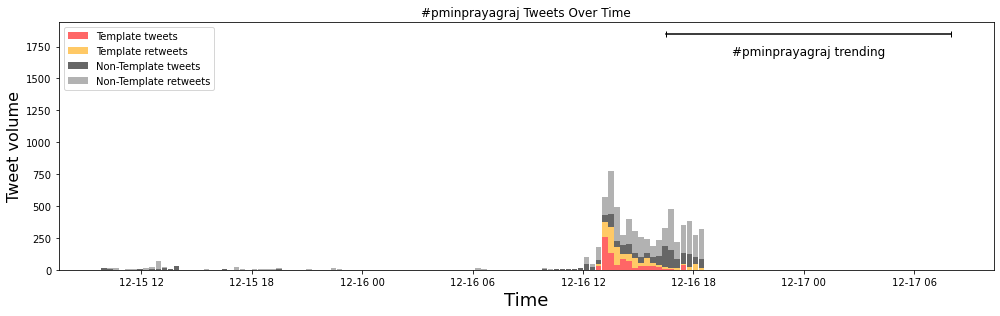

Hashtag:  goodgovernanceday
Total # of collected tweets:  38278
First tweet: 
@ianuragthakur sir pls rt #bjp delhi organizing many events on dec 25, the birth date of #abvajpayee #goodgovernanceday http://t.co/3ogzuhyd - gaurav_diwakar  on  2012-12-21 09:37:53
Number of tweets before first template tweet: 31881
First template tweet: 
good governance is when lives of people become easier and the country rapidly moves on the path of development . with reforms in the defence sector , we can say that india is finally witnessing good governance . @nsitharaman #goodgovernanceday - imaheshgupta  on  2018-12-25 07:54:00
hashtag never trended
failed to plot trending data


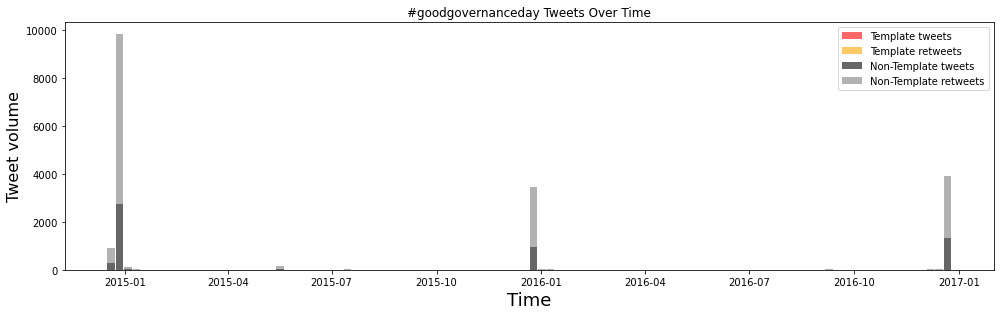

Hashtag:  amethikididismritiirani
Total # of collected tweets:  2390
First tweet: 
फसल की पैदावार को बढ़ाने व मिट्टी की गुणवत्ता परीक्षण आदि की समस्या को सुलझाने हेतु भाजपा सरकार ने दी सौगात , अमेठी में मृदा परीक्षण प्रयोगशाला का जल्द निर्माण किया जाएगा . #amethikididismritiirani - ani30oct  on  2019-01-23 08:29:00
Number of tweets before first template tweet: 0
First template tweet: 
फसल की पैदावार को बढ़ाने व मिट्टी की गुणवत्ता परीक्षण आदि की समस्या को सुलझाने हेतु भाजपा सरकार ने दी सौगात , अमेठी में मृदा परीक्षण प्रयोगशाला का जल्द निर्माण किया जाएगा . #amethikididismritiirani - ani30oct  on  2019-01-23 08:29:00
hashtag trended from 2019-01-23 14:00:00 to 2019-01-23 16:00:00


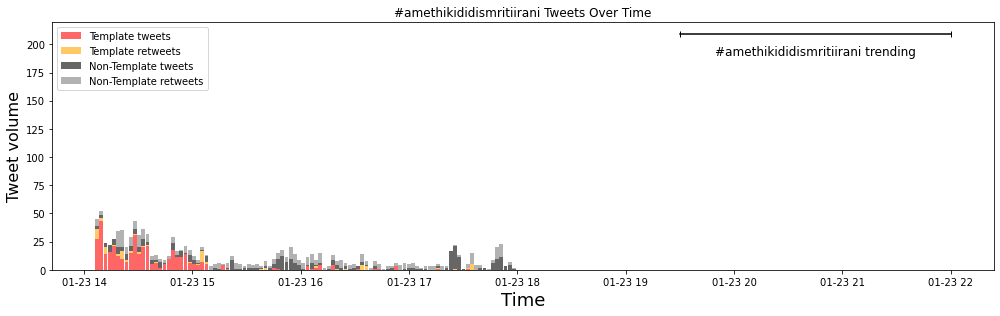

Hashtag:  namowithtraders
Total # of collected tweets:  5904
First tweet: 
sankalp patra of 2014 loksabha elections had raised hope and now in 2019 this has become a confidence now.  #namowithtraders - modioncemore  on  2019-04-19 10:13:38
Number of tweets before first template tweet: 121
First template tweet: 
support pours in from all quarters of the trading community in delhi for today’s vyapari mahasammelan to be addressed by pm @narendramodi. #namowithtraders #vijaygoel https://t.co/jlvacvc4pp - cricrahul1  on  2019-04-19 10:33:18
hashtag trended from 2019-04-19 11:00:00 to 2019-04-19 17:00:00


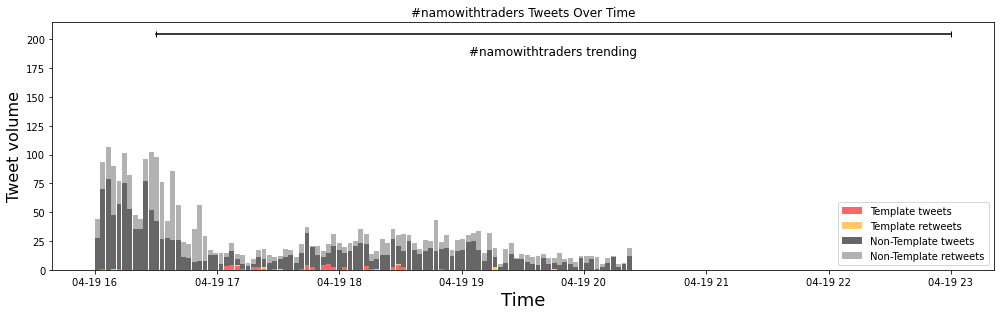

Hashtag:  corruptcongressfearsdemo
Total # of collected tweets:  13352
First tweet: 
demonetisation , the historic decision which no government could ever take to give a blow to corruption & black money was taken by pm modi . #corruptcongressfearsdemo @tajinderbagga - ibrijmohanji  on  2018-11-08 03:57:00
Number of tweets before first template tweet: 0
First template tweet: 
demonetisation , the historic decision which no government could ever take to give a blow to corruption & black money was taken by pm modi . #corruptcongressfearsdemo @tajinderbagga - ibrijmohanji  on  2018-11-08 03:57:00
hashtag trended from 2018-11-08 17:00:00 to 2018-11-09 05:00:00


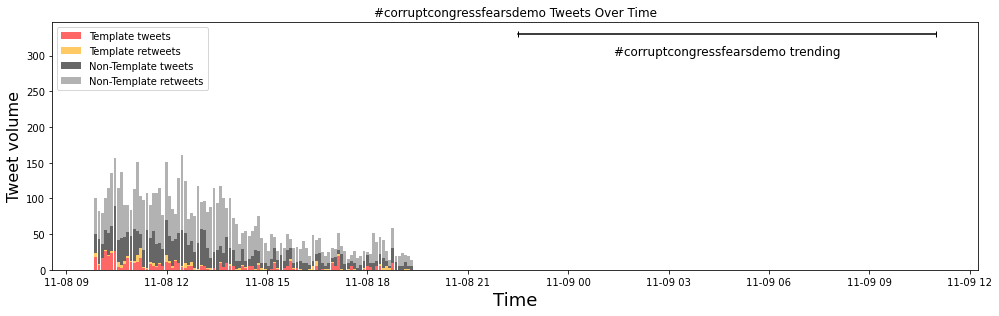

Hashtag:  artisanspeak
Total # of collected tweets:  1276
First tweet: 
hey guys, make sure to take a look at the beautiful bags from lamu at http://t.co/oxmy9qe7jh #artisanspeak #lamu http://t.co/dgeftithdc - willingfoot  on  2014-08-05 17:08:08
Number of tweets before first template tweet: 134
First template tweet: 
अलग अलग क्षेत्रों में विभिन्न प्रकार के और विशेष गुणवत्ता वाले वस्त्रों के निर्माण और संरक्षण को बढ़ावा देने के लिए ‘ artisan speak ’ कार्यक्रम का आयोजन किया जा रहा है . #artisanspeak pic.twitter.com/vqvfkhgvdq - theshobhitazad  on  2019-01-28 12:51:00
hashtag trended from 2019-01-28 14:00:00 to 2019-01-28 17:00:00


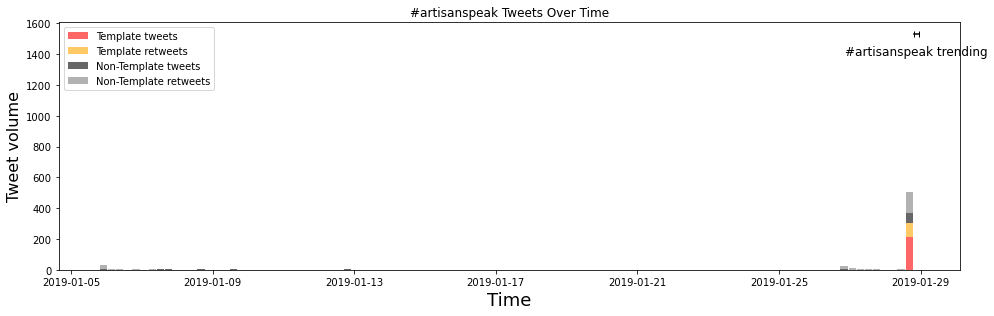

Hashtag:  indiabolemodidobara
Total # of collected tweets:  60123
First tweet: 
#indiabolemodidobara https://t.co/arvarliney - shah_ratnaa  on  2019-04-17 05:18:18
Number of tweets before first template tweet: 709
First template tweet: 
फिर एक बार मोदी सरकार#indiabolemodidobara - niranja86824731  on  2019-04-17 06:12:00
hashtag trended from 2019-04-17 06:00:00 to 2019-04-19 03:00:00


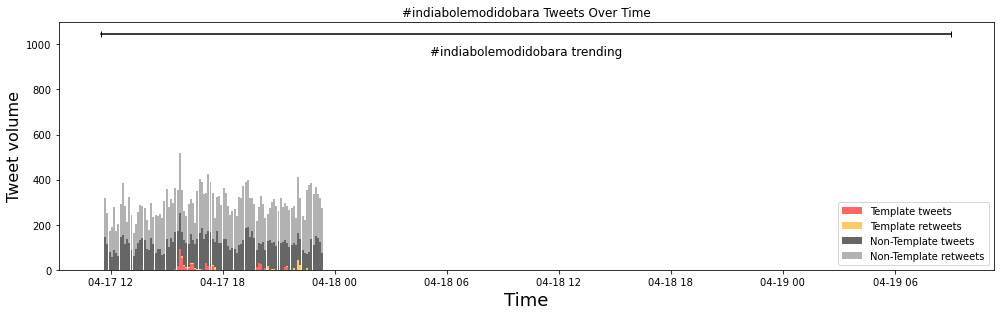

Hashtag:  urban_नक्सली_केजरीवाल
Total # of collected tweets:  8331
First tweet: 
शुरुआत आपने की थी और एक अग्रवाल होने के नाते कह रहा हूँ आप हमारे समाज के नाम पर कलंक हो। अग्रवाल हमेशा से देश प्रेमी होते है आप जैसे मक्कार नहीं जो पाकिस्तान का हीरो हो और अपने देश पर सवाल उठाए। कभी कहना नहीं चाहता था लेकिन थू है आपकी राजनीति पर। #urban_नक्सली_केजरीवाल https://t.co/jr78rljq5u - punitspeaks  on  2019-03-13 14:42:22
Number of tweets before first template tweet: 2
First template tweet: 
आम आदमी पार्टी ने चुनाव से पहले ही हार स्वीकार कर ली है और इस हार से बचने के लिए बहाने ढूंढ रही है #urban_नक्सली_केजरीवाल #लगभग_सूजी_है - cksundrajbjp  on  2019-03-13 15:02:02
hashtag trended from 2019-03-13 16:00:00 to 2019-03-13 23:00:00


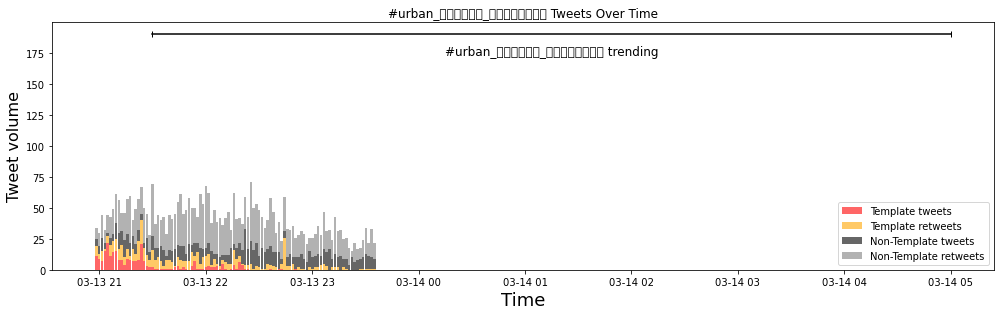

Hashtag:  zamanatke1000din
Total # of collected tweets:  2925
First tweet: 
mother-son duo, rahul and sonia gandhi are out on bail. the court had directed them to furnish personal bonds of rs 50,000 each and one surety. #zamanatke1000din - sikanjiwala  on  2018-09-14 09:10:06
Number of tweets before first template tweet: 0
First template tweet: 
mother-son duo, rahul and sonia gandhi are out on bail. the court had directed them to furnish personal bonds of rs 50,000 each and one surety. #zamanatke1000din - sikanjiwala  on  2018-09-14 09:10:06
hashtag trended from 2018-09-14 10:00:00 to 2018-09-14 13:00:00


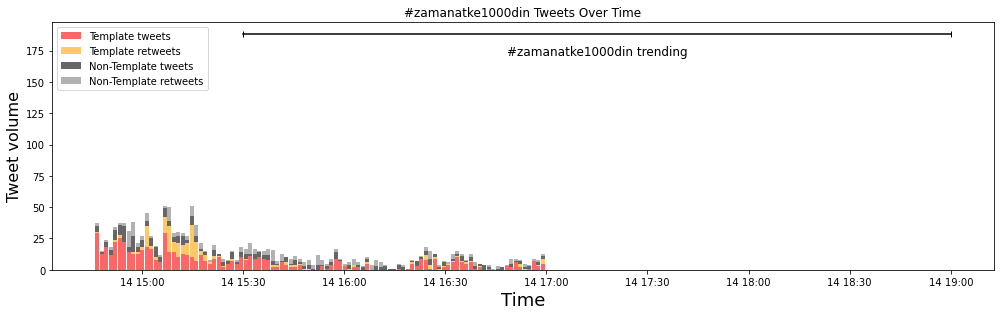

Hashtag:  yuvakemannkibaat
Total # of collected tweets:  3143
First tweet: 
युवाओं के सपनों को साकार किया, शिक्षा से लेकर नौकरी और व्यापार का आधार दिया, योगीराज में प्रदेश के युवाओं को मिली उड़ान, यही है विकास की असली पहचान। #yuvakemannkibaat - up_odop  on  2019-02-22 06:38:42
Number of tweets before first template tweet: 0
First template tweet: 
युवाओं के सपनों को साकार किया, शिक्षा से लेकर नौकरी और व्यापार का आधार दिया, योगीराज में प्रदेश के युवाओं को मिली उड़ान, यही है विकास की असली पहचान। #yuvakemannkibaat - up_odop  on  2019-02-22 06:38:42
hashtag trended from 2019-02-22 09:00:00 to 2019-02-22 11:00:00


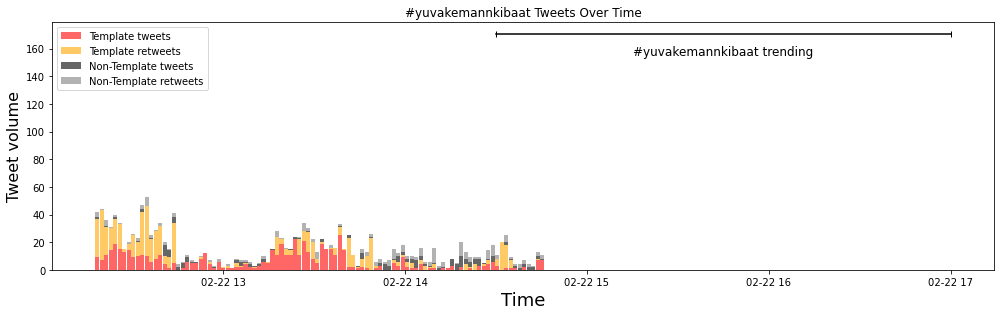

Hashtag:  congressframedamitshah
Total # of collected tweets:  1582
First tweet: 
#congressframedamitshah special cbi court has made observation that cbi wanted to implicate amit shah in sohrabbudi… https://t.co/sttdpgncfl - indiantweeter  on  2019-01-01 10:15:02
Number of tweets before first template tweet: 1
First template tweet: 
the special cbi judge , mumbai , who deals with cbi cases has acquitted all accused in sohrabudin case . congress party has misued the cbi for his political gains . #congressframedamitshah pic.twitter.com/zlzobbjwmo - iam_manojgoenka  on  2019-01-01 10:16:00
hashtag never trended
failed to plot trending data


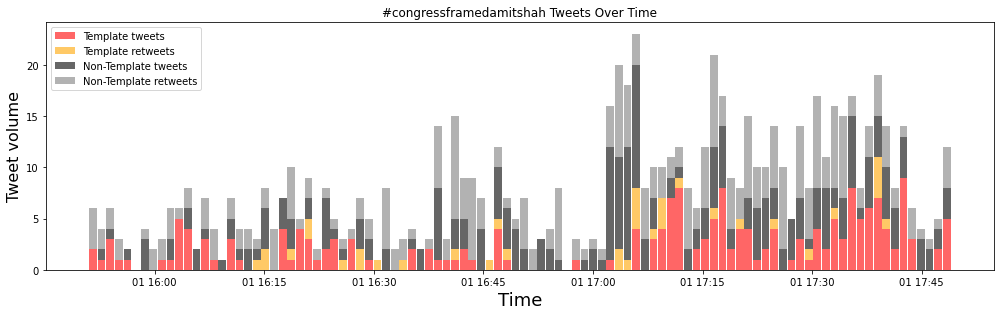

Hashtag:  mainbhichowkidar
Total # of collected tweets:  887272
First tweet: 
@thesharad @bhavsarhardiik #mainbhichowkidar - suresh18695890  on  2019-02-09 09:43:02
Number of tweets before first template tweet: 11875
First template tweet: 
हाँ, मैं भी चौकीदार हूँ... #mainbhichowkidar @narendramodi https://t.co/32votf2wzz - jatbarad  on  2019-03-16 04:43:50
hashtag trended from 2019-03-16 04:00:00 to 2019-04-01 02:00:00


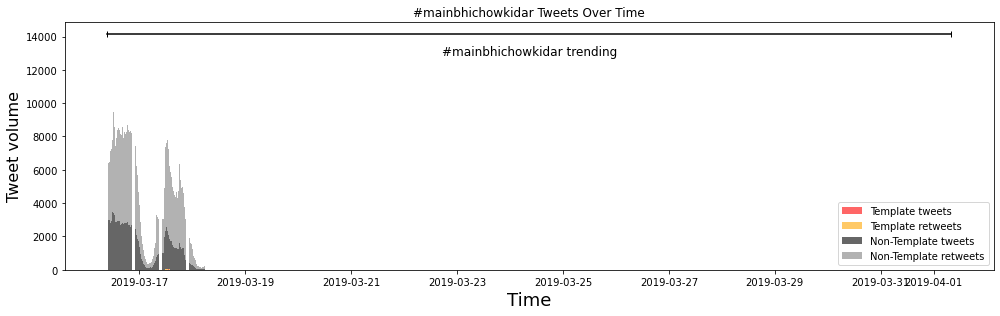

Hashtag:  iafbacksrafale
Total # of collected tweets:  870
First tweet: 
#iafbacksrafale | rafale a beautiful aircraft: sb deo, air vice-chief, on rafale controversy watch live here - https://www. republicworld.com/livetv - republic  on  2018-09-05 05:43:00
Number of tweets before first template tweet: 89
First template tweet: 
the indian rafale comes with about 15 modifications which even the french air force doesn't have. the biggest strength of the aircraft is that it can be used for delivery of strategic weapons too. https://t.co/zuyfkaekko #iafbacksrafale - rajveersinghup  on  2018-09-05 11:46:02
hashtag trended from 2018-09-05 13:00:00 to 2018-09-06 03:00:00


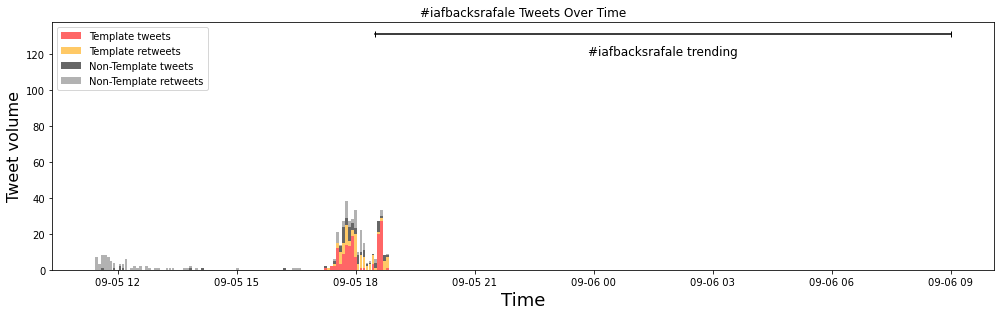

Hashtag:  भारत_माता_की_जय
Total # of collected tweets:  54361
First tweet: 
rt @kmlshdbh: 🚩#वंदेमातरम् 🚩#भारत_माता_की_जय @yogen198 @deepakkatyayan @munnosoni @hardikbhavsar10 @sanjay_vis @theharvendra http://t.co/y5zagyk9d8 - munnosoni  on  2015-05-28 21:01:13
Number of tweets before first template tweet: 10102
First template tweet: 
#भारत_माता_की_जय "भारत माता की जय" भारतीय जनता पार्टी के कार्यकर्ता बोलते हैं इसलिए कांग्रेसी कार्यकर्ता कांग्रेस की माता सोनिया माता की जय बोलेगें @divyaspandana @ankitlal @mamataofficial @surendrasinhk @shashank8899528 @sk7925487 @hirendrakaushik - devender162  on  2018-11-20 13:27:38
hashtag trended from 2018-11-20 15:00:00 to 2019-01-26 03:00:00


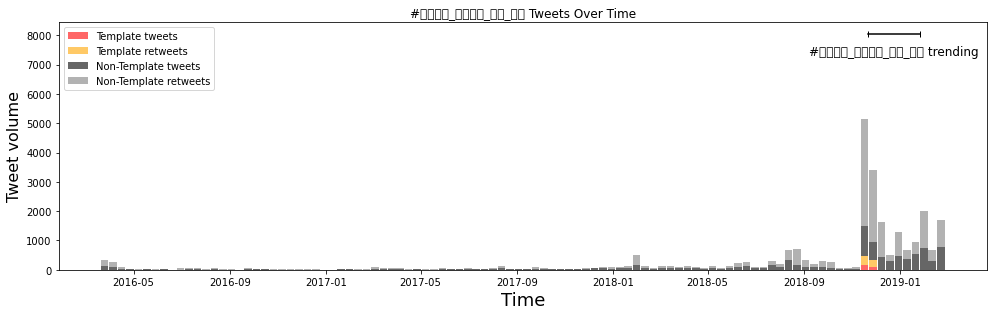

Hashtag:  namothon
Total # of collected tweets:  6965
First tweet: 
namo bharath celebrates national youth day by conducting "namothon- run for narendra" on the occasion of swami vivekananda's birth anniversary" ● date: saturday, jan 12th, 2019 #nationalyouthday #run4narendra #namothon #namobharath https://t.co/pqzublcoru - lakshmishaks  on  2018-12-23 15:35:39
Number of tweets before first template tweet: 47
First template tweet: 
ಏಳಿ ಎದ್ದೇಳಿ ಗುರಿ ಮುಟ್ಟುವ ತನಕ ನಿಲ್ಲದಿರಿ. ಆ ನರೇಂದ್ರನಿಂದ ನವಯುಗದ ನರೇಂದ್ರನ ವರೆಗೂ . ದೇಶ ಕಟ್ಟಲು ಸಾಗುತ್ತಿದೆ @namo_bharath ತಂಡ ಬನ್ನಿ ಕೈ ಜೋಡಿಸಿ . ಸ್ವಾಮಿ ವಿವೇಕಾನಂದರ ಜನ್ಮಜಯಂತಿಯ ಅಂಗವಾಗಿ ಹಮ್ಮಿಕೊಳ್ಳಲಾದ #namothon ಗೆ ಕೈ ಜೋಡಿಸಿ . ನೋಂದಣಿ ಮಾಡಿ ಕೊಳ್ಳಲ್ಲು ಈ ಕೆಳಗಿನ ಲಿಂಕ್ ಬಳಸಿ. http://www. namobharath.in/namothon-blr/ pic.twitter.com/xzktndkli1 - shivuvgowda  on  2019-01-03 18:10:00
hashtag trended from 2019-01-07 14:00:00 to 2019-01-30 17:00:00


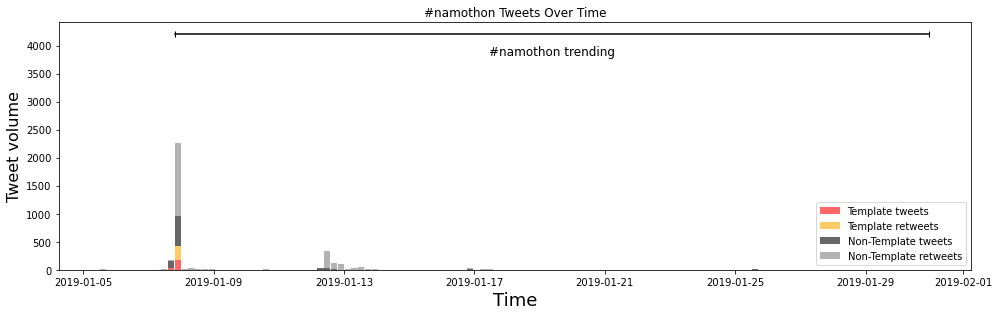

Hashtag:  लक्ष्य_हमारा_मोदी_दोबारा
Total # of collected tweets:  79234
First tweet: 
#लक्ष्य_हमारा_मोदी_दोबारा #namoagain2019 . @vidyathakurbjp @deepakthakur_1 https://t.co/iazn4nceo8 - navinmah  on  2019-01-12 18:36:51
Number of tweets before first template tweet: 226
First template tweet: 
the @narendramodi govt. has introduced many different major reforms in the last 4 years to promote #easeofdoingbusiness. we have attained ranking of 77 vis-a-vis 142 in eodb @bjym @poonam_mahajan #लक्ष्य_हमारा_मोदी_दोबारा https://t.co/0nl0qzdqar - bikramari  on  2019-01-22 03:23:59
hashtag trended from 2019-01-22 04:00:00 to 2019-01-23 03:00:00


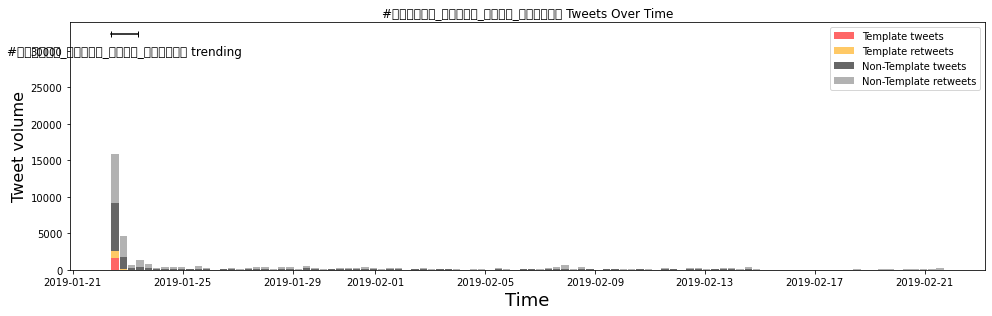

Hashtag:  congressagainstnationalsecurity
Total # of collected tweets:  702
First tweet: 
insiders in the defence industry say other producers and suppliers would also have been reluctant to accept the global tender route , especially if hal conditionality was retained #congressagainstnationalsecurity @nsitharaman https://www. outlookindia.com/magazine/story /in-a-jam-solution/294077 … - ipuneetsharma  on  2018-09-20 14:20:00
Number of tweets before first template tweet: 0
First template tweet: 
insiders in the defence industry say other producers and suppliers would also have been reluctant to accept the global tender route , especially if hal conditionality was retained #congressagainstnationalsecurity @nsitharaman https://www. outlookindia.com/magazine/story /in-a-jam-solution/294077 … - ipuneetsharma  on  2018-09-20 14:20:00
hashtag never trended
failed to plot trending data


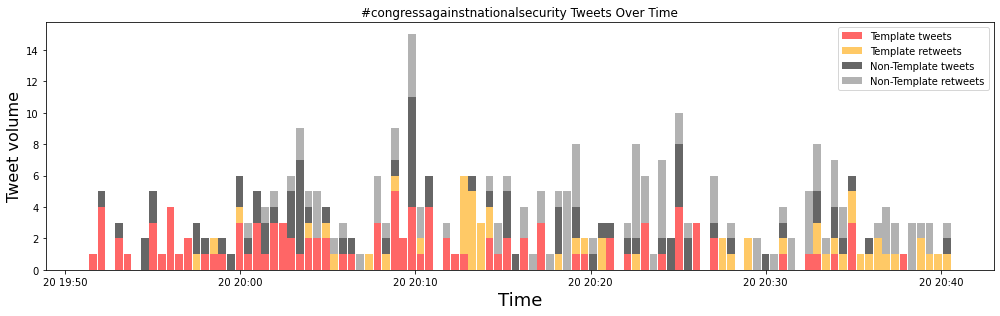

Hashtag:  आदर्शघोटाला_संघर्ष_यात्रा
Total # of collected tweets:  524
First tweet: 
congress has failed in all its attempts to defame this decisive hardworking government but yet the drama continue #आदर्शघोटाला_संघर्ष_यात्रा - ani30oct  on  2018-09-06 07:28:00
Number of tweets before first template tweet: 0
First template tweet: 
congress has failed in all its attempts to defame this decisive hardworking government but yet the drama continue #आदर्शघोटाला_संघर्ष_यात्रा - ani30oct  on  2018-09-06 07:28:00
hashtag trended from 2018-09-06 08:00:00 to 2018-09-06 11:00:00


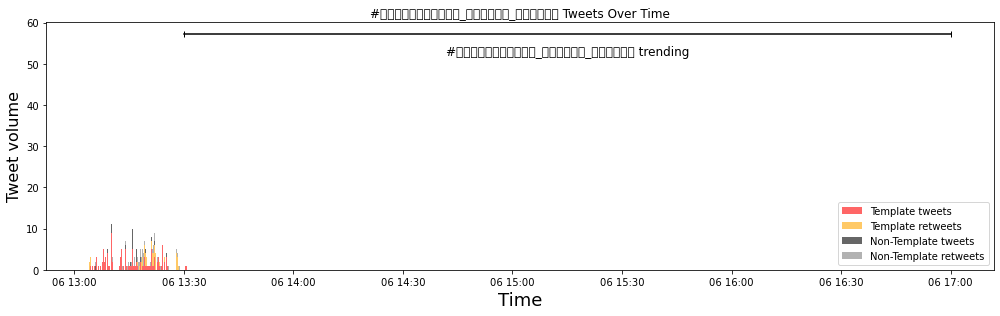

Hashtag:  pminraebareli
Total # of collected tweets:  11901
First tweet: 
प्रधानमंत्री श्री @narendramodi रविवार को रायबरेली जाएंगे, 1100 करोड़ की परियोजनाओं का लोकार्पण तथा शिलान्यास करेंगे #namoagain #pminprayagraj #pminraebareli https://www. hindustantimes.com/india-news/nar endra-modi-to-visit-rae-bareli-on-sunday-kick-off-projects-worth-rs-1-100-crore/story-ovn0llcgjj7hgw19l9aden.html … via namo app pic.twitter.com/ijiu3unimp - sanjay_mishra91  on  2018-12-15 07:46:00
Number of tweets before first template tweet: 1
First template tweet: 
रायबरेली में प्रधानमंत्री जी द्वारा 1100 करोड़ रुपये की योजनाओं का लोकार्पण व शिलान्यास #pminraebareli - aashusai11  on  2018-12-16 02:24:31
hashtag trended from 2018-12-16 04:00:00 to 2018-12-17 04:00:00


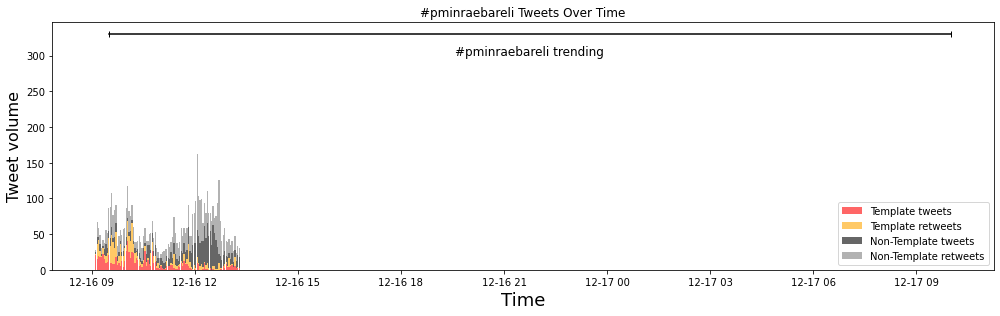

Hashtag:  bjpforsamridhkisan
Total # of collected tweets:  7503
First tweet: 
2017-18 में रबी चावल के कुल उत्पादन का अनुमान रिकॉर्ड 15.41 मिलियन टन है । #bjpforsamridhkisan pic.twitter.com/qrxxamslne - singhm4newindia  on  2019-02-23 08:37:00
Number of tweets before first template tweet: 0
First template tweet: 
2017-18 में रबी चावल के कुल उत्पादन का अनुमान रिकॉर्ड 15.41 मिलियन टन है । #bjpforsamridhkisan pic.twitter.com/qrxxamslne - singhm4newindia  on  2019-02-23 08:37:00
hashtag trended from 2019-02-23 10:00:00 to 2019-02-23 17:00:00


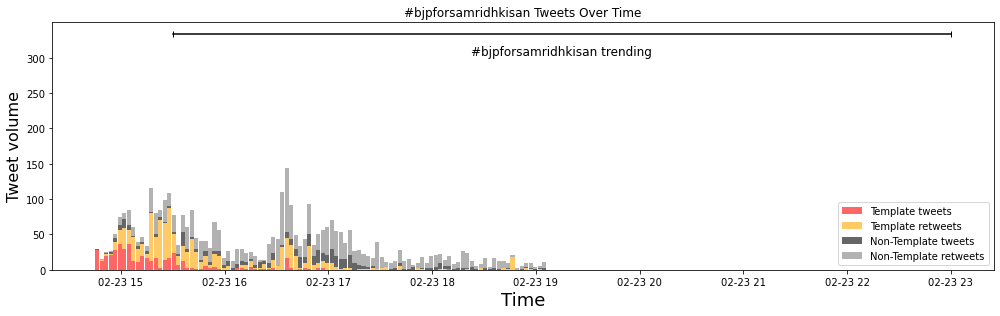

Hashtag:  facebookboomed
Total # of collected tweets:  1764
First tweet: 
#kelsey #facebookboomed #shesdumb http://t.co/aflckfqkrs - jah308  on  2013-08-06 18:30:53
Number of tweets before first template tweet: 1
First template tweet: 
they have targeted the page and unnecessarily flagging posts as fake news when they are not . hey @boomlive_in serious misuse of powers granted by @facebook to these leftist agencies ! #facebookboomed - ani30oct  on  2019-01-29 12:26:00
hashtag trended from 2019-01-29 13:00:00 to 2019-01-29 18:00:00


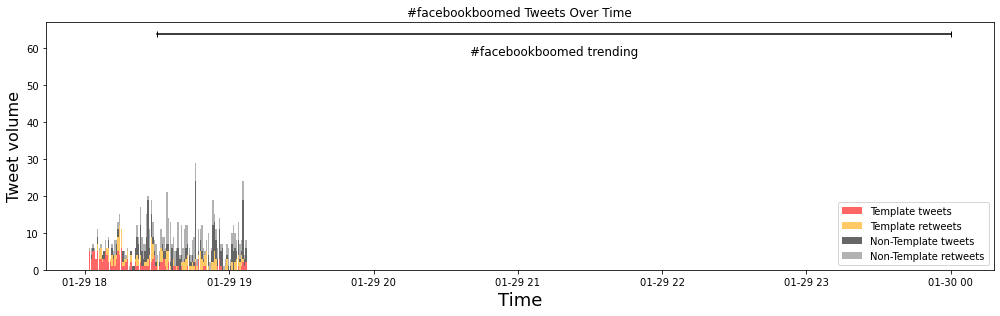

Hashtag:  badalrahihaikashi
Total # of collected tweets:  16947
First tweet: 
rt @bjp4india: प्रधानमंत्री श्री @narendramodi आज वाराणसी में विभिन्न विकास परियोजनाओं का लोकार्पण व शिलान्यास करेंगे। #badalrahihaikashi… - mayankjainbjp  on  2019-02-19 02:30:03
Number of tweets before first template tweet: 75
First template tweet: 
#badalrahihaikashi मिशन इंद्रधनुष के तहत देश के हर बच्चे तक पहुंचने का लक्ष्य लिया गया। अब तक इस मिशन के तहत देश में लगभग 3 करोड़ 40 लाख बच्चों और करीब 90 लाख गर्भवती महिलाओं का टीकाकरण करवाया जा चुका है: पीएम श्री @narendramodi @bjp4india @amitshah @bjp4damandiu - majidladhani1  on  2019-02-19 03:39:01
hashtag trended from 2019-02-19 05:00:00 to 2019-02-20 03:00:00


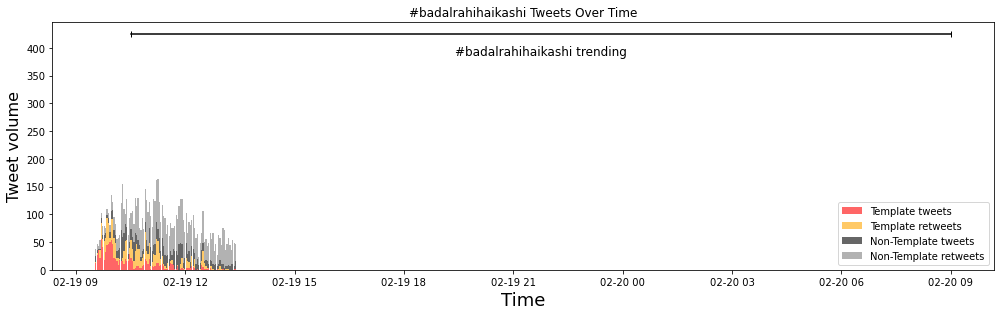

Hashtag:  lawlessodisha
Total # of collected tweets:  1486
First tweet: 
#lawlessodisha @naveen_odisha doesn't care about odia people. his political game has ruined the state and people are facing emergency like situation. - dabu_abinash  on  2018-11-13 18:13:24
Number of tweets before first template tweet: 0
First template tweet: 
#lawlessodisha @naveen_odisha doesn't care about odia people. his political game has ruined the state and people are facing emergency like situation. - dabu_abinash  on  2018-11-13 18:13:24
hashtag trended from 2018-11-14 06:00:00 to 2018-11-14 20:00:00


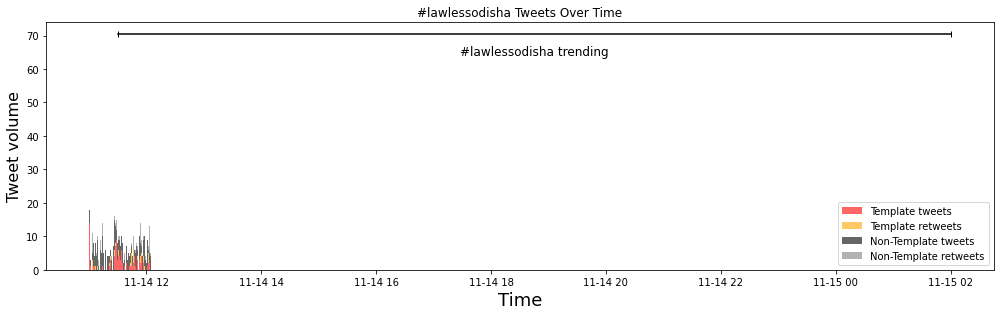

Hashtag:  rafailgandhi
Total # of collected tweets:  4269
First tweet: 
@divyaspandana dumb and corrupt people who already made many scams like bofors,cwg,2g,coalgate,etc are talking about rafael just prove a fail politician pappu who made gold from potato #rafailgandhi 😜😂 - kuposhit_balak  on  2018-08-14 07:38:18
Number of tweets before first template tweet: 40
First template tweet: 
no objection to rafale deal: supreme court dismisses pils. https://t.co/powtorlosl #rafailgandhi - jasmatta  on  2018-12-15 05:00:08
hashtag trended from 2018-12-15 06:00:00 to 2018-12-15 11:00:00


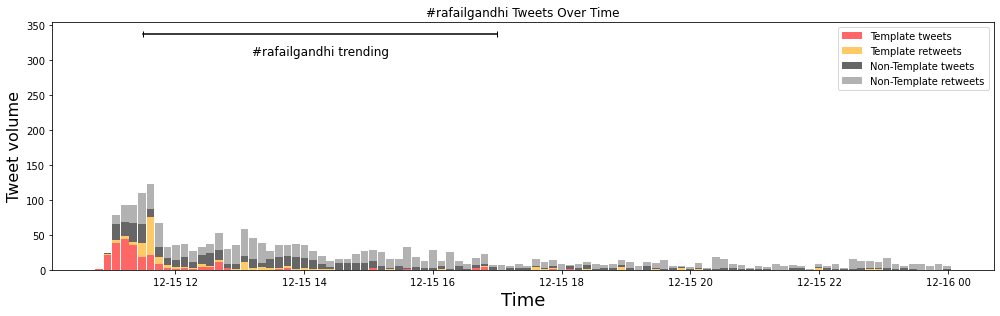

Hashtag:  rahulkidefencedeals
Total # of collected tweets:  3882
First tweet: 
these papers relate to the ed search conducted on one h l pahwa on 3rd may 2017 &amp; 4th may 2017. the land dealings are betwn rahul gandhi and h l pahwa who was funded by one c c thampi, who has close financial links to sanjay bhandari. https://t.co/3fw4vidbex #rahulkidefencedeals - zarrnaj  on  2019-03-13 03:57:47
Number of tweets before first template tweet: 1
First template tweet: 
@ialpanarai @sandeepfromvns @narendramodi @drharshvardhan sanjay bhandari is an arms dealer and close friend of robert vadra. he had received kickbacks in defence deal and in petroleum deal. https://t.co/woxfemjgcv #rahulkidefencedeals - isonalirana  on  2019-03-13 03:58:19
hashtag trended from 2019-03-13 05:00:00 to 2019-03-13 13:00:00


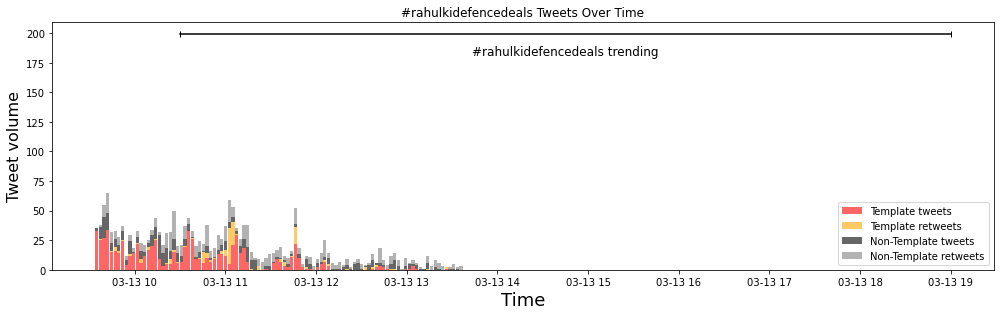

Hashtag:  rahulgandhijavabdo
Total # of collected tweets:  4028
First tweet: 
why hal and the dassault couldn’t agree on production terms during the upa govt? why the congress-ruled government closed the file? #rahulgandhijavabdo - pmoindiamodi  on  2018-10-14 09:52:09
Number of tweets before first template tweet: 0
First template tweet: 
why hal and the dassault couldn’t agree on production terms during the upa govt? why the congress-ruled government closed the file? #rahulgandhijavabdo - pmoindiamodi  on  2018-10-14 09:52:09
hashtag trended from 2018-10-14 11:00:00 to 2018-10-15 03:00:00


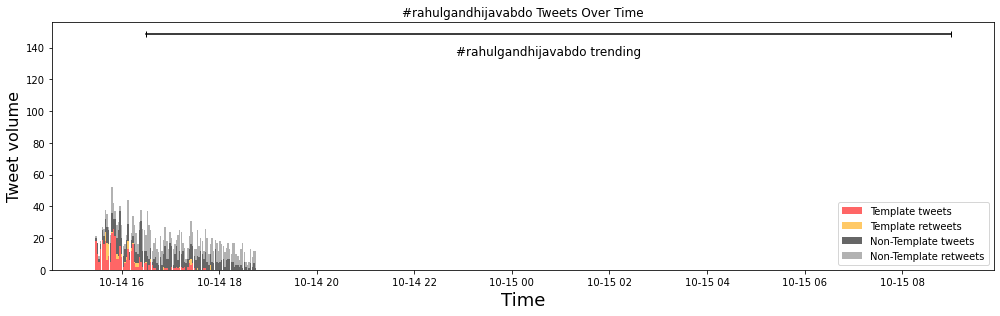

Hashtag:  ragafailonrafale
Total # of collected tweets:  5044
First tweet: 
every allegation of rahul gandhi on rafale deal has been refuted by the defence minister of india, the prime minister of india, the finance minister, the air force chief, the vice chief, the french president, former french president, ceo of dassault aviation. #ragafailonrafale - kajal_jaihind  on  2018-11-15 03:43:00
Number of tweets before first template tweet: 5
First template tweet: 
the french government , too , issued a statement and denied any involvement in the choice of indian industrial partners . it said the french companies have selected or are selecting their indian counterparts involved in the deal . #ragafailonrafale - anilpurohitbjp  on  2018-11-15 03:53:00
hashtag trended from 2018-11-15 05:00:00 to 2018-11-16 06:00:00


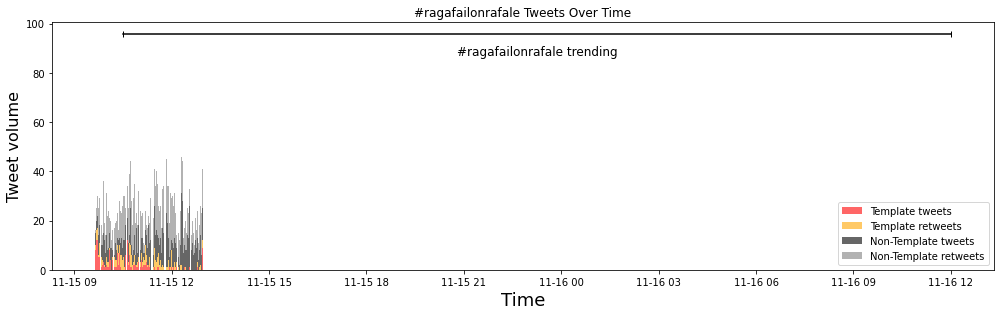

Hashtag:  bjpvijaysankalpbikerally
Total # of collected tweets:  143497
First tweet: 
आज सेक्टर-29 में जिला संख्या-4 की बैठक के दौरान सभी सदस्यों से आगामी लोकसभा चुनावों में एकजुट होकर #भाजपा की जीत के लिए संकल्पित होने को अपील की। #meraparivarbhajpaparivar #bjpkamaljyoti #भाजपा_कमल_ज्योति #bjpvijaysankalpbikerally #loksabhaelection2019 @bjp4india #namoagain https://t.co/3ic89arl7z - sanjaytandonbjp  on  2019-02-09 16:39:35
Number of tweets before first template tweet: 10500
First template tweet: 
भाजपा सरकार के अंतर्गत 1 करोड़ युवा स्टार्टअप शुरू कर चुके हैं  #bjpvijaysankalpbikerally #modioncemore - jigarpera  on  2019-03-02 04:45:15
hashtag trended from 2019-03-02 05:00:00 to 2019-03-04 03:00:00


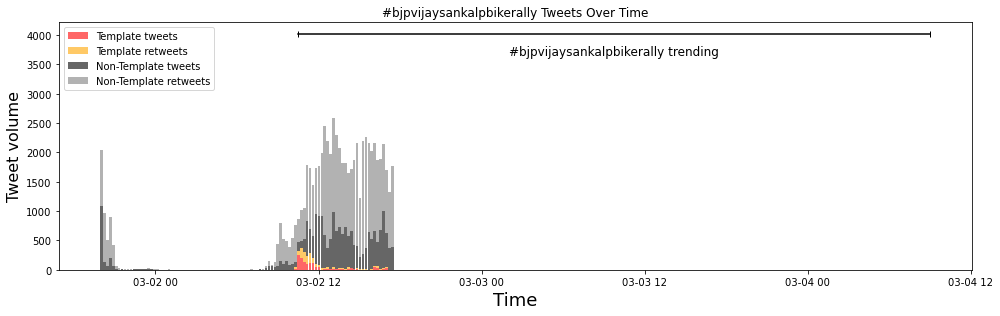

Hashtag:  successofmakeinindia
Total # of collected tweets:  6367
First tweet: 
railways despatched the 'sri lanka-13' train, manufactured domestically under the make in india initiative at chennai's integral coach factory for export to sri lanka, boosting both trade & commerce between the 2 nations. #successofmakeinindia https://www. thehindubusinessline.com/news/icf-despa tches-demu-coaches-to-sri-lanka/article25478009.ece … - reetesh777  on  2019-02-17 11:35:00
Number of tweets before first template tweet: 0
First template tweet: 
railways despatched the 'sri lanka-13' train, manufactured domestically under the make in india initiative at chennai's integral coach factory for export to sri lanka, boosting both trade & commerce between the 2 nations. #successofmakeinindia https://www. thehindubusinessline.com/news/icf-despa tches-demu-coaches-to-sri-lanka/article25478009.ece … - reetesh777  on  2019-02-17 11:35:00
hashtag trended from 2019-02-17 13:00:00 to 2019-02-18 03:00:00


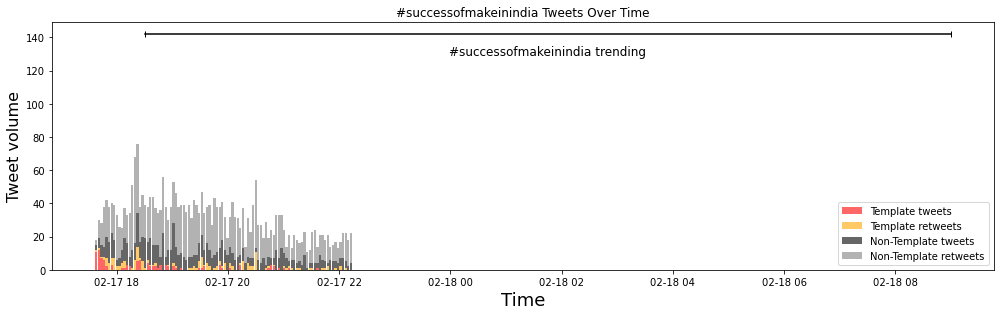

Hashtag:  pmkisan
Total # of collected tweets:  37803
First tweet: 
#pmkisan yojana to be launched. direct income support of 6000 rs per year to farmers with 2 hector land. #budget2019 - maheshbhalala  on  2019-02-01 05:57:18
Number of tweets before first template tweet: 1863
First template tweet: 
2018-19 के बाद पौष्टिक अनाज का उत्पादन एवं उत्पादकता में वृद्धि के लिये प्रमाणित बीज उत्पादन पर जोर दिया गया। #pmkisan - bjpkm4kisan  on  2019-02-24 05:31:00
hashtag trended from 2019-02-01 07:00:00 to 2019-02-25 02:00:00


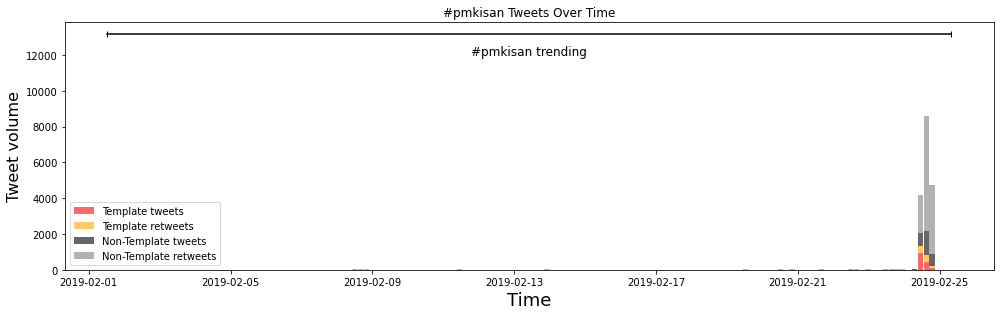

Hashtag:  congresseurofighterscandal
Total # of collected tweets:  2991
First tweet: 
the question that congress must answer is what is the real reason behind rahul gandhi opposing the rafale deal ? https://www. opindia.com/2019/01/sanjay -bhandari-christian-michel-and-eurofighter-time-rahul-gandhi-answers-why-he-is-really-against-the-rafale-deal/ … #congresseurofighterscandal - modifiedvikas  on  2019-01-08 03:15:00
Number of tweets before first template tweet: 0
First template tweet: 
the question that congress must answer is what is the real reason behind rahul gandhi opposing the rafale deal ? https://www. opindia.com/2019/01/sanjay -bhandari-christian-michel-and-eurofighter-time-rahul-gandhi-answers-why-he-is-really-against-the-rafale-deal/ … #congresseurofighterscandal - modifiedvikas  on  2019-01-08 03:15:00
hashtag trended from 2019-01-08 04:00:00 to 2019-01-09 03:00:00


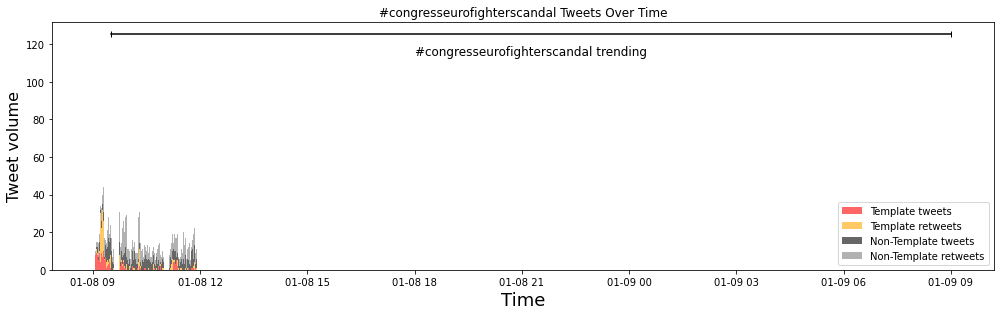

Hashtag:  modimeinhaidum
Total # of collected tweets:  68242
First tweet: 
@gupta_vijender @newsgram1 @arvindkejriwal sir who is shilpa #modimeinhaidum - kingoffreefolk  on  2016-11-15 14:09:42
Number of tweets before first template tweet: 2
First template tweet: 
the @narendramodi govt has ushered in a paradigm shift in education through skill development. under pm kaushal development yojana, around 25 lakh people have been trained across india #modimeinhaidum - ravinde39752072  on  2019-03-19 02:17:46
hashtag trended from 2019-03-19 04:00:00 to 2019-03-20 03:00:00


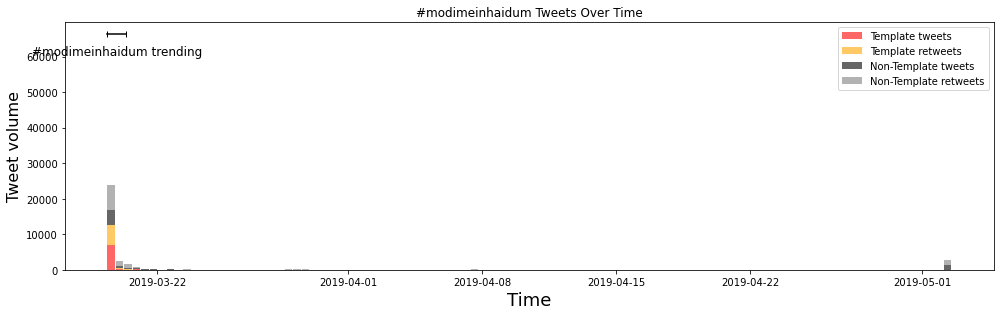

Hashtag:  takingforwardhinducause
Total # of collected tweets:  1117
First tweet: 
raga’s great grandpa refused to give money for construction of somnath temple. now rahul is going to temples to get hindu votes as he is afraid of hindus gettin united under modi’s leadership. at the same time kapil sibal tried to get ram mandir delayed. #takingforwardhinducause - thebigmochad  on  2019-01-10 05:17:34
Number of tweets before first template tweet: 0
First template tweet: 
raga’s great grandpa refused to give money for construction of somnath temple. now rahul is going to temples to get hindu votes as he is afraid of hindus gettin united under modi’s leadership. at the same time kapil sibal tried to get ram mandir delayed. #takingforwardhinducause - thebigmochad  on  2019-01-10 05:17:34
hashtag trended from 2019-01-10 07:00:00 to 2019-01-10 11:00:00


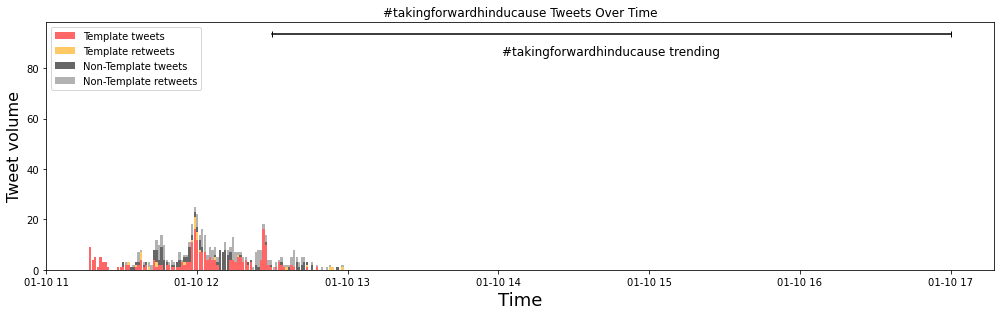

Hashtag:  myfirstvoteformodi
Total # of collected tweets:  47242
First tweet: 
i support our pm shri narendra modi's vision for india and look forward to him leading the country again in 2019. i pledge #myfirstvoteformodi, you can also support him by taking this pledge here: https://t.co/cyzk9rxrsz - subhamd09449923  on  2018-10-12 14:03:54
Number of tweets before first template tweet: 5061
First template tweet: 
as first time voters, our choice is very clear. the mahagathbandhan comprises of expert thieves in the entirety of the country. let’s not give the nation into the wrong hands. pledge #myfirstvoteformodi at https://t.co/lnvhz7ncie - sunnygoyal122  on  2019-03-15 09:37:20
hashtag trended from 2019-03-15 11:00:00 to 2019-04-10 04:00:00


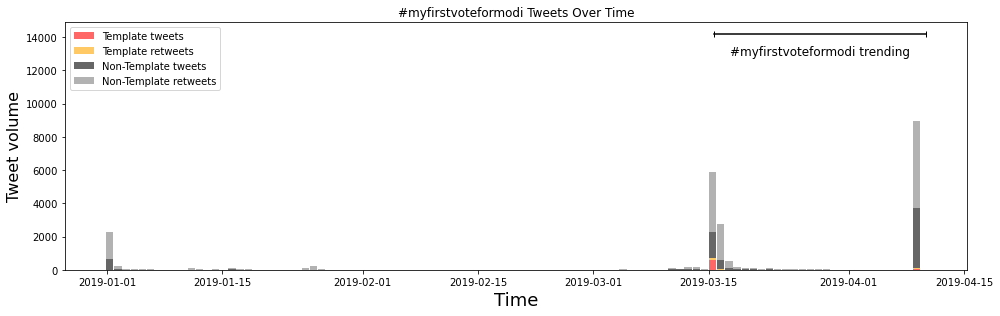

Hashtag:  shahforgandhinagar
Total # of collected tweets:  4499
First tweet: 
गांधीनगर लोकसभा के मतदाताओं को श्री अमितभाई शाह की विनम्र अपील.. #shahforgandhinagar https://t.co/kfphskcvtz - rishhshuklabjp  on  2019-04-01 05:20:01
Number of tweets before first template tweet: 51
First template tweet: 
શ્રી અમિતભાઈ શાહના નેતૃત્વમાં આગામી સમયમાં પણ ભાજપ વિકાસના માર્ગે ઝડપથી આગળ વધશે #shahforgandhinagar @ipankajshukla @kalpeshrathavi - desaidipal  on  2019-04-14 13:11:39
hashtag trended from 2019-04-14 14:00:00 to 2019-04-14 16:00:00


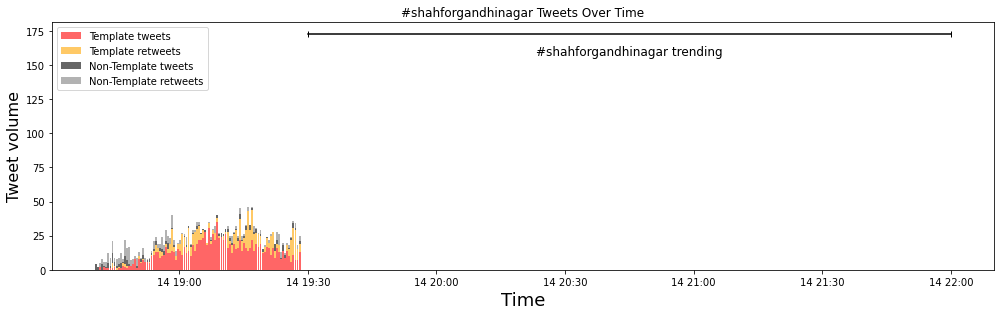

Hashtag:  bjpkamaljyoti
Total # of collected tweets:  67513
First tweet: 
26-02-19 को @bjp4haryana के कार्यकर्ता प्रदेश में अपने कार्यकर्ताओं, समर्थकों एवं केन्द्र तथा राज्य के भाजपा सरकार की योजनाओं से लाभान्वित हुए परिवारों के घर पर #कमल_ज्योति जलाकर 2019 में श्री @narendramodi जी को पुन: प्रधानमन्त्री बनाने के लिए जन सहयोग माँगेंगे|#bjpkamaljyoti https://t.co/q7fjqm2ch7 - sureshbhattbjp  on  2019-02-08 17:21:16
Number of tweets before first template tweet: 18455
First template tweet: 
गाज़ीपुर में 57,198 लोगों को मिल रही वृद्धावस्‍था पेंशन #bjpkamaljyoti - rishhshuklabjp  on  2019-02-26 12:20:19
hashtag trended from 2019-02-25 11:00:00 to 2019-02-27 03:00:00


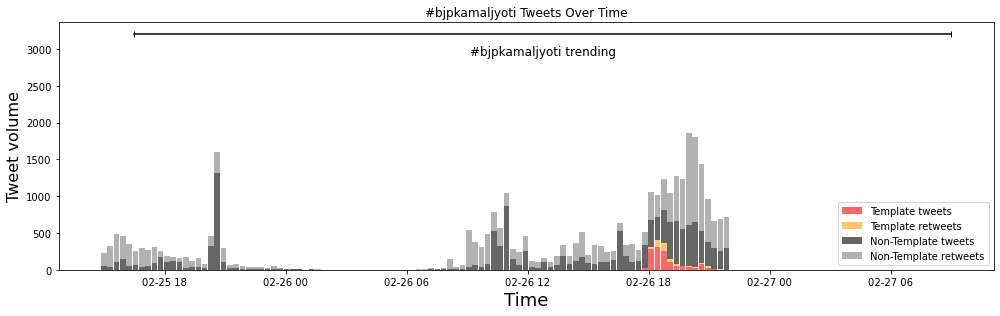

Hashtag:  maikamalkhilaneayahu
Total # of collected tweets:  24883
First tweet: 
https://t.co/1r1efk3zit #maikamalkhilaneayahu - rd227  on  2019-03-29 17:59:33
Number of tweets before first template tweet: 211
First template tweet: 
bjp has grown many fold under the leadership of shri @amitshah #maikamalkhilaneayahu - bartwalvikram  on  2019-03-30 03:41:33
hashtag trended from 2019-03-30 04:00:00 to 2019-03-31 05:00:00


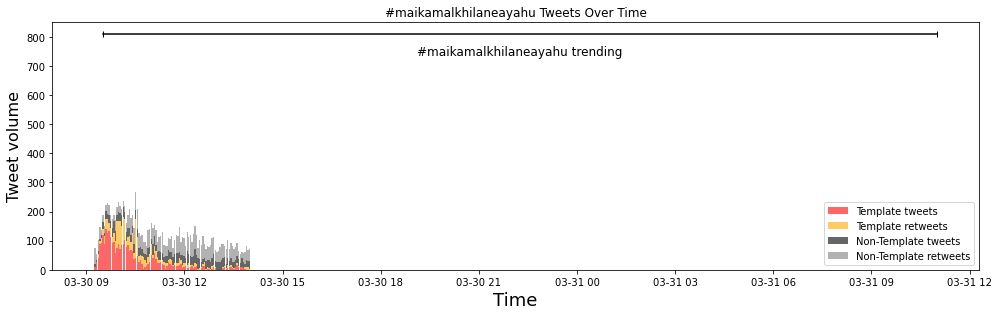

Hashtag:  उत्तरप्रदेश_विजय_संकल्प
Total # of collected tweets:  7314
First tweet: 
आज शाम 4 बजे, उत्तर प्रदेश के आगरा में भारतीय जनता पार्टी की ‘विजय संकल्प सभा’ को संबोधित करूँगा। #उत्तरप्रदेश_विजय_संकल्प https://t.co/ydjbfrcf5d - amitshah  on  2019-03-24 03:57:49
Number of tweets before first template tweet: 681
First template tweet: 
उत्तर प्रदेश में सामान्य छात्रों को भाजपा सरकार का तोहफा , 9वीं और 10वीं के छात्रों को मिलेगा सालाना 3000 वजीफा , 3 लाख से ज्यादा छात्रों को मिलेगा इसका लाभ उत्तर प्रदेश में 23 महीने के कार्यकाल में #उत्तरप्रदेश_विजय_संकल्प - sanjay_mishra91  on  2019-03-24 09:41:00
hashtag trended from 2019-03-24 12:00:00 to 2019-03-24 14:00:00


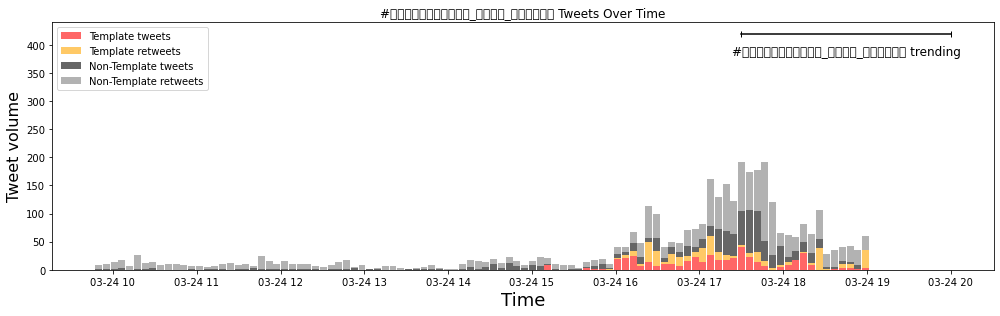

Hashtag:  removetraitorsfromdu
Total # of collected tweets:  2632
First tweet: 
#removetraitorsfromdu https://t.co/7o20ycfeyh - devendrabarala  on  2019-02-24 09:45:51
Number of tweets before first template tweet: 8
First template tweet: 
.no university or colleges are free from leftist ideology which hates india, it existence and our forces. they fail to realise that foe they cry of after every issue is result of sacrifices made by our security forces. #removetraitorsfromdu - kanha__  on  2019-02-24 09:56:28
hashtag trended from 2019-02-24 11:00:00 to 2019-02-24 15:00:00


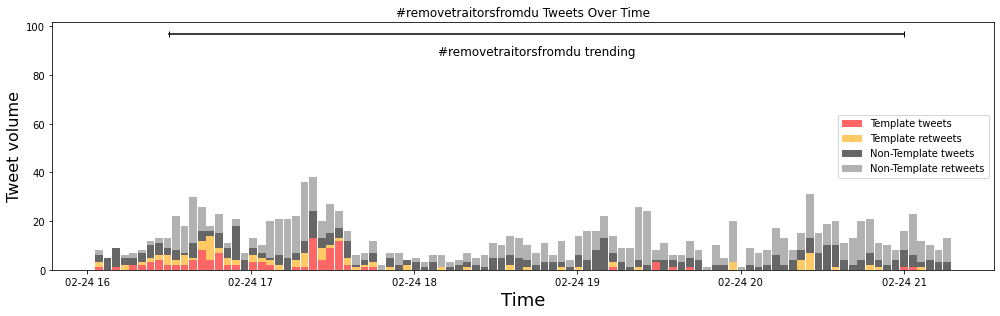

Hashtag:  modiagain2019
Total # of collected tweets:  31971
First tweet: 
#modiagain2019 - rajeev1204  on  2015-12-08 10:26:00
Number of tweets before first template tweet: 26923
First template tweet: 
on rails, roads, highways, airways, waterways, connectivity or other infra, modi govt is working at the double the pace than the earlier govt. this is driven by millions of skilled and motivated youth! @pmuralidharrao @narendramodi #modiagain2019 - koustav_saharia  on  2019-04-10 02:59:19
hashtag trended from 2019-03-12 00:00:00 to 2019-03-12 03:00:00


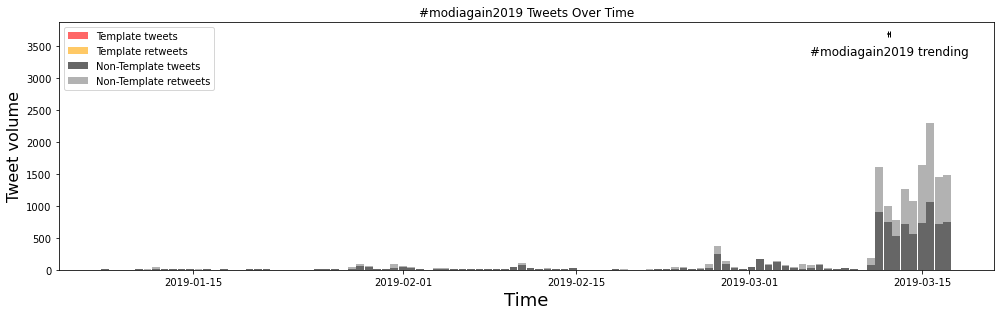

Hashtag:  devendra4maharashtra
Total # of collected tweets:  4191
First tweet: 
@dev_fadnavis a cm who works at 3am to solve state farmer issues &amp; still shows the energy to work harder with a smile. #devendra4maharashtra - mohitchaturvedi  on  2017-06-03 10:33:16
Number of tweets before first template tweet: 17
First template tweet: 
देवेंद्र सरकारने खेती के लिये होनेवाला खर्चा दो गुना किया . २००९-१४ इस वर्षं में २७४० करोड खर्चा हुआ था , २०१४-१८ इस काल में ५५५० करोड खर्चा किया . किसानों का मतो के लिए वापर नही किया ! #devendra4maharashtra - iam_manojgoenka  on  2018-10-31 11:21:00
hashtag trended from 2018-10-31 12:00:00 to 2018-10-31 17:00:00


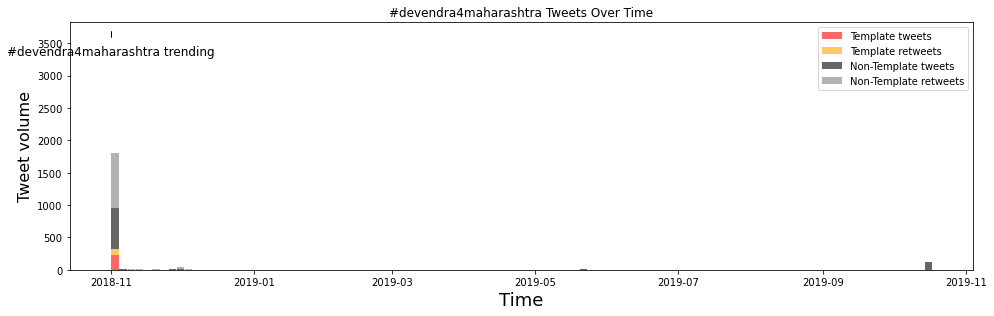

Hashtag:  andhrawithmodi
Total # of collected tweets:  7148
First tweet: 
pm shri @narendramodi will interact with booth level karyakartas of anantapur, kadapa, kurnool, narasaraopet and tirupati on 6 th jan 2019 at 12:30pm . watch at https://t.co/ljkcj0r9eb #andhrawithmodi https://t.co/g1gsjfvlb8 - bjp4andhra  on  2019-01-05 13:29:59
Number of tweets before first template tweet: 35
First template tweet: 
ప్రపంచంలోనే అతిపెద్ద ఆరోగ్య భీమా పథకం  ఆయుష్మాన్ భారత్ యోజన " ద్వారా బడుగు , బలహీన కుటుంబాలకు 5 లక్షల వరకు ఆరోగ్య భీమా కల్పించిన ప్రధాని నరేంద్ర మోదీ ప్రభుత్వం . #andhrawithmodi" - soerabaimahadev  on  2019-01-06 05:12:00
hashtag trended from 2019-01-06 08:00:00 to 2019-01-07 03:00:00


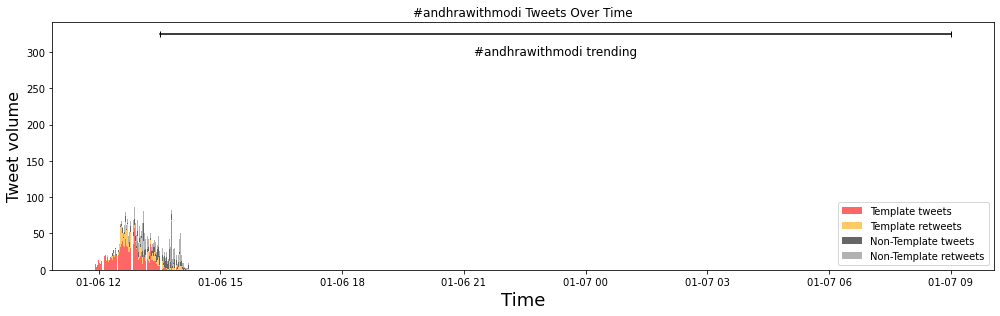

Hashtag:  jaihobc
Total # of collected tweets:  12018
First tweet: 
rt @tdp24x7: ఛాన్స్‌ ఇస్తా ఎదగండి: బాబు https://t.co/cmzcpddrah #chandrababunaidu #jaihobc #tdp #rajamahendravaram #andhrapradesh https://t.co/tqvxokcf20 - cjvenkatasubba2  on  2018-11-16 11:18:26
Number of tweets before first template tweet: 153
First template tweet: 
2014 నుంచి 2018 వరకు 22205 కోట్లు బీసీ సంక్షేమానికి ఖర్చు పెట్టిన ఏకైక ప్రభుత్వం తెలుగుదేశం ప్రభుత్వం. #jaihobc https://t.co/7xdudfgdxm - cbn_army  on  2019-01-26 14:22:35
hashtag trended from 2019-01-27 06:00:00 to 2019-01-27 06:00:00


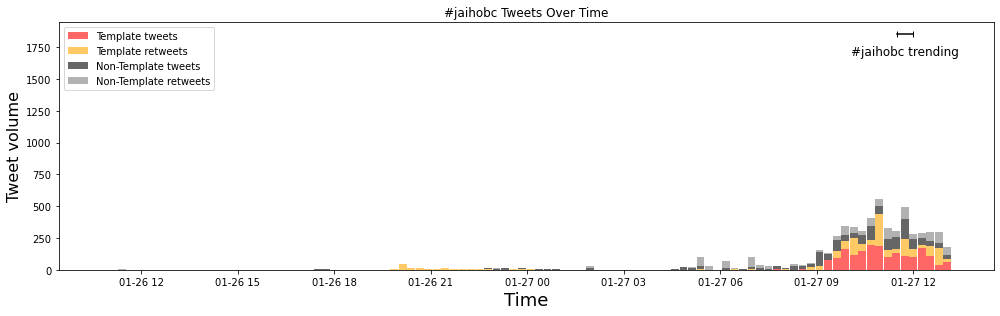

Hashtag:  armedforcesflagday
Total # of collected tweets:  79908
First tweet: 
will we ever see #armedforcesflagday trending or is it just gonna be the idiots of the day? - adidesai  on  2011-12-07 06:34:29
Number of tweets before first template tweet: 39968
First template tweet: 
armed forces flag day #armedforcesflagday - rish_209  on  2017-12-07 02:00:25
hashtag trended from 2018-12-01 10:00:00 to 2018-12-08 23:00:00


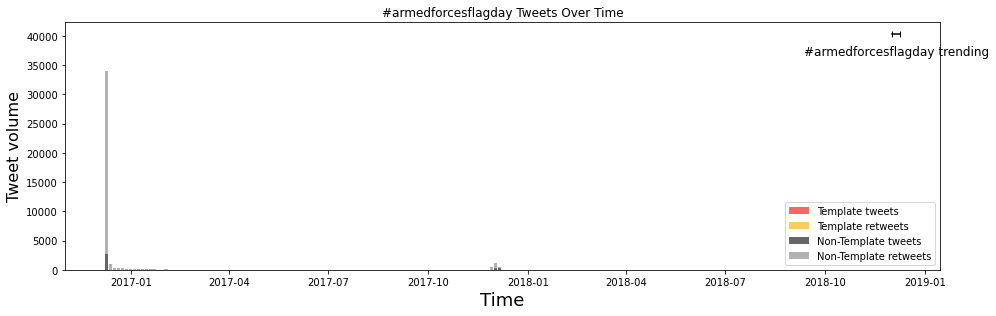

Hashtag:  nris4modi
Total # of collected tweets:  4318
First tweet: 
#nris4modi l spreading modi mania all over the world with billions of nris supportl gnntv: https://t.co/btahy6rij3 via @youtube - gnnwtv  on  2019-01-29 17:22:14
Number of tweets before first template tweet: 388
First template tweet: 
every village electrified under deen dayal upadhyaya gram jyothi yojana #nris4modi - ravivyom  on  2019-03-27 01:30:00
hashtag never trended
failed to plot trending data


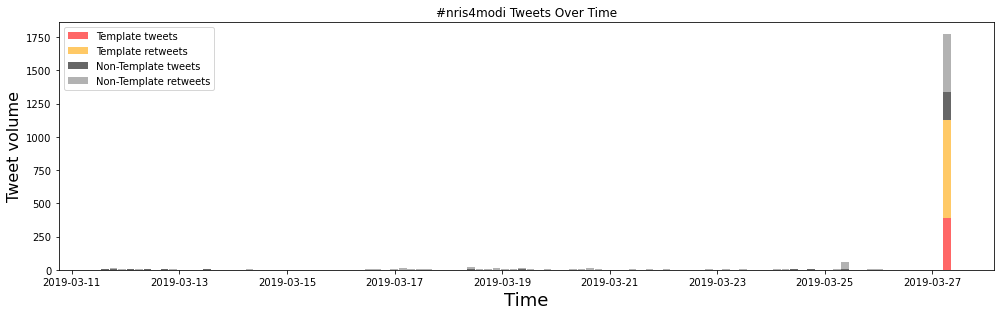

Hashtag:  modifiedtextiles
Total # of collected tweets:  1166
First tweet: 
banaras garmenting unit procured handloom fabrics of rs. 12.79 cr, manufactured 1.88 lakh garment pieces & sold garments worth rs. 15.51 cr. #modifiedtextiles - ani30oct  on  2019-01-22 09:26:00
Number of tweets before first template tweet: 0
First template tweet: 
banaras garmenting unit procured handloom fabrics of rs. 12.79 cr, manufactured 1.88 lakh garment pieces & sold garments worth rs. 15.51 cr. #modifiedtextiles - ani30oct  on  2019-01-22 09:26:00
hashtag trended from 2019-01-22 10:00:00 to 2019-01-22 13:00:00


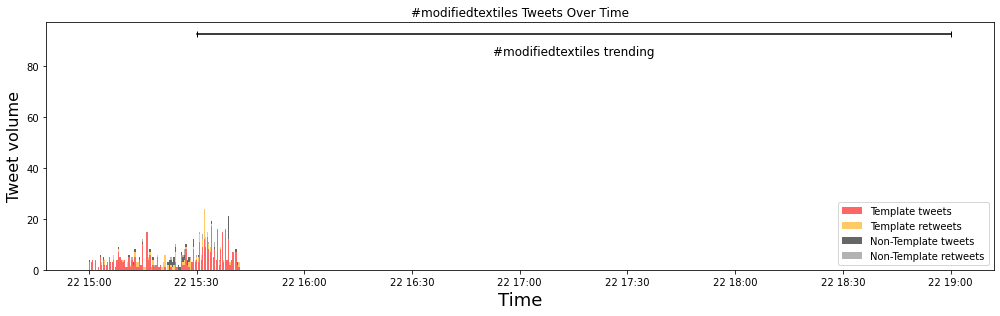

Hashtag:  meraparivarbhajapaparivar
Total # of collected tweets:  309183
First tweet: 
भाजपा केंद्रीय कार्यालय पर श्री अविनाश राय खन्ना जी एवं श्री केदार जोशी जी के साथ मेरा परिवार भाजपा परिवार की बैठक। #meraparivarbhajapaparivar #namoagain2019 https://t.co/k2ysom6d0z - dushyanttgautam  on  2019-02-01 06:48:03
Number of tweets before first template tweet: 239
First template tweet: 
मेरा परिवार, भाजपा परिवार #meraparivarbhajapaparivar @kavanmehta @irajulpandya @bjp_arjav @ihirenmehta… https://t.co/5ykxkhallk - oza_nisarg  on  2019-02-11 07:39:27
hashtag trended from 2019-02-11 09:00:00 to 2019-02-14 03:00:00


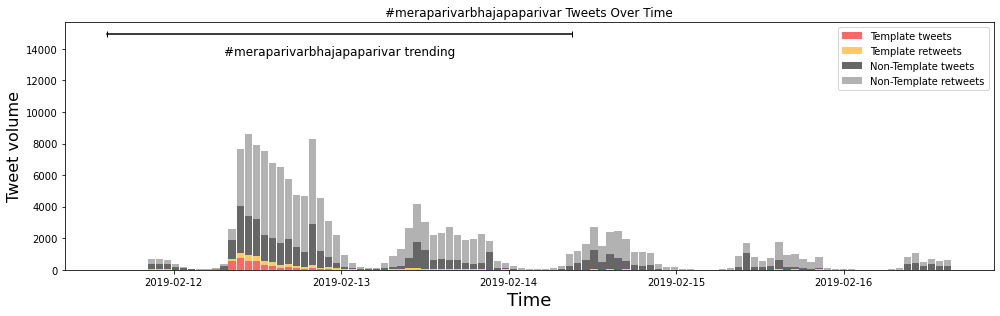

Hashtag:  modifiedjobs
Total # of collected tweets:  8023
First tweet: 
the new job for an indian number 5-6 is not just as a finisher but also now modified to anchor the innings as we have regularly seen quick wickets tumbling at the top #modifiedjobs - criccrazyniks  on  2019-03-09 09:30:11
Number of tweets before first template tweet: 4
First template tweet: 
the cii survey indicates that micro enterprises were the largest job creators in the past four years and will continue to be so in the next three years. this holds true for both exporters and non-exporters. #modifiedjobs https://t.co/xxcmve5gaj - loveavasthi  on  2019-03-09 09:37:46
hashtag trended from 2019-03-09 10:00:00 to 2019-03-10 04:00:00


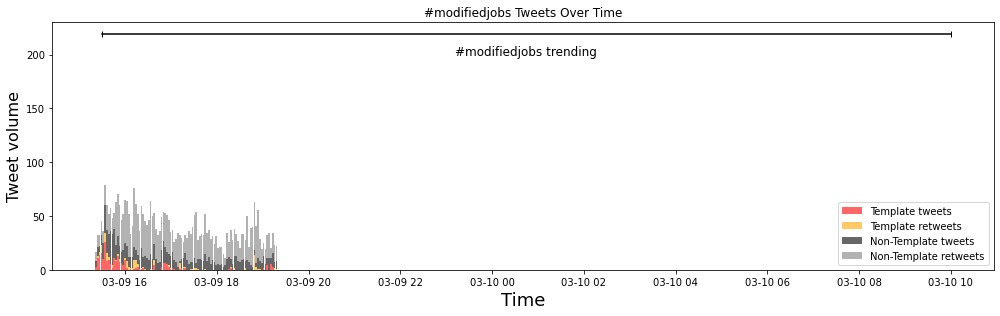

Hashtag:  gappupappu
Total # of collected tweets:  8450
First tweet: 
hahaha it suits 2 the liar @officeofrg he must b called #gappupappu now on @tajinderbagga @drgpradhan @sambitswaraj https:// twitter.com/iamsrivatsanv/ status/600851257780150272 … - rupeshpmp  on  2015-05-20 03:29:00
Number of tweets before first template tweet: 520
First template tweet: 
dassault has claimed that it can share the document for anybody to see that nowhere does it mention that reliance was mandatory for the deal. it only says that indian offset was mandatory for the deal. #pappumutra @rahulgandhi #gappupappu @nsitharaman follow 👉 :- @anu_jaihind - vcaoo  on  2018-10-11 10:43:11
hashtag trended from 2018-10-11 18:00:00 to 2018-10-12 03:00:00


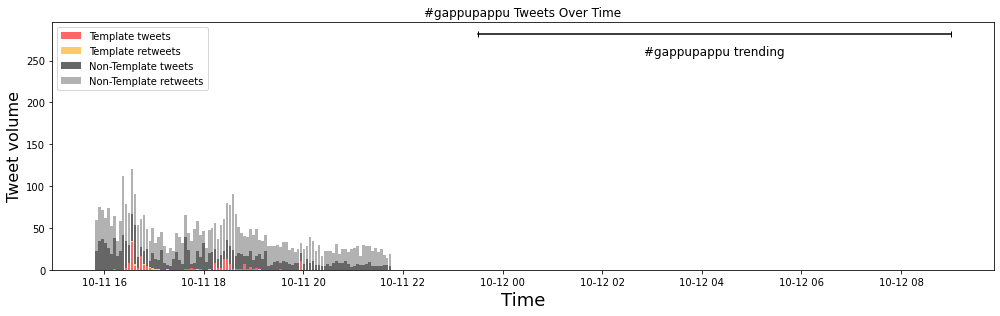

In [223]:
for ht, camp in campaigns.items():
    summarize_campaign(ht, camp)
    plot_campaign_activity(ht, camp, quantiles=(.01,.5))
    

# Saving hashtag trend data

In [106]:
def get_trend_behavior(ht):
    '''Takes a hashtag and compiles all trend date about it
    Currently just returns the beginning and end of the trending status, but can do more potentially
    '''
    res = [] 
    for entry in os.scandir(TRENDS_DIR):
        # crude filtering for date csv names 
        if entry.path[-7] == '-':
            df = pd.read_csv(entry, header=None,
                            names=['hashtag', 'place', 
                                   'level', 'day', 
                                   'time', 'volume', 'nan'])
            df['hashtag'] = df.hashtag.apply(lambda x: x.replace('#','').lower())
            try:
                df['datetime'] = pd.to_datetime(df.day + df.time, format='%Y-%m-%d%H:%M')
            except:
                print('error with hashtag', ht)
                return df
            temp = df.query(f'hashtag == "{ht}"')
            if len(temp) > 0:
                res.append(temp)
    if len(res) > 0:
        return pd.concat(res)
    else:
        print(ht, 'did not appear to trend')
        return pd.DataFrame()

In [107]:
for ht in tqdm.tqdm(campaigns.keys()):
    filename = os.path.join(TRENDS_DIR, ht+'.csv')
    if not os.path.exists(filename):
        get_trend_behavior(ht).to_csv(filename)

 31%|███       | 23/75 [00:07<00:18,  2.88it/s]

bogibeelbridge did not appear to trend


 35%|███▍      | 26/75 [00:31<04:23,  5.37s/it]

hooghly_chalo did not appear to trend


 37%|███▋      | 28/75 [00:48<05:21,  6.84s/it]

goodgovernanceday did not appear to trend


 49%|████▉     | 37/75 [02:03<05:22,  8.49s/it]

congressframedamitshah did not appear to trend


 57%|█████▋    | 43/75 [02:55<04:36,  8.64s/it]

congressagainstnationalsecurity did not appear to trend


 95%|█████████▍| 71/75 [06:57<00:34,  8.70s/it]

nris4modi did not appear to trend


100%|██████████| 75/75 [07:32<00:00,  6.03s/it]
